In [74]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set seaborn configuration as default for matplotlib plots


# Set Color Palette
sns.set_palette("rocket_r")

# Set Matplotlib display settings
%matplotlib inline
%config InlineBackend.figure_format='retina'
mpl.rcParams['figure.figsize'] = (16,8)


# load in the data

crimes = '/Users/oliverbohler/Desktop/Springboard/capstone project 2 violent crime in los angeles/theft_and_burglary.csv'
crime = pd.read_csv(crimes)

In [75]:
crime.head()

DR_NO   Date Rptd    Date occ TIME OCC  year  month  day   Weekday  \
0  100100508  2010-01-08  2010-01-07    20:05  2010      1    7  Thursday   
1  100100522  2010-01-15  2010-01-14    20:00  2010      1   14  Thursday   
2  100100531  2010-01-16  2010-01-15    20:30  2010      1   15    Friday   
3  100100553  2010-01-23  2010-01-23    11:00  2010      1   23  Saturday   
4  100100561  2010-01-26  2010-01-26    18:20  2010      1   26   Tuesday   

   Zone Area Name  Crime Code      Crime Description         Mocodes  \
0     6   Central         330  BURGLARY FROM VEHICLE            0344   
1     6   Central         210                ROBBERY            0344   
2     6   Central         210                ROBBERY  0344 0416 1218   
3     6   Central         210                ROBBERY       0344 0416   
4     6   Central         210                ROBBERY       0346 0400   

   Vict Age Vict Sex Vict Descent  Premis Code Premis Desc  Weapon Used Cd  \
0        46        M            H        101.0      STREET             NaN   
1        40        M            H        101.0      STREET           400.0   
2        47        M            A        102.0    SIDEWALK           400.0   
3        50        M            W        101.0      STREET           400.0   
4        37        M            H        102.0    SIDEWALK           400.0   

                                      Weapon Desc Status   Status Desc  \
0                                             NaN     IC   Invest Cont   
1  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     AO   Adult Other   
2  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     IC   Invest Cont   
3  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     IC   Invest Cont   
4  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     AA  Adult Arrest   

                                 LOCATION                     Cross Street  \
0         PICO                         BL  GRAND                        AV   
1         ALAMEDA                      ST  7TH                          ST   
2                                     1ST                      LOS ANGELES   
3  600    SAN JULIAN                   ST                              NaN   
4  800 N  ALAMEDA                      ST                              NaN   

       LAT       LON  
0  34.0389 -118.2643  
1  34.0350 -118.2386  
2  34.0515 -118.2424  
3  34.0428 -118.2461  
4  34.0563 -118.2374

In [76]:
#Data Frames for analysis
crime_count = crime.groupby(['year', 'Zone']).size().reset_index(name='count')

crime_count_pivot = crime_count.pivot(index='year', columns ='Zone', values='count').fillna(0)
crime['TIME OCC'] = pd.to_datetime(crime['TIME OCC'])

code_counts = crime.groupby(['year','Zone','Crime Code', 'Crime Description']).size().reset_index(name='Count')

arrest_counts = crime.groupby(['Zone', 'year', 'Crime Code', 'Status', 'Status Desc']).size().reset_index(name='Count')

# Create a dictionary mapping crime codes to their descriptions
crime_code_desc = crime[['Crime Code', 'Crime Description']].drop_duplicates().set_index('Crime Code')['Crime Description'].to_dict()
# Reset index to get a DataFrame suitable for plotting


/var/folders/0z/41_yxdy57v5gqbv0vhg6ky780000gn/T/ipykernel_96345/3214540626.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime['TIME OCC'] = pd.to_datetime(crime['TIME OCC'])


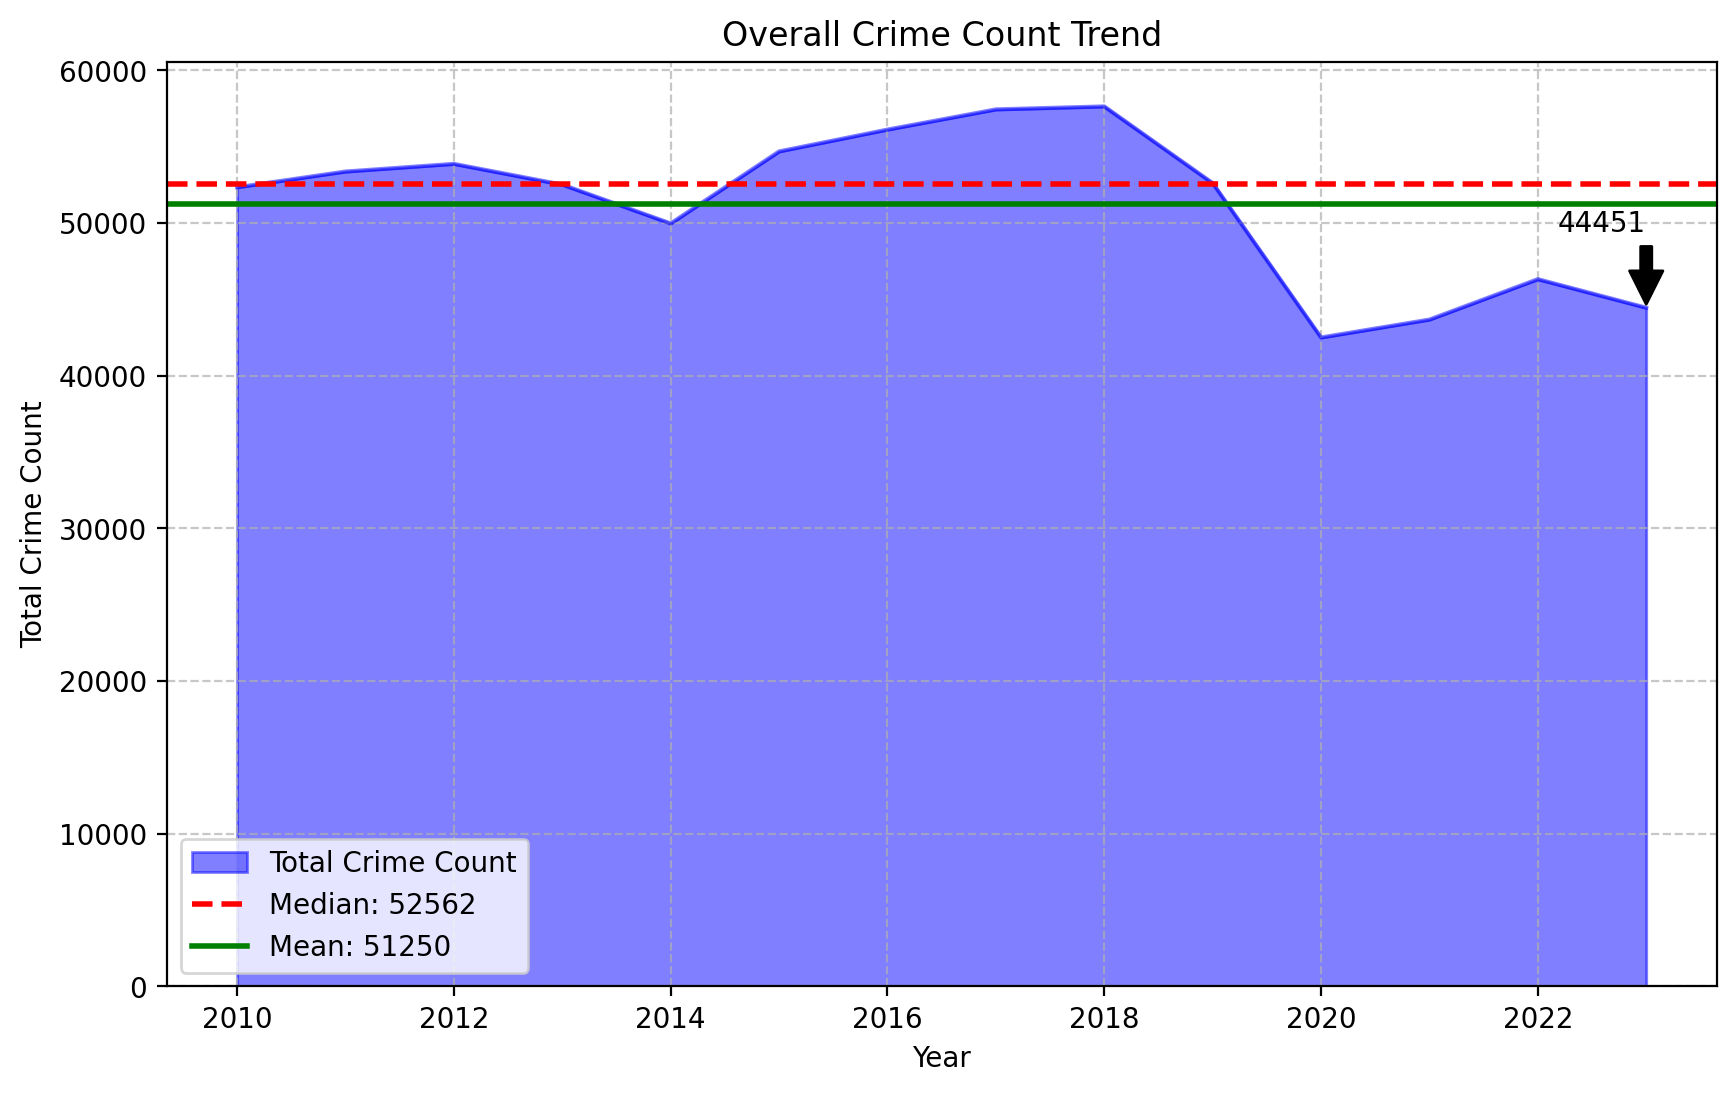

In [77]:
#1 Crime rates over the year in Los Angeles


def endpoint_annotation(ax, overall_trend, offset=5000):
    """
    Adds an arrow annotation to highlight the final crime count on the plot.
    """
    final_year = overall_trend.index[-1]
    final_count = overall_trend.iloc[-1]
    
    ax.annotate(
        f'{final_count:.0f}',
        xy=(final_year, final_count),
        xytext=(final_year, final_count + offset), 
        arrowprops=dict(facecolor='black', shrink=0.05),
        horizontalalignment='right'
    )

overall_trend = crime_count.groupby('year')['count'].sum()
median = overall_trend.median()
mean = overall_trend.mean()

fig, ax = plt.subplots(figsize=(10,6))

#overall trend of crimes
overall_trend.plot(kind='area', alpha =0.5, color='b', label='Total Crime Count', ax=ax)
#median line
ax.axhline(y=median, color = 'r', linestyle = '--', linewidth = 2, label=f'Median: {median:.0f}')
#mean line 
ax.axhline(y=mean, color='g', linestyle='-', linewidth=2, label=f'Mean: {mean:.0f}')
# Add gridlines
ax.grid(True, linestyle='--', alpha=0.7)

ax.legend()

endpoint_annotation(ax, overall_trend, offset=5000)
ax.set_title('Overall Crime Count Trend')
ax.set_xlabel('Year')
ax.set_ylabel('Total Crime Count')
plt.show()

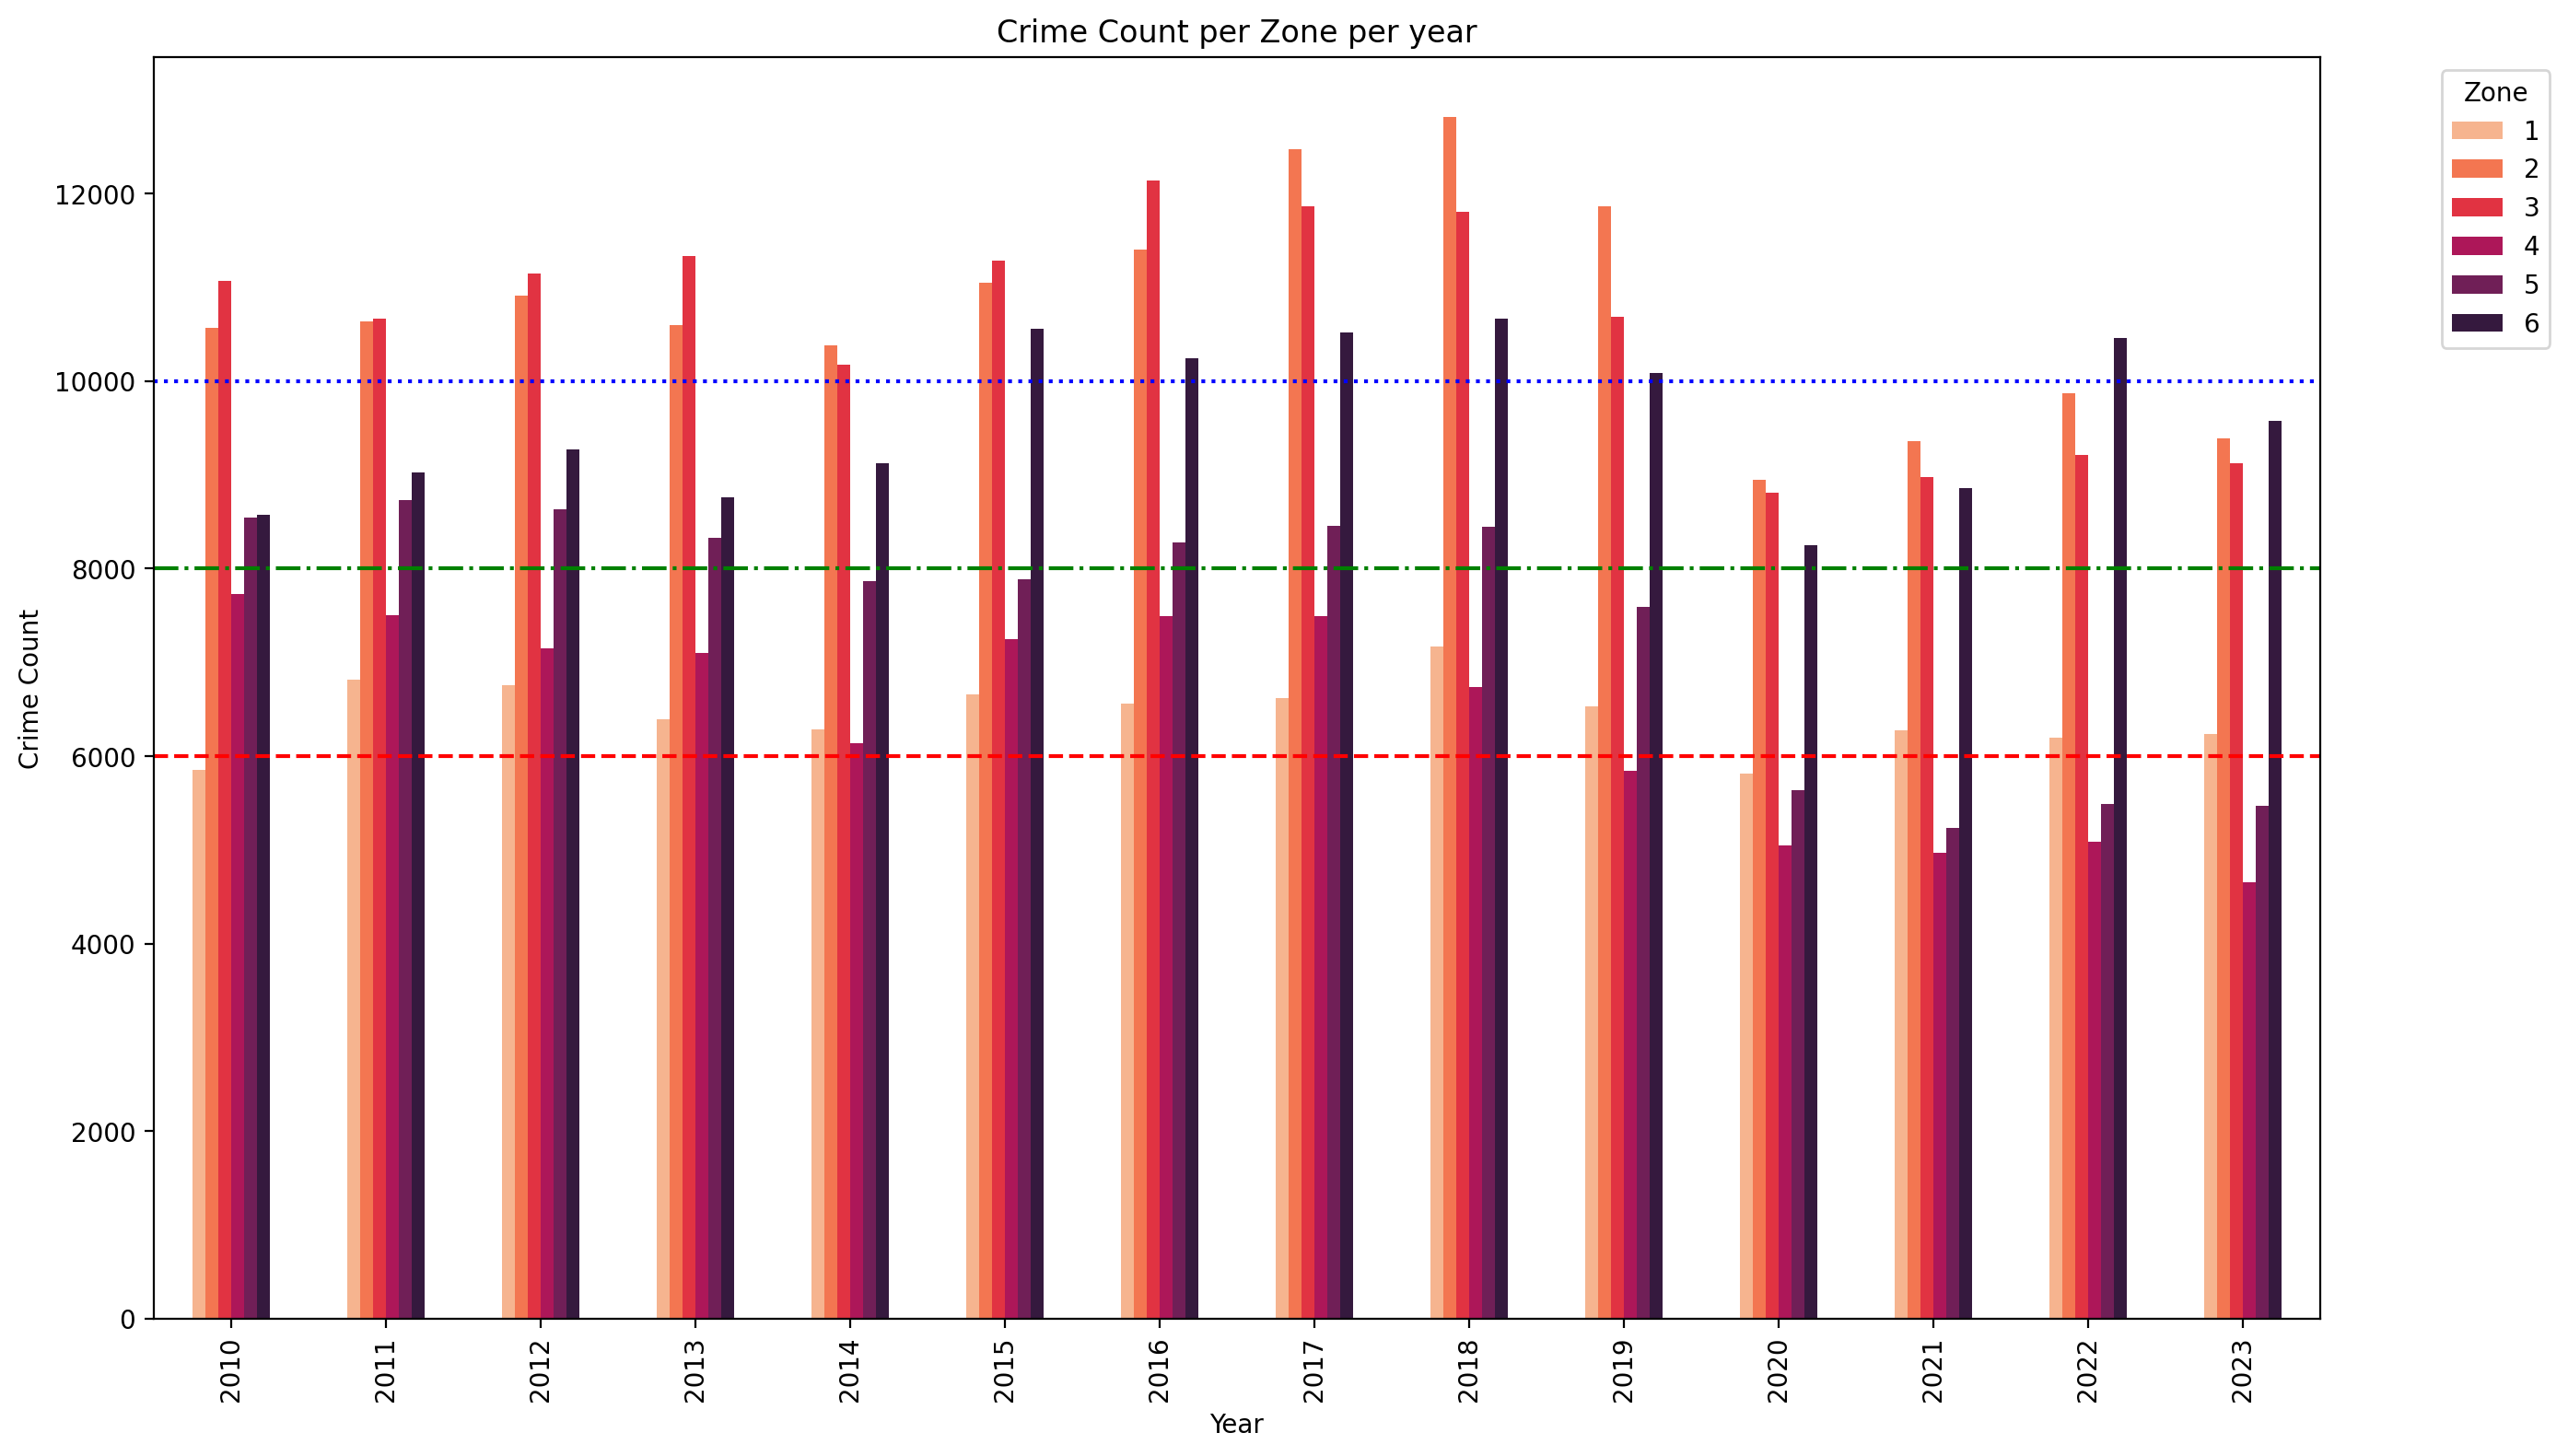

In [78]:
#1.1 Crime Counts per Zone

# While our previous step has shown that rates are back down to a level lower than in 2010, does this mean 
# Los Angeles is going to continue this trend or are there upticks within different zones. 
# Here I am trying to get a first look at the general crime occurences in each zone.

ax = crime_count_pivot.plot(kind='bar', figsize=(14,8))
plt.title('Crime Count per Zone per year')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.legend(title='Zone', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add horizontal marker lines
plt.axhline(y=6000, color='r', linestyle='--', label='Marker at 6000')
plt.axhline(y=8000, color='g', linestyle='-.', label='Marker at 8000')
plt.axhline(y=10000, color='b', linestyle=':', label='Marker at 10000')
plt.tight_layout()
plt.show()

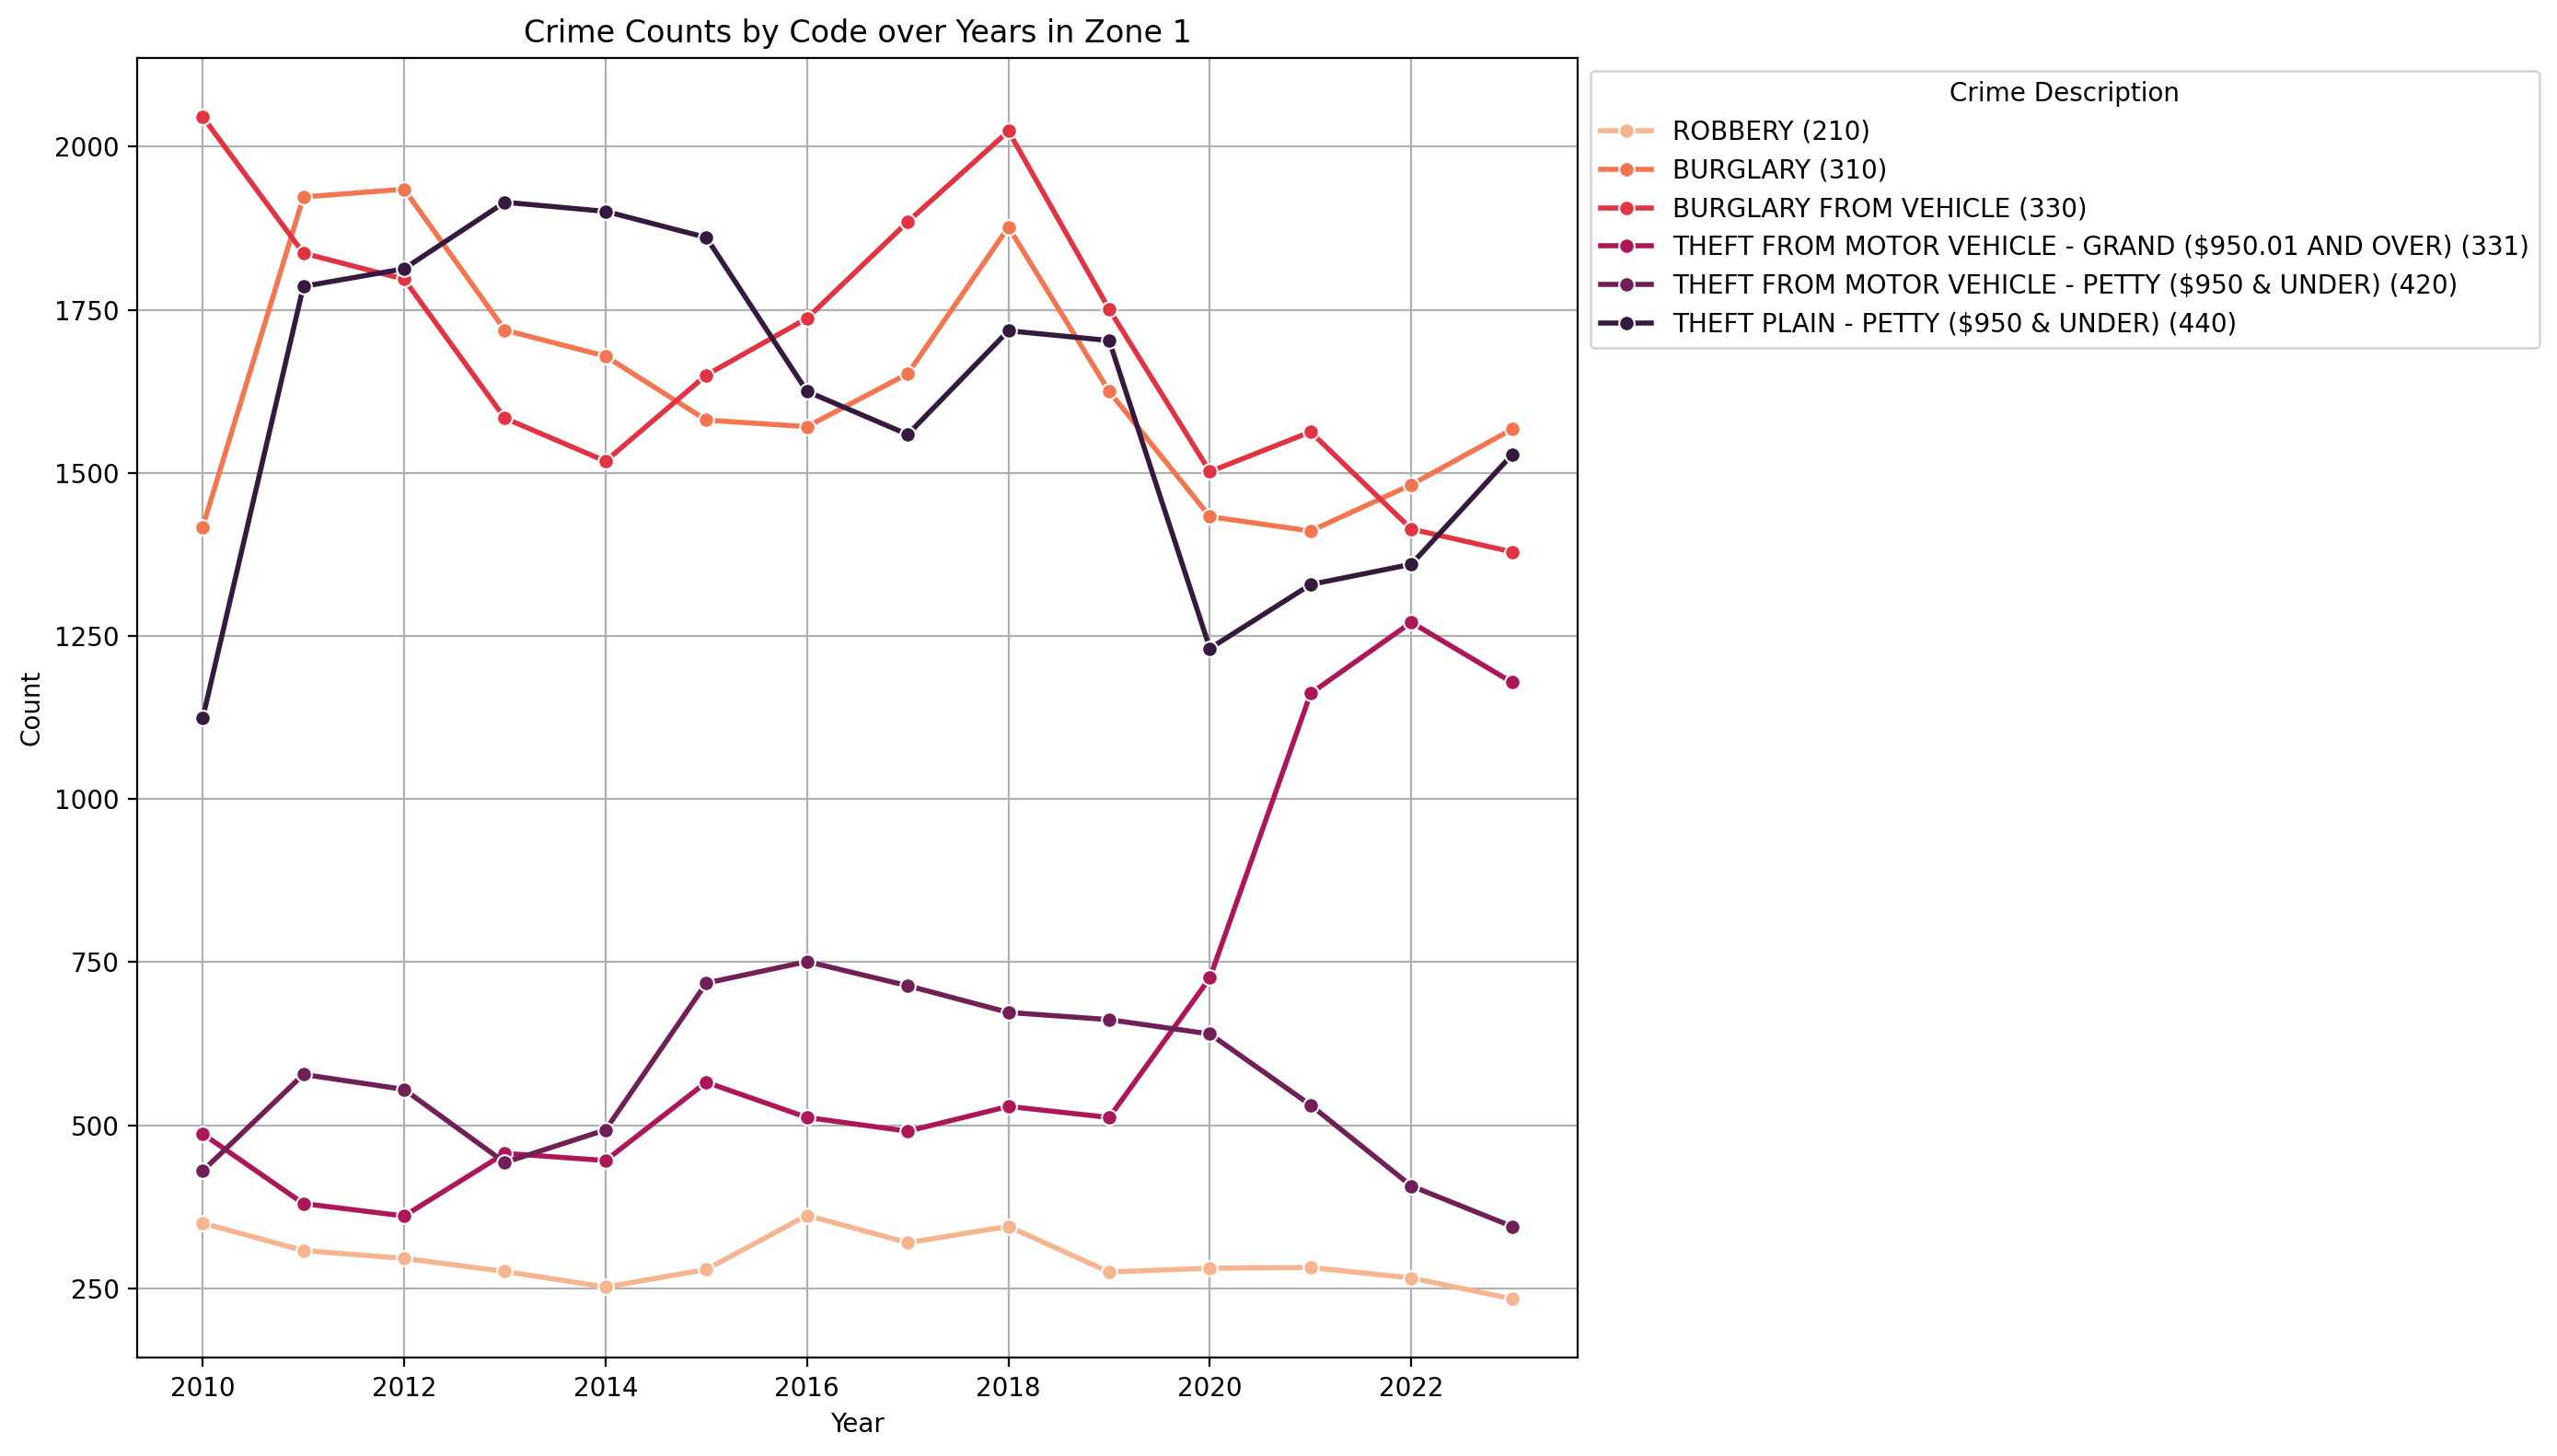

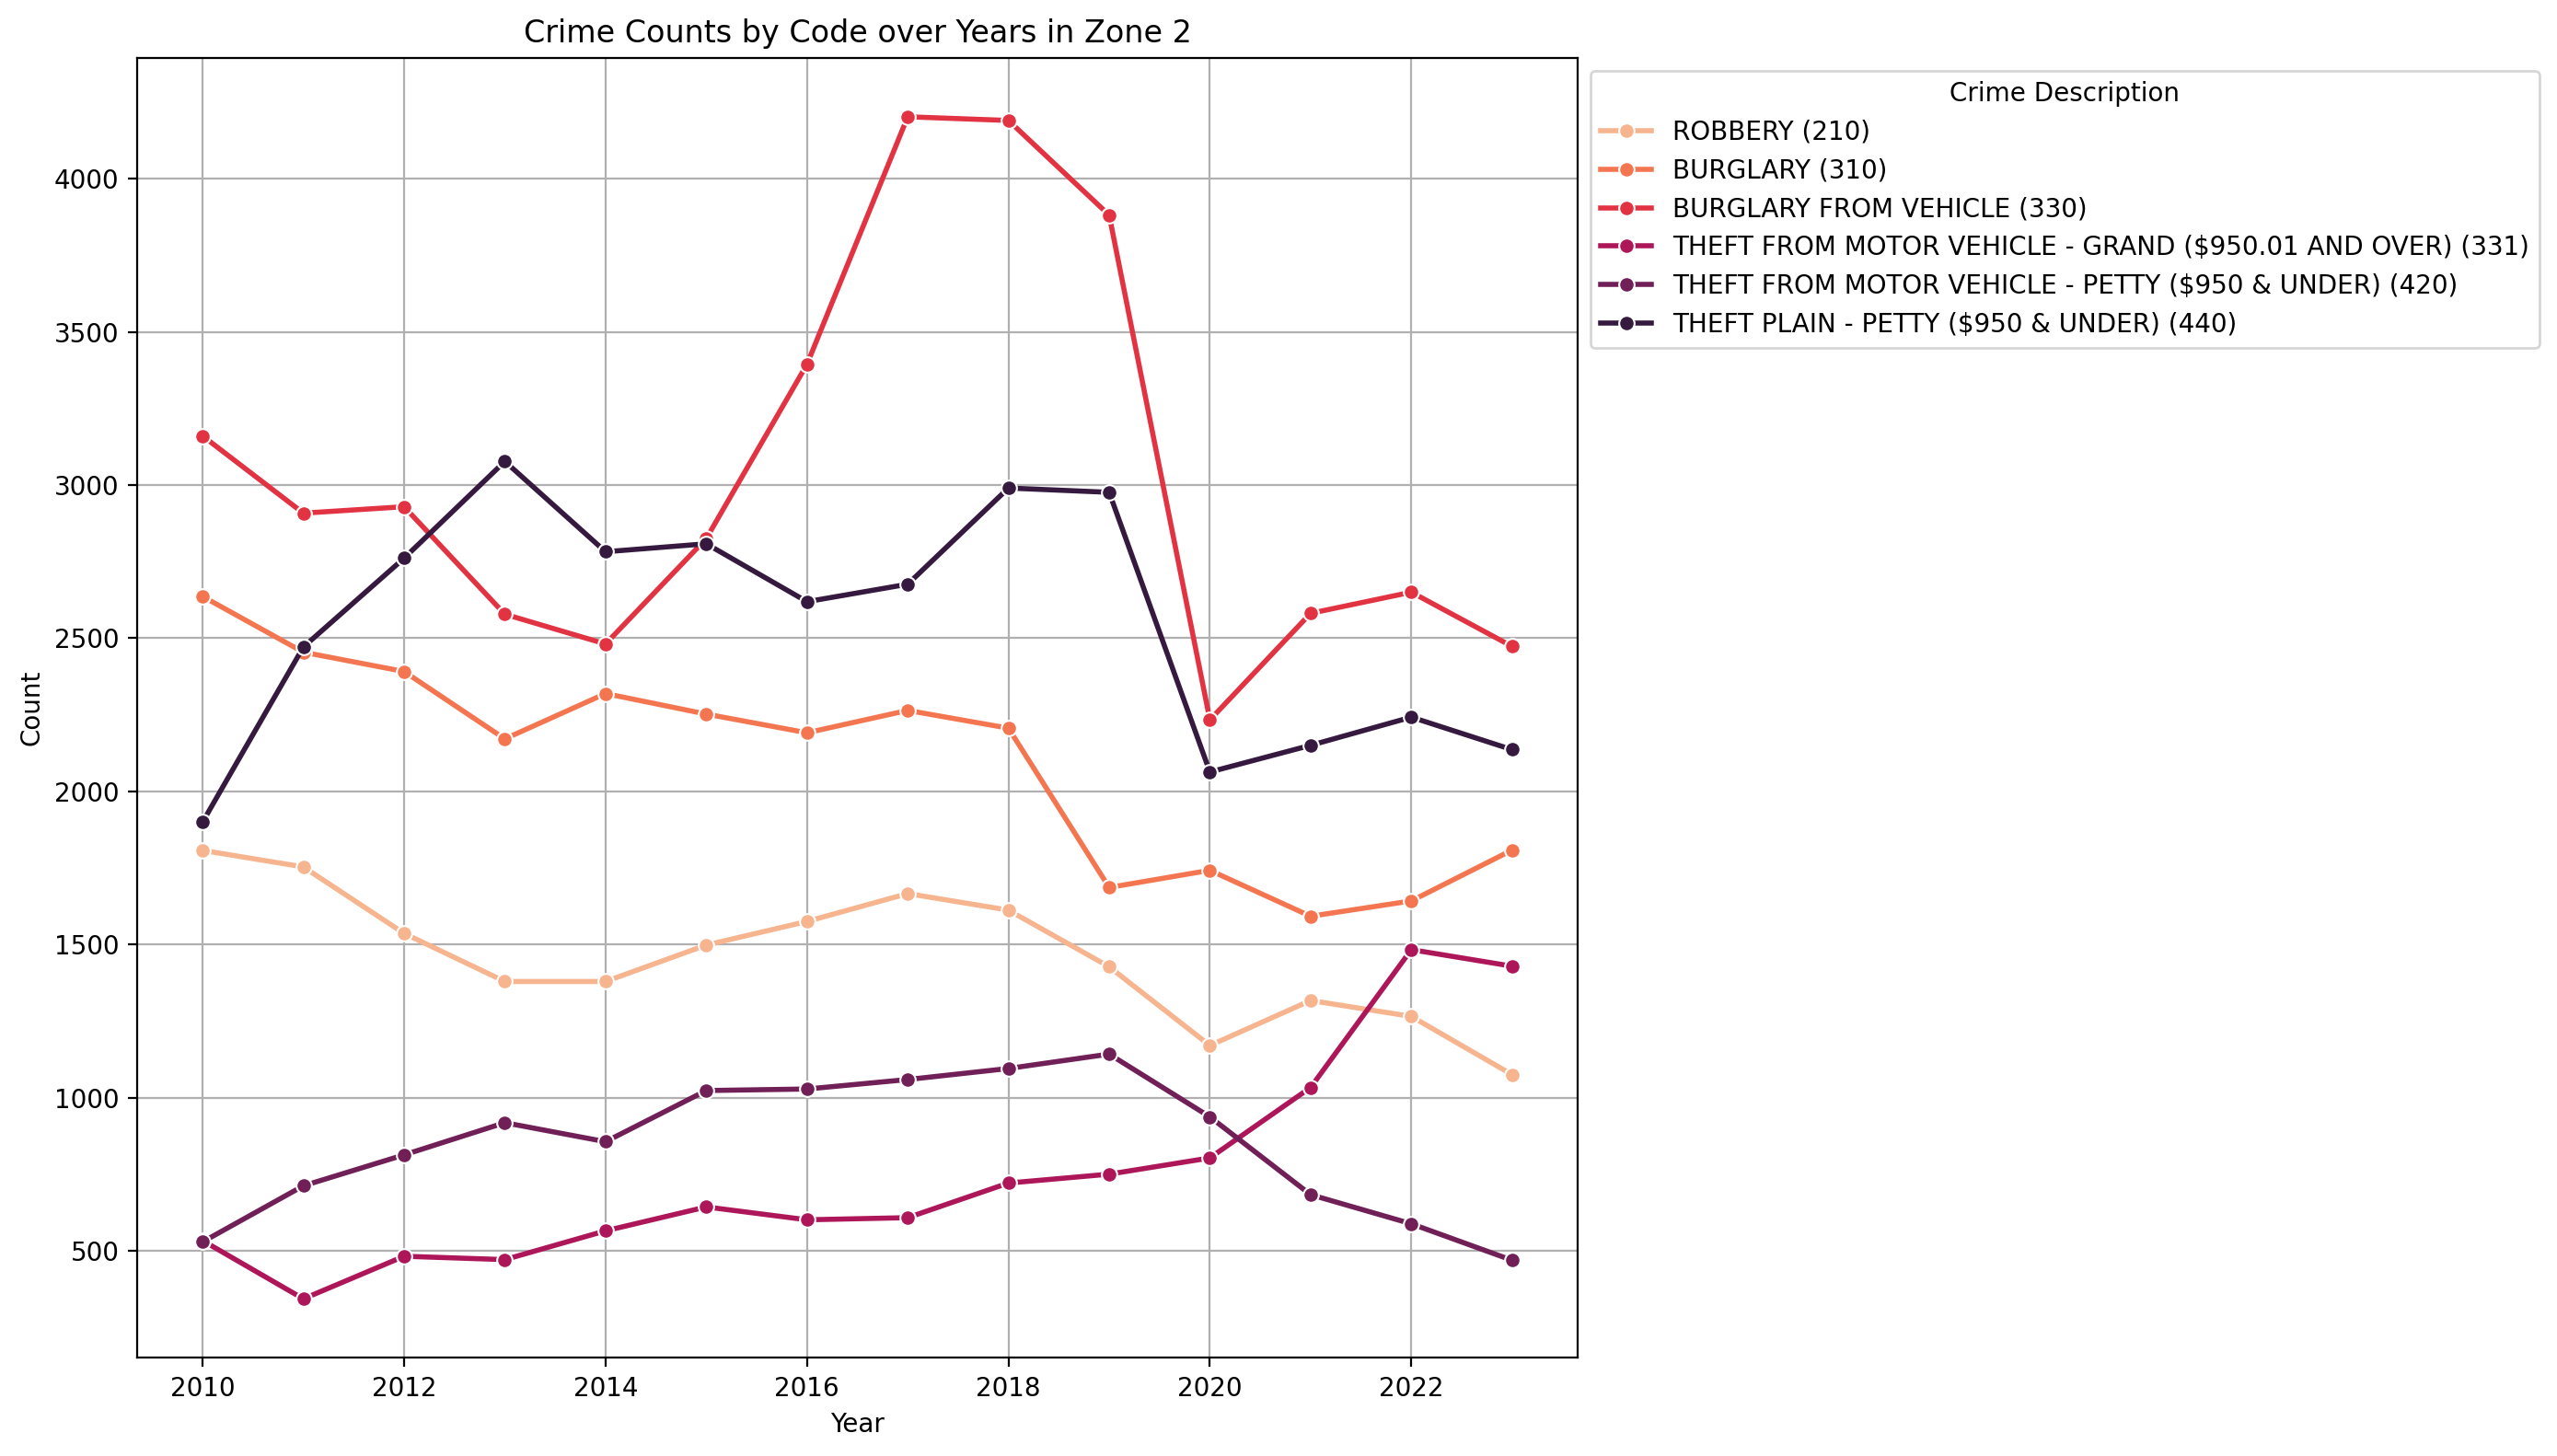

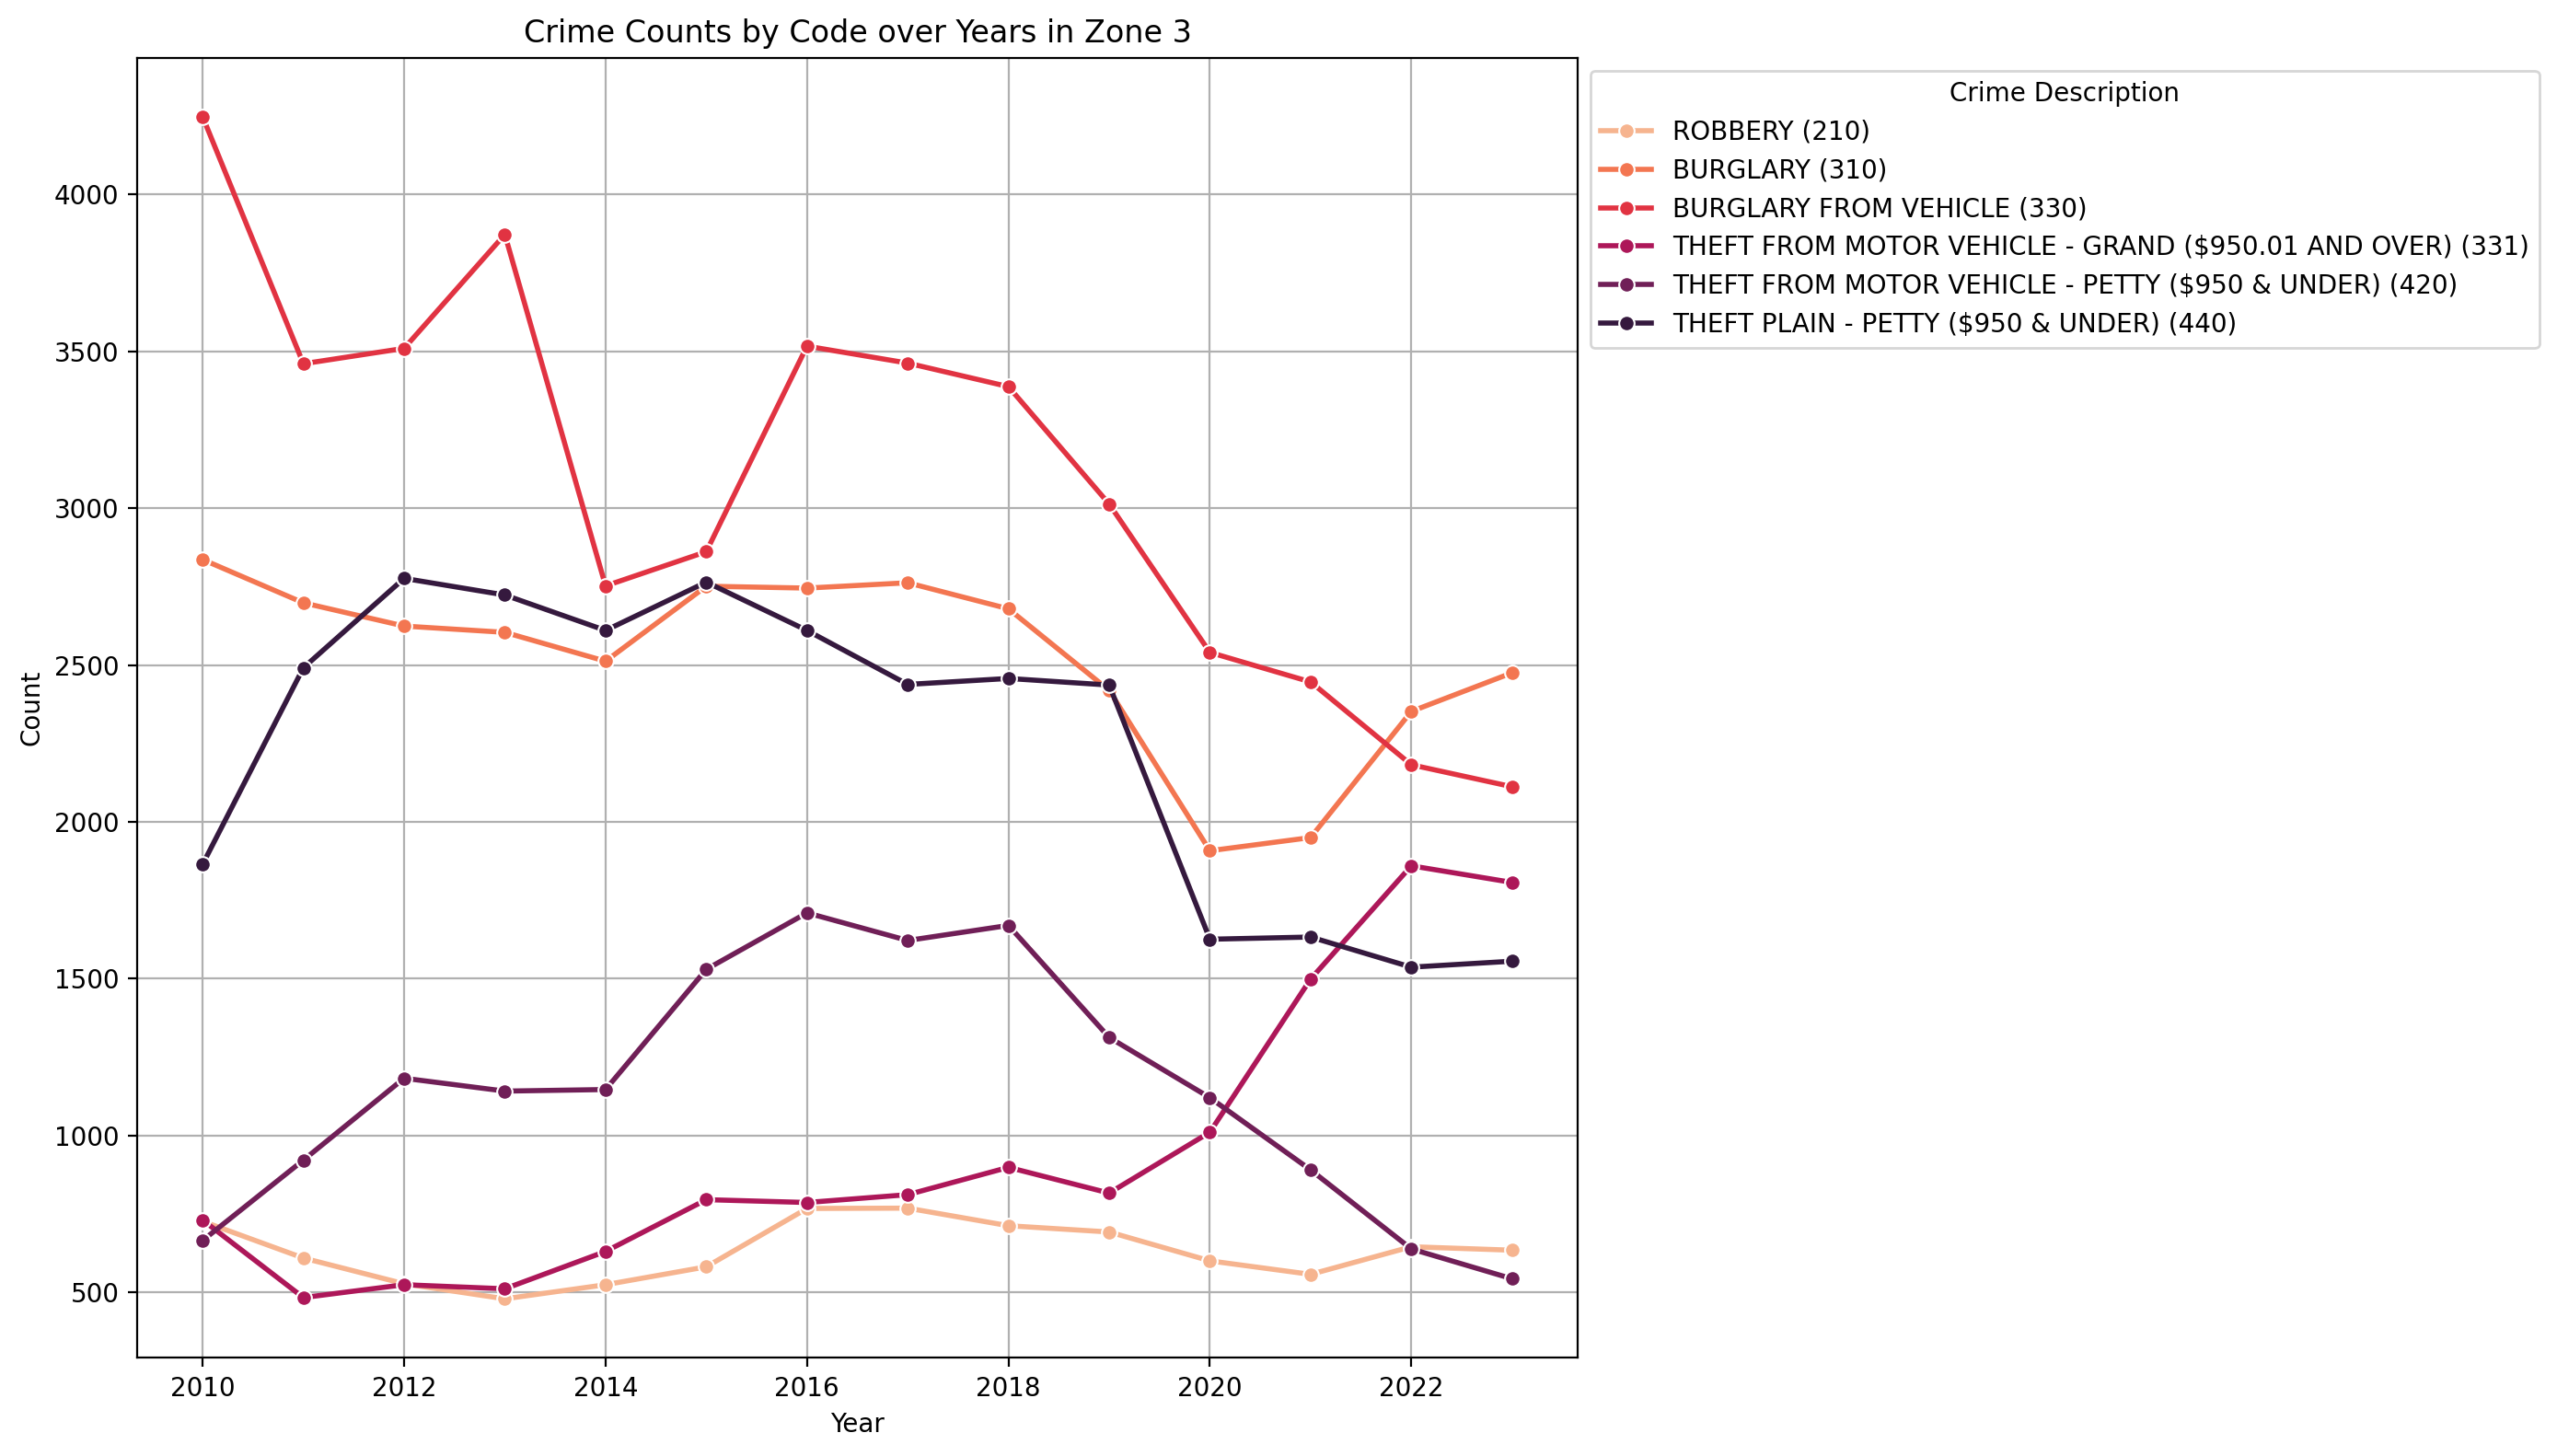

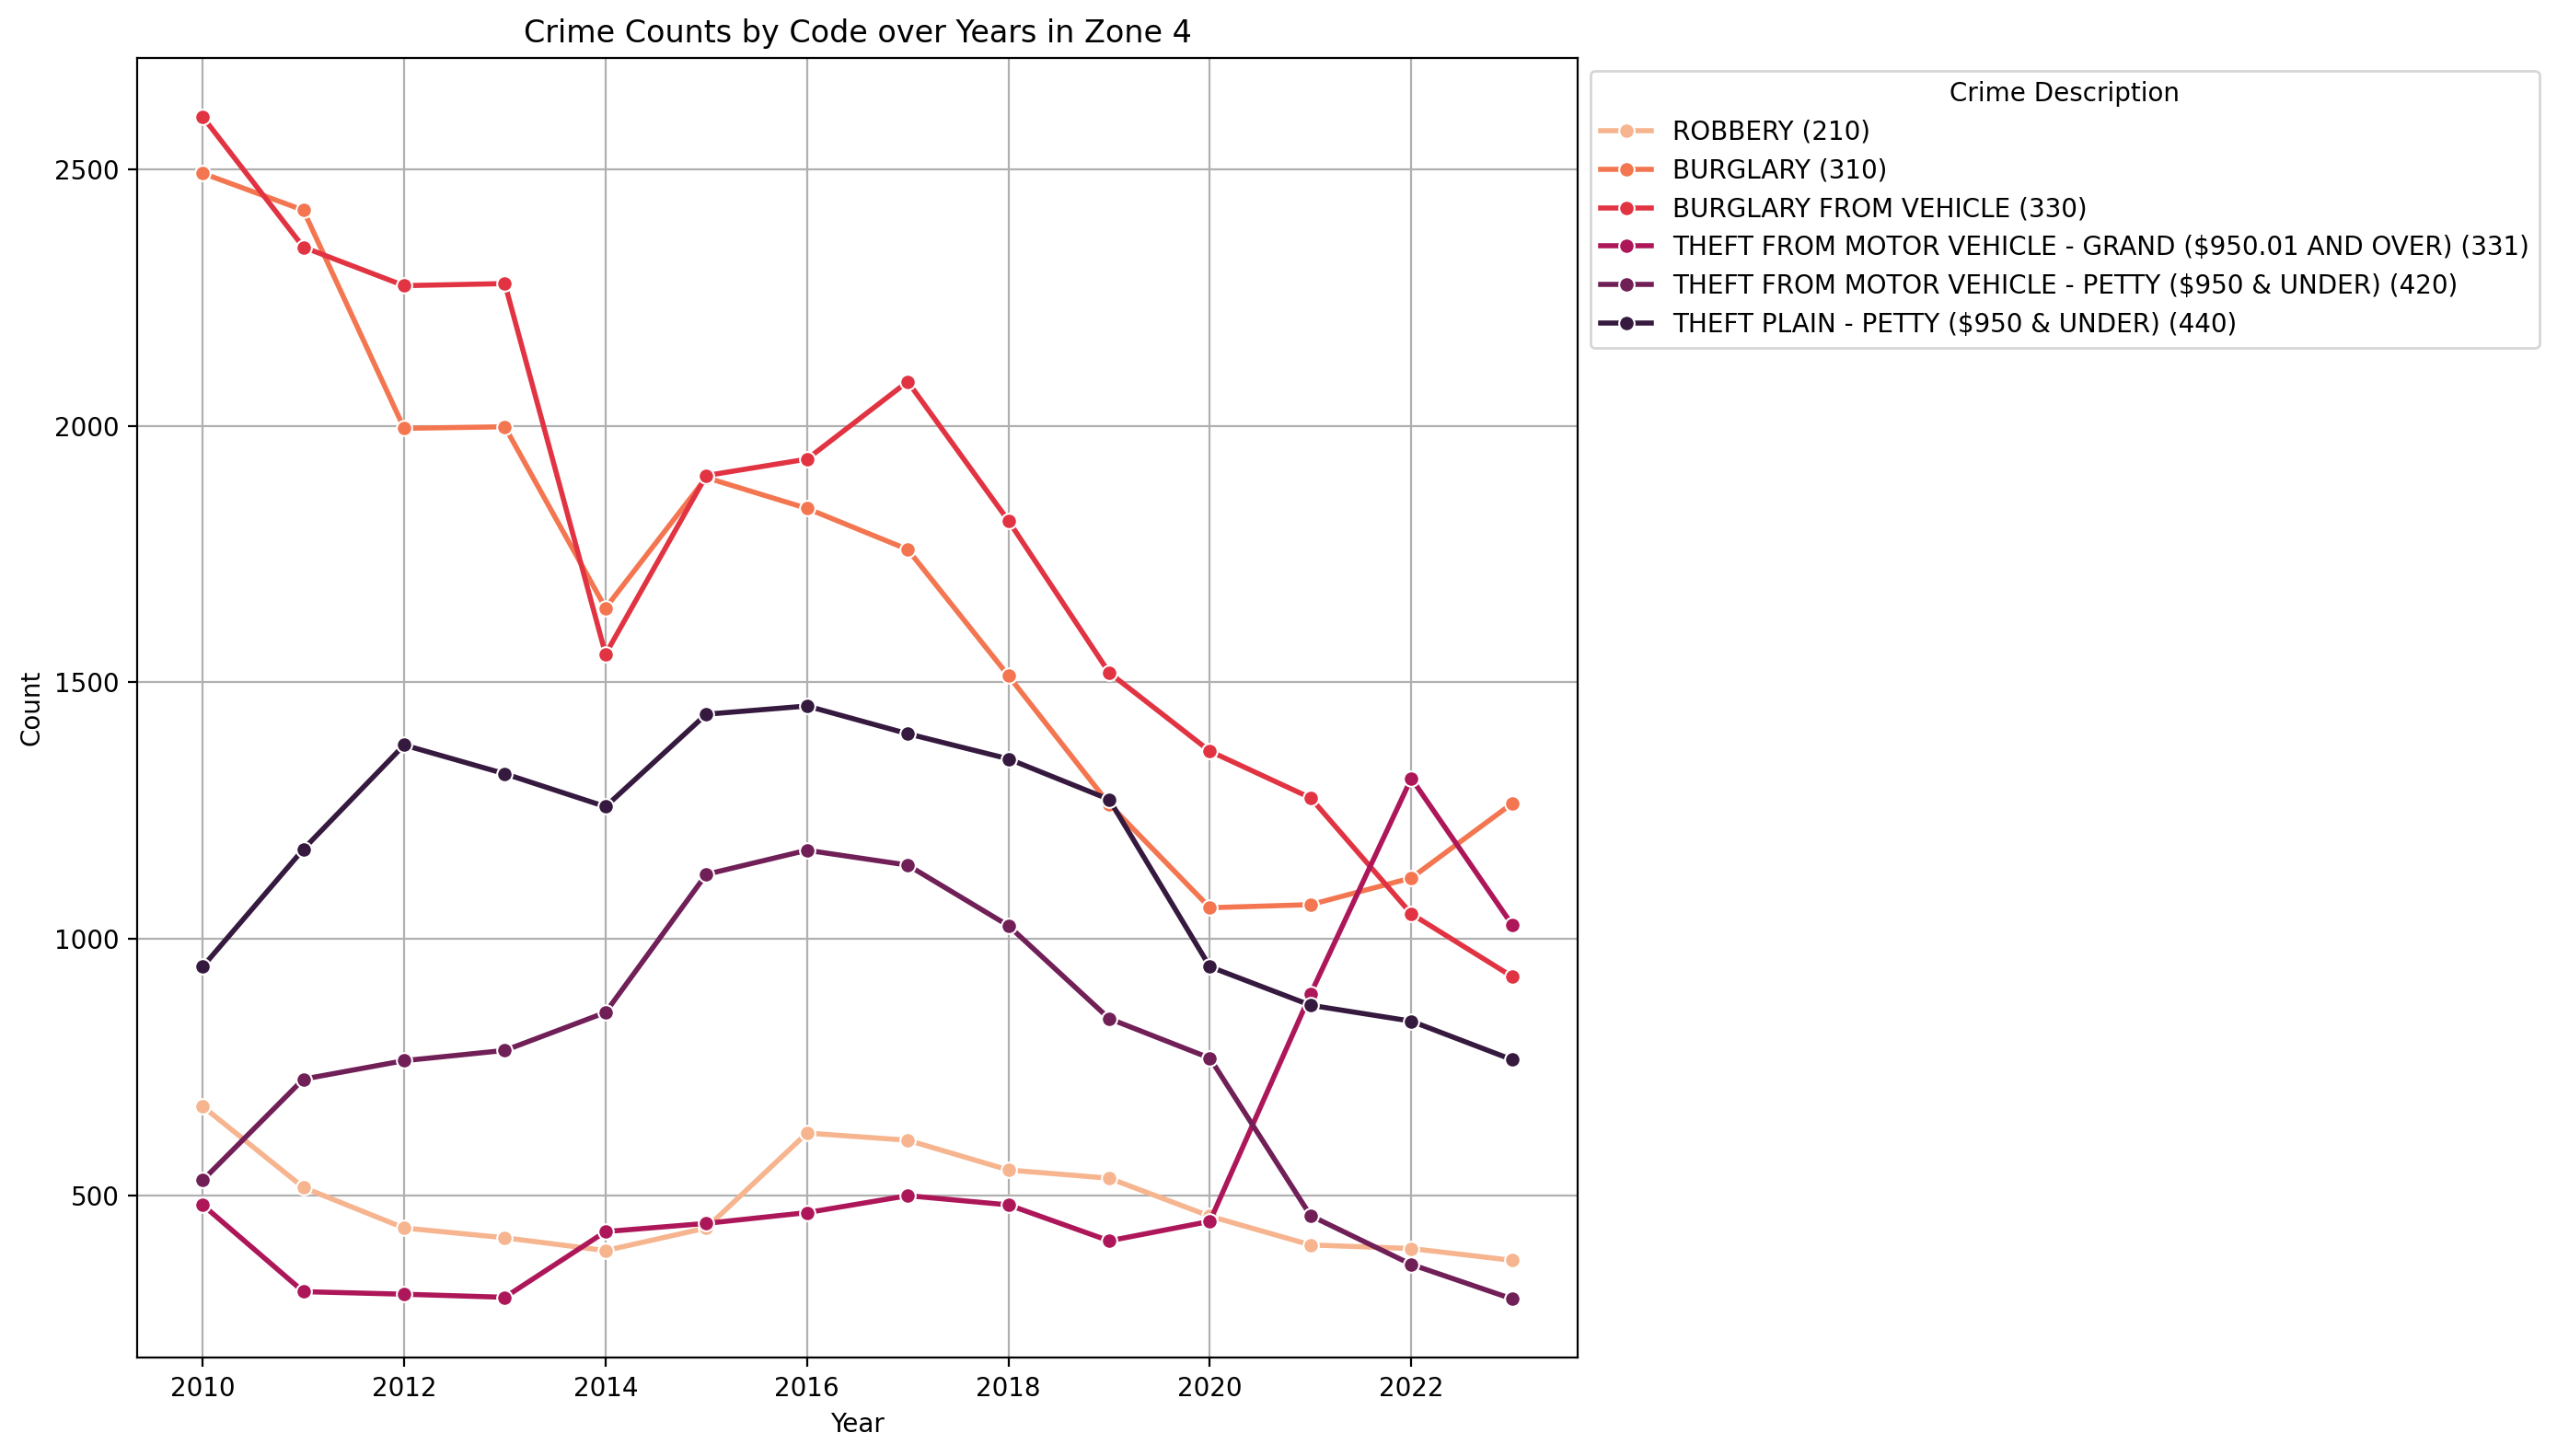

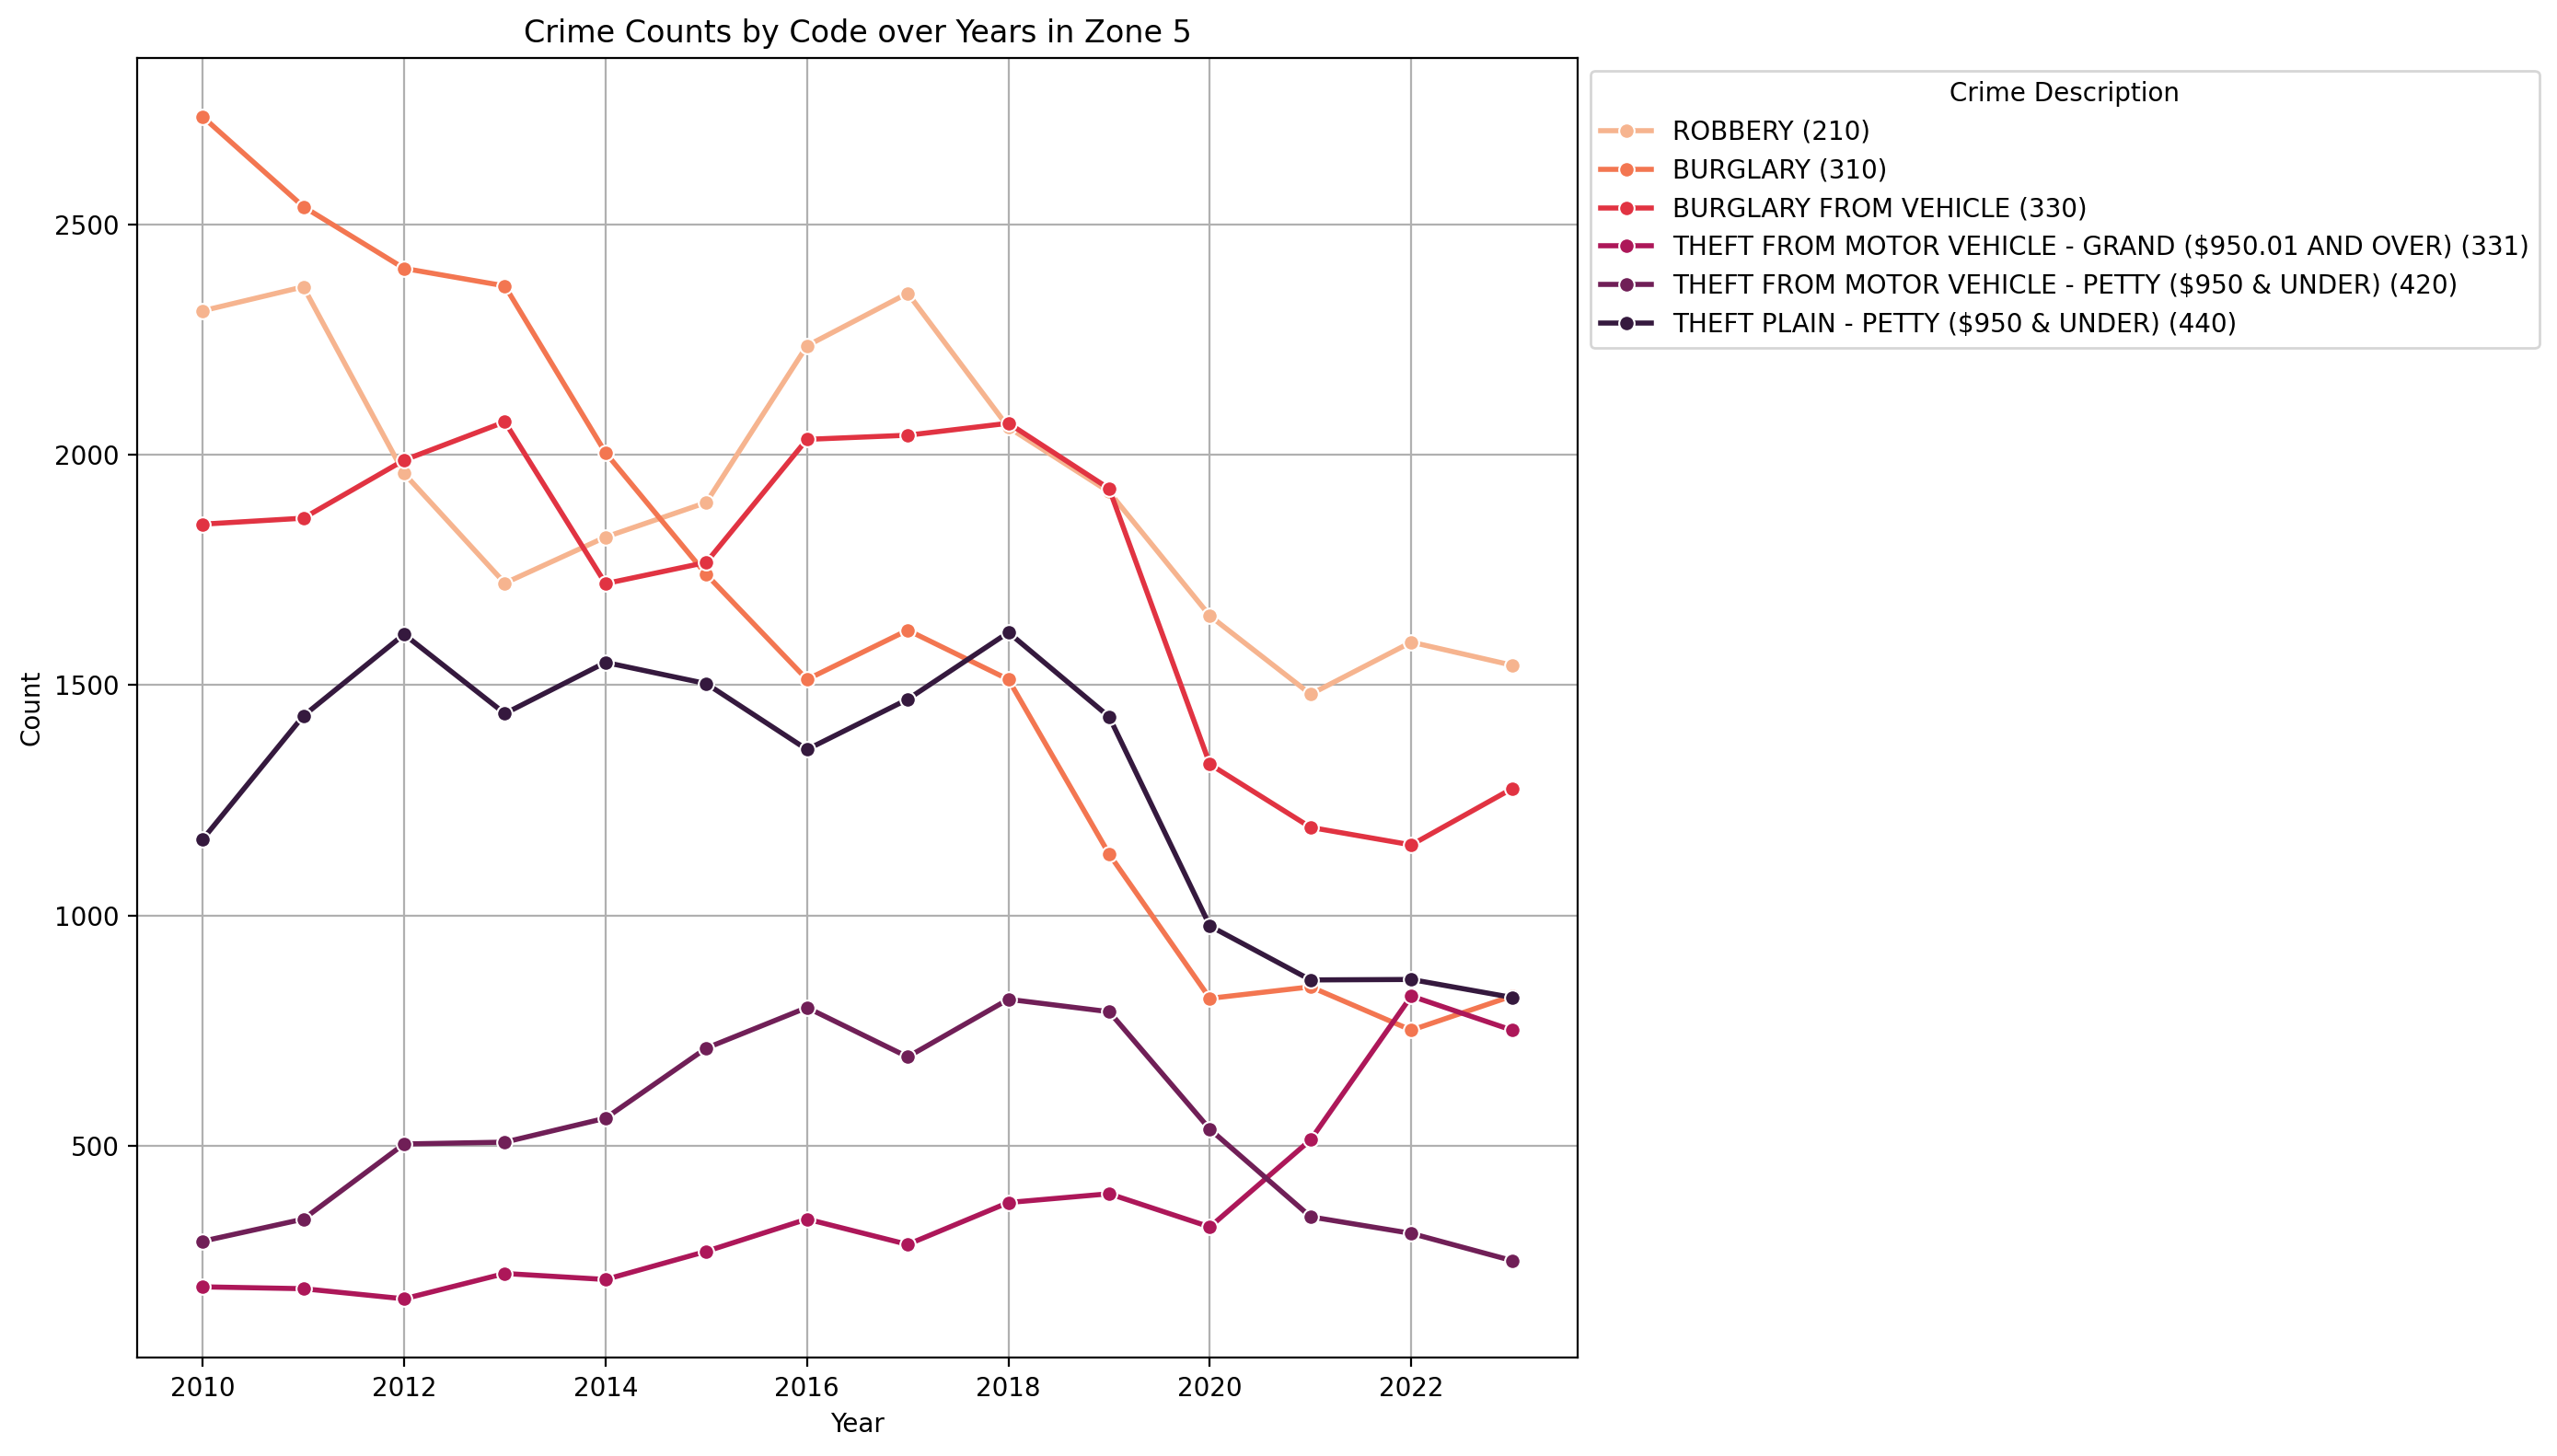

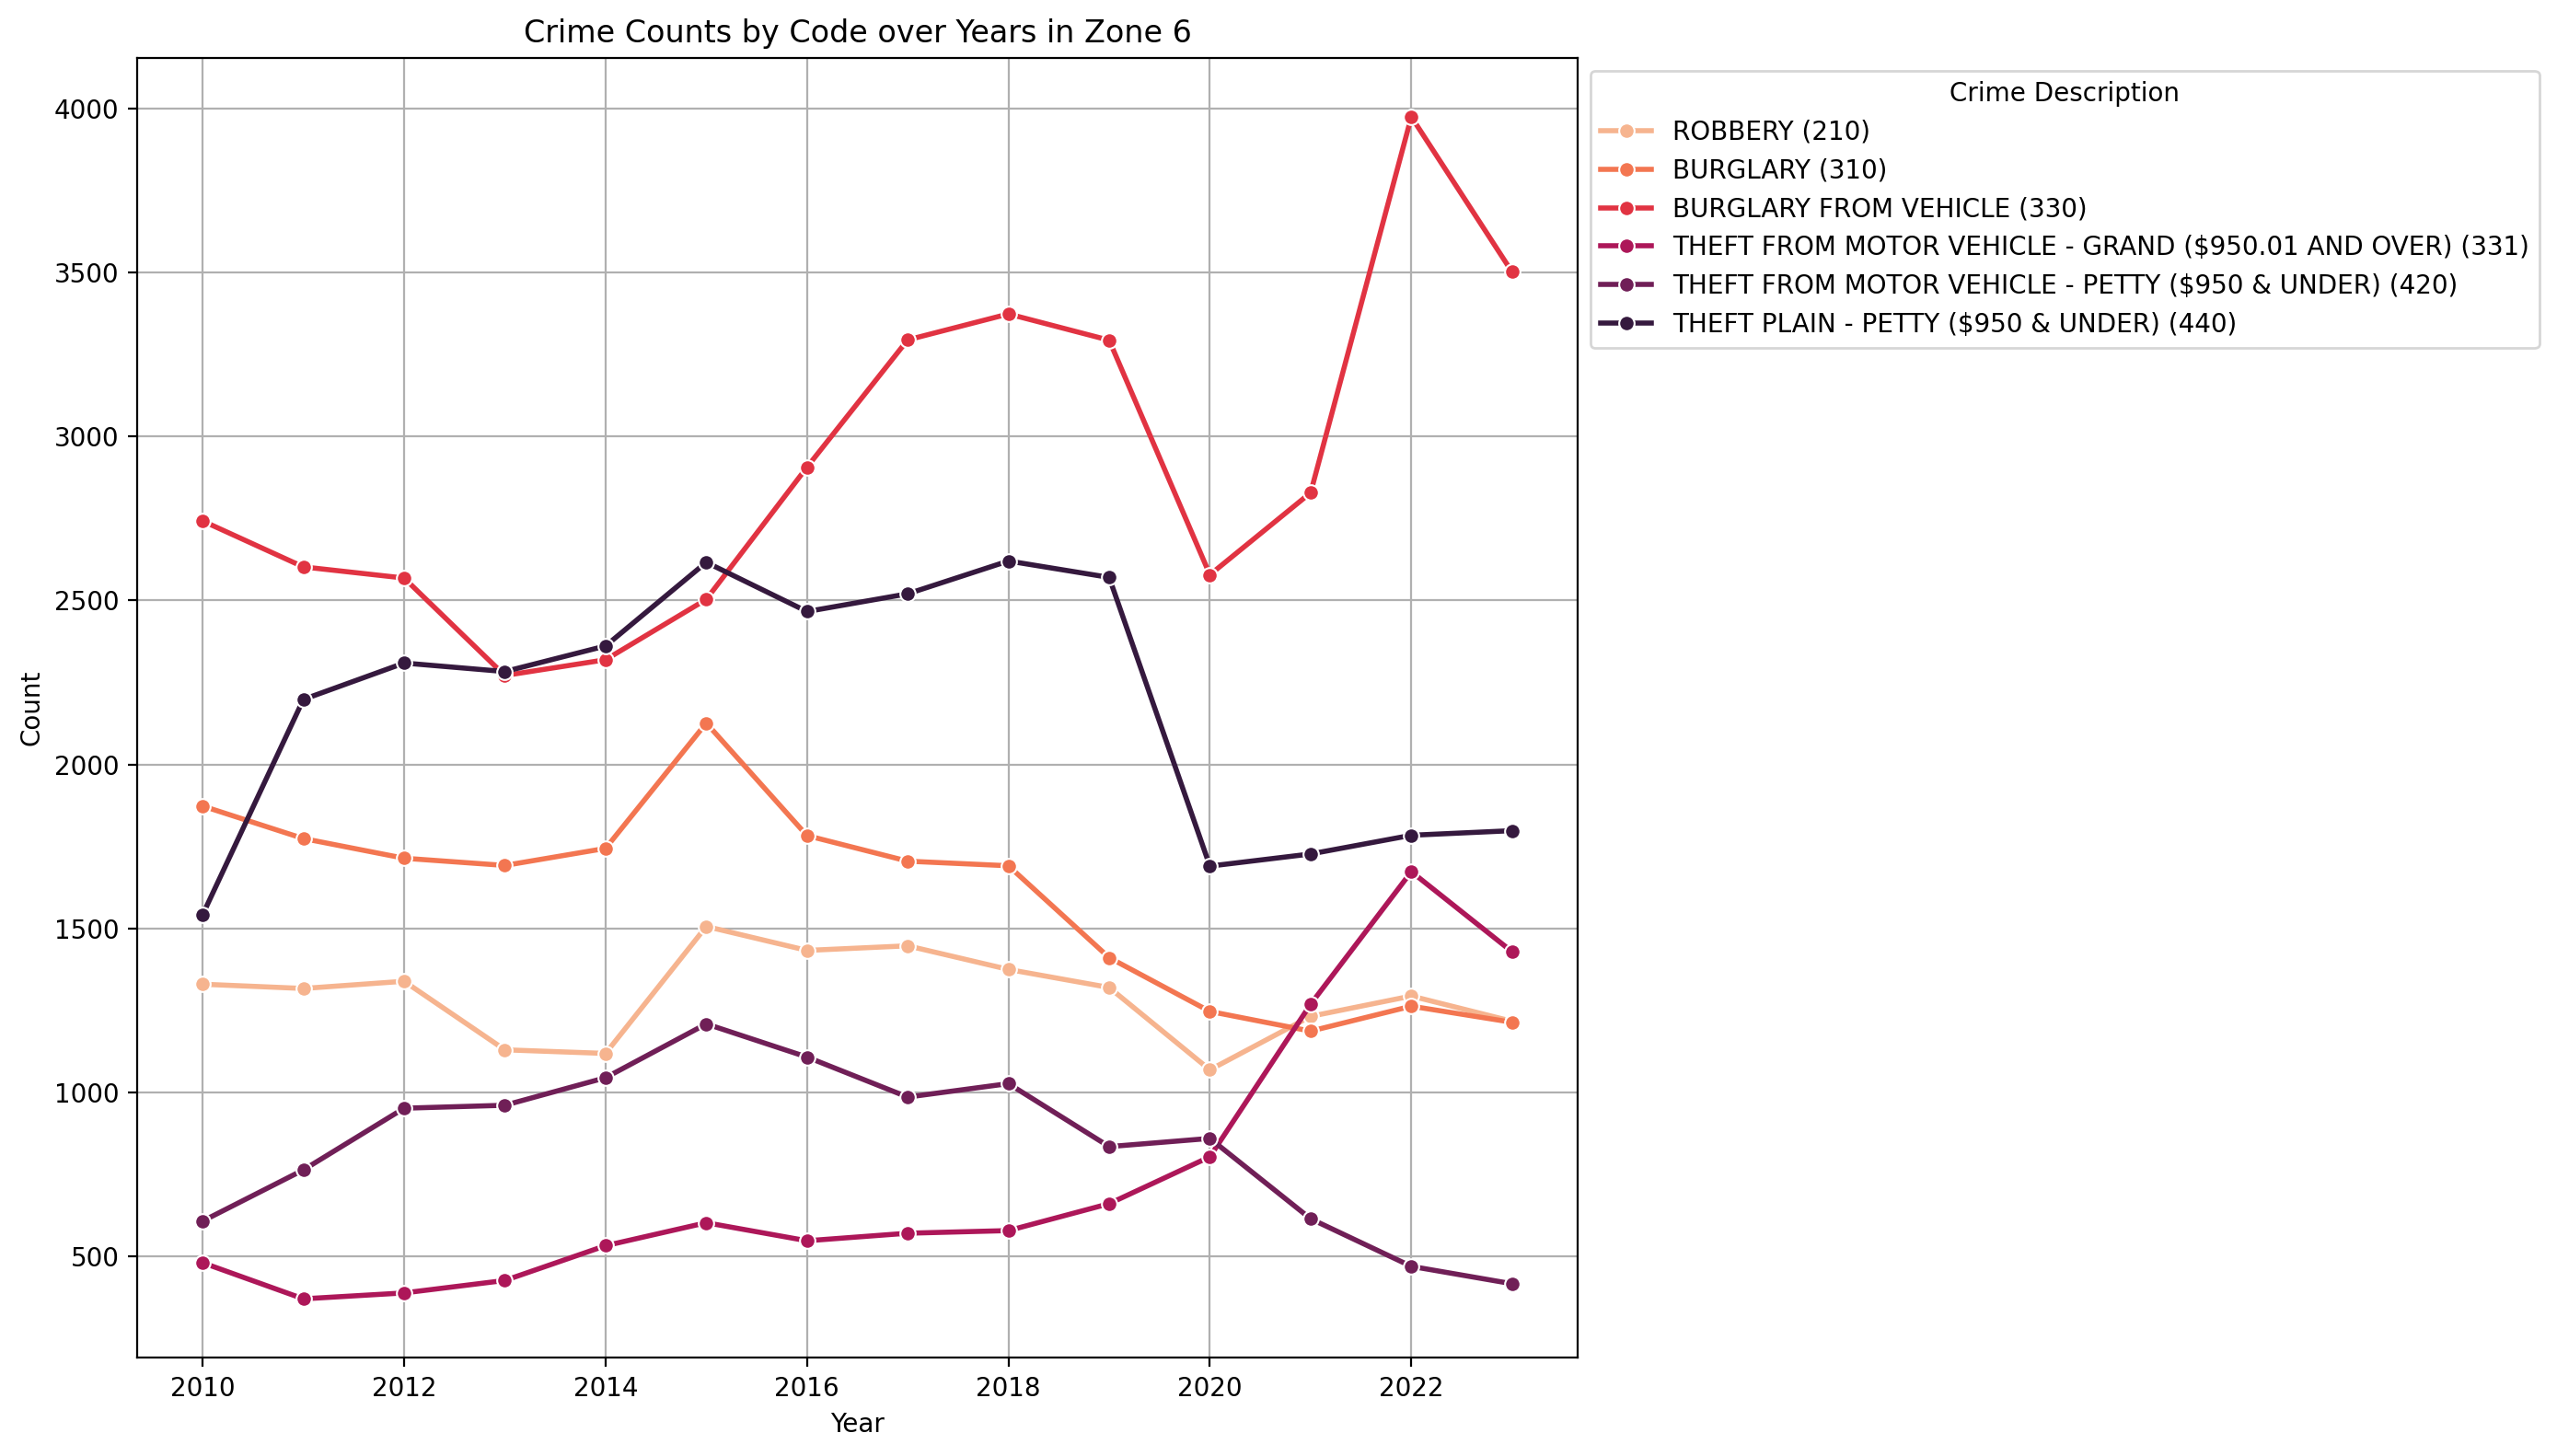

In [79]:
#1.2 A closer look at the Crime Codes per Zones
# We were right to not just trust the overall trend. While it is good news to see that crime related to theft, burglary
# are down, we see that not all areas share that conclusion. It is time to dive deeper
# and take a look at our Zones over the years.

# Group by Zone, year, and crime_code, then count occurrences
crime_counts = crime.groupby(['Zone', 'year', 'Crime Code']).size().unstack(fill_value=0)

# Reset index to get a DataFrame suitable for plotting
crime_counts = crime_counts.reset_index()

# Plot each zone separately
for zone in range(1, 7):
    plt.figure(figsize=(14, 8))
    zone_data = crime_counts[crime_counts['Zone'] == zone].set_index('year')
    
    # Plot each crime code over the years
    for crime_code in zone_data.columns[1:]:
        sns.lineplot(data=zone_data, x=zone_data.index, y=crime_code, marker='o', linewidth=2, label=f'{crime_code_desc[crime_code]} ({crime_code})')
    
    plt.title(f'Crime Counts by Code over Years in Zone {zone}')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.legend(title='Crime Description', bbox_to_anchor=(1, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


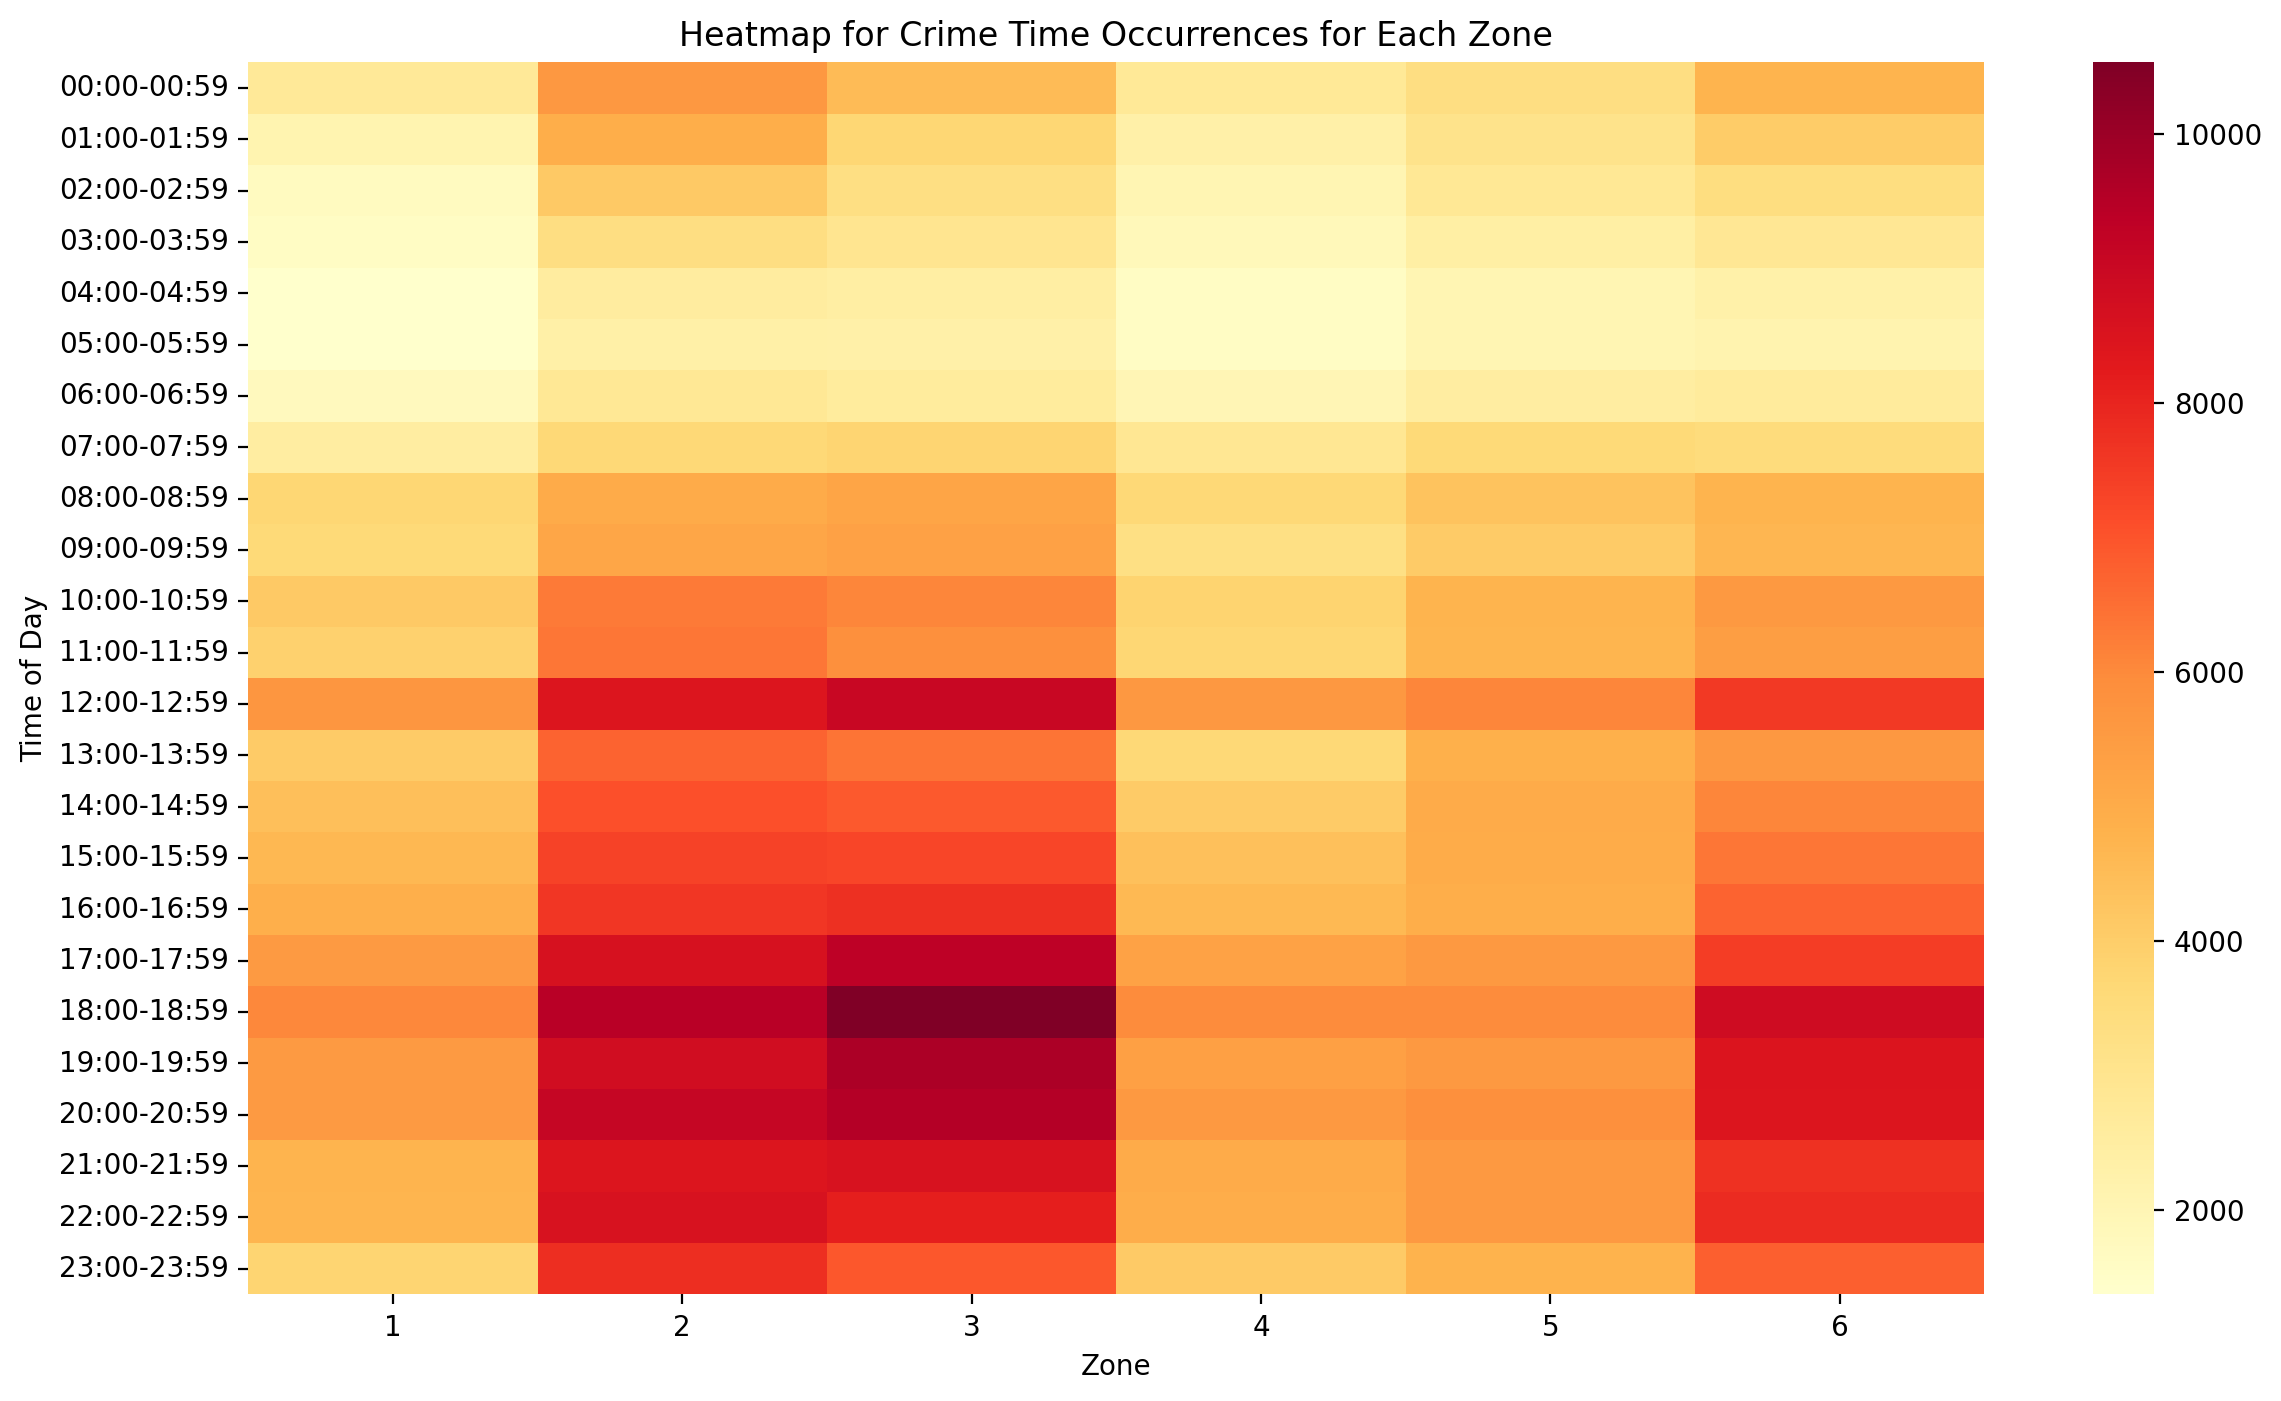

In [80]:
#1.4 When do these crimes occur general picture

crime['Hour_Block'] = crime['TIME OCC'].dt.hour
crime['Hour_Block'] = crime['Hour_Block'].astype(str).str.zfill(2) + ':00-' + crime['Hour_Block'].astype(str).str.zfill(2) + ':59'
crime_counts = crime.groupby(['Zone', 'Hour_Block']).size().reset_index(name='Count')

# Pivot table for heatmap visualization
crime_pivot = crime_counts.pivot(index='Hour_Block', columns='Zone', values='Count').fillna(0)

# Plotting heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(crime_pivot, cmap='YlOrRd', cbar=True)
plt.title('Heatmap for Crime Time Occurrences for Each Zone')
plt.xlabel('Zone')
plt.ylabel('Time of Day')
plt.show()

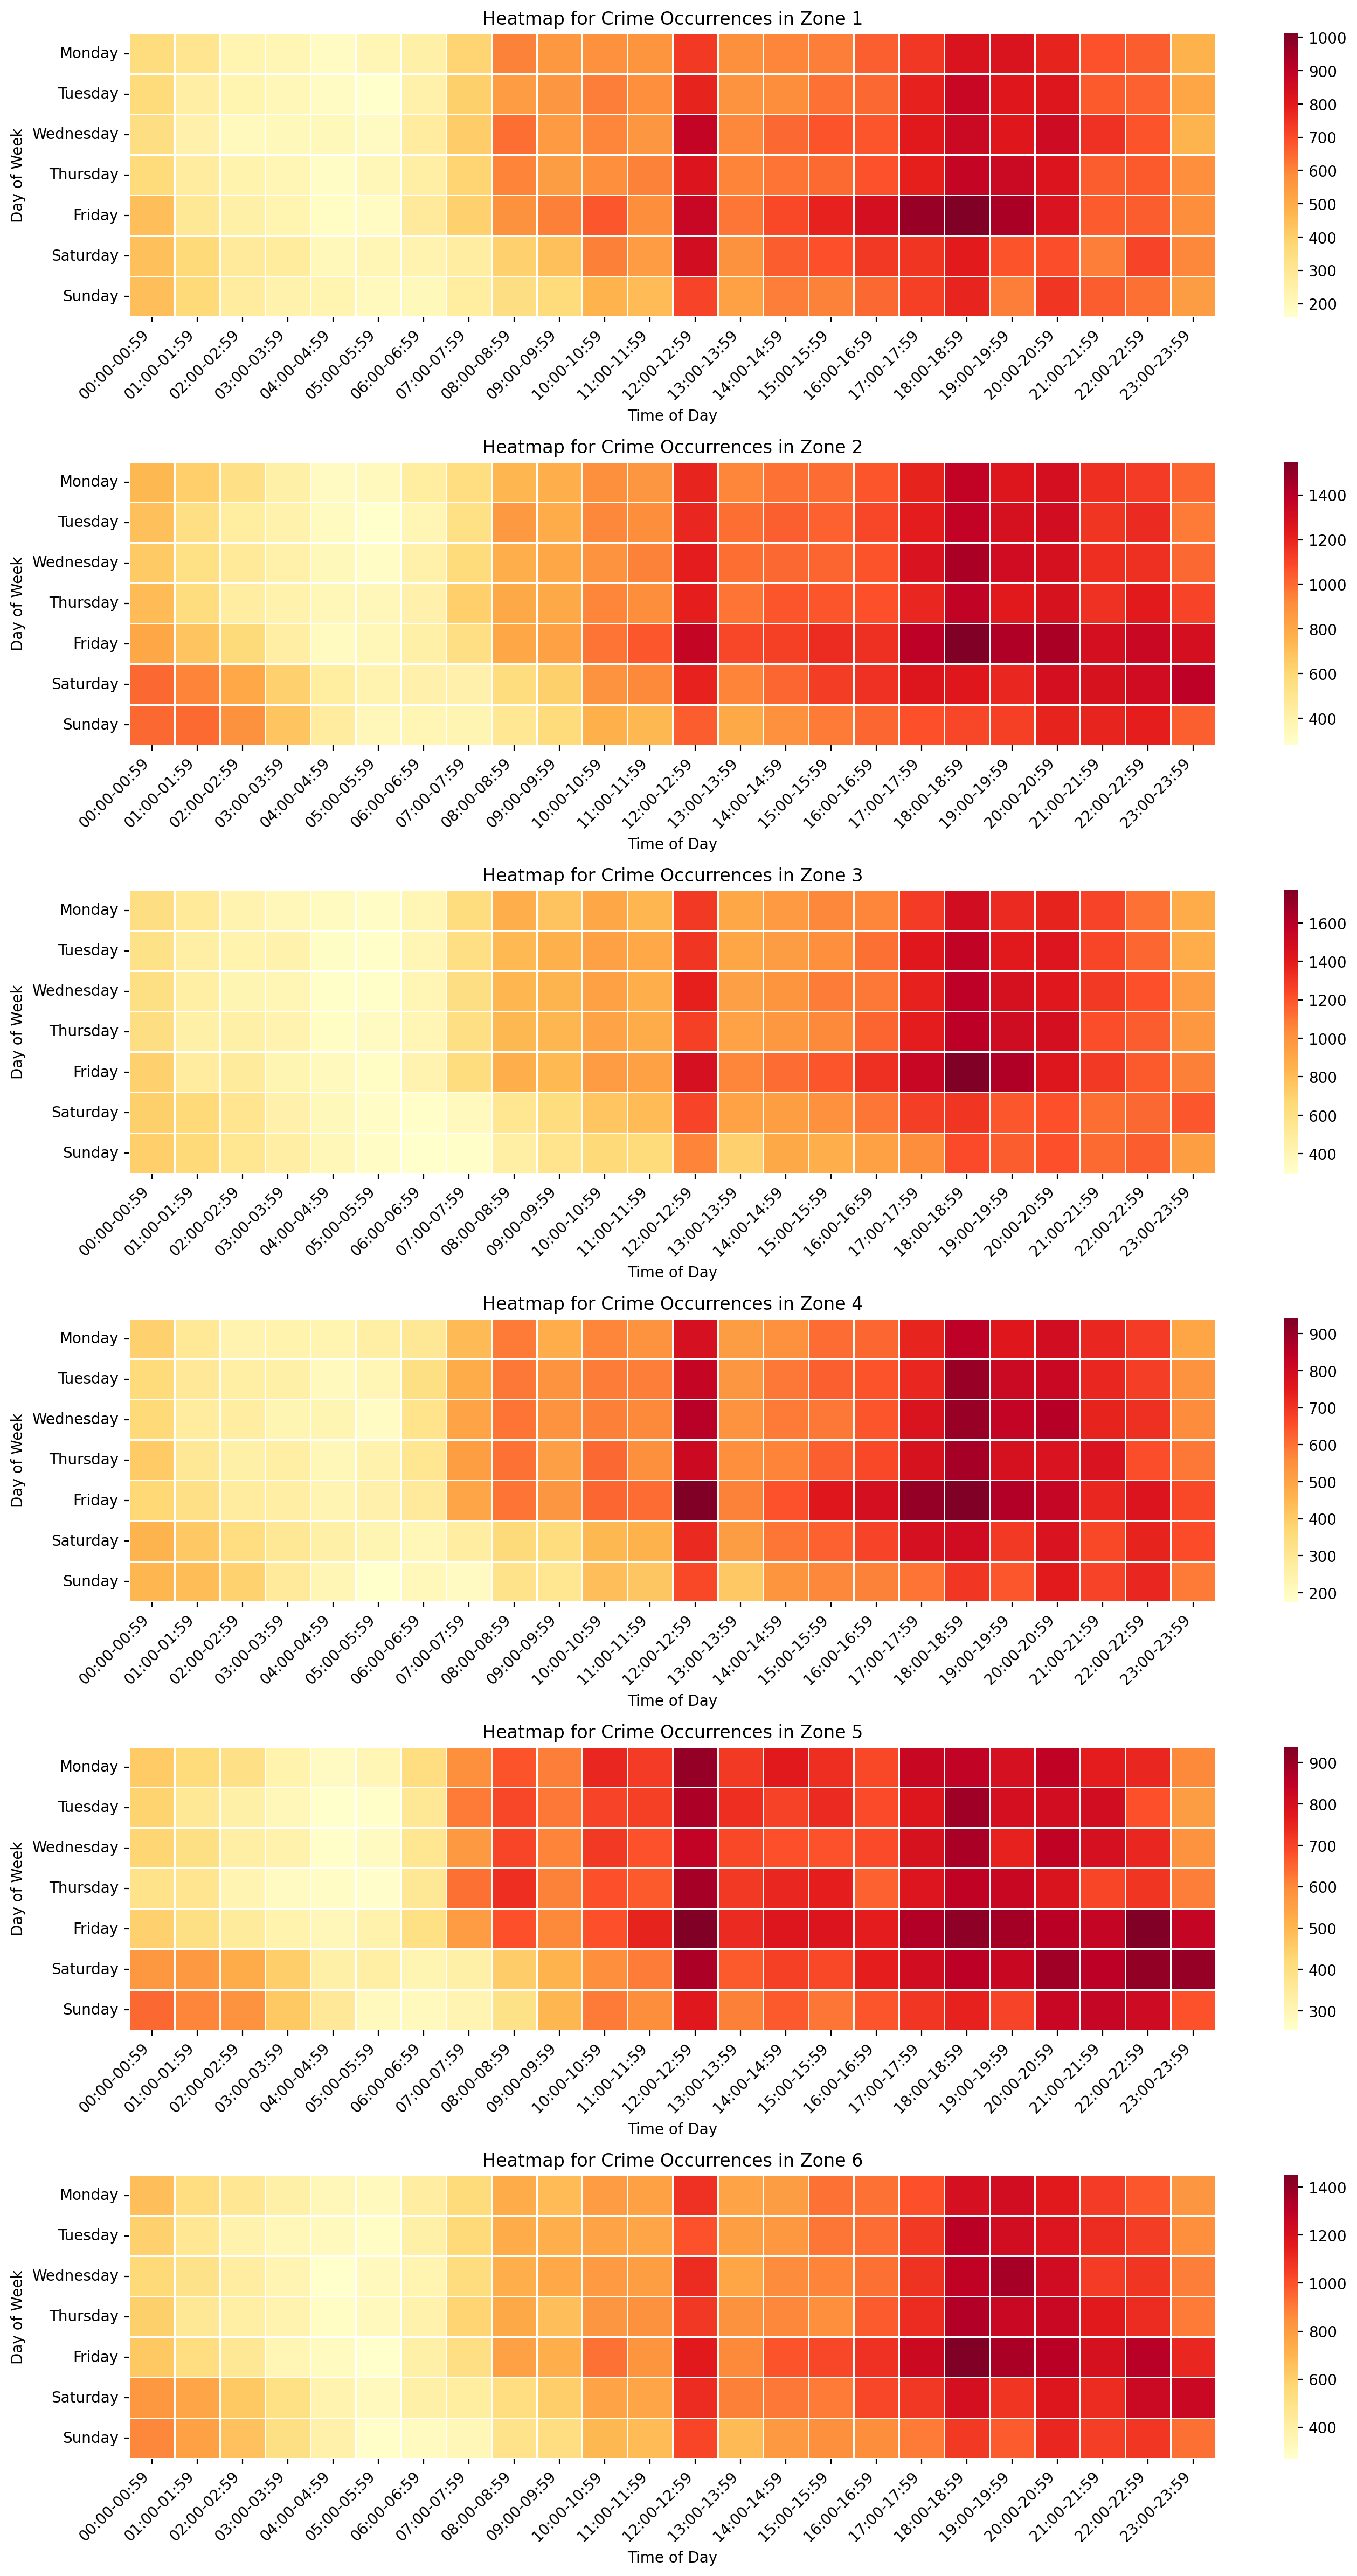

In [81]:
#1.4.1 Let's see if we can see a pattern for weekdays and the time of day
def crime_heatmap_by_zone(crime):
    crime['Hour_Block'] = crime['TIME OCC'].dt.hour
    crime['Hour_Block'] = crime['Hour_Block'].astype(str).str.zfill(2) + ':00-' + crime['Hour_Block'].astype(str).str.zfill(2) + ':59'
    day_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    crime['Weekday']= pd.Categorical(crime['Weekday'], categories=day_order, ordered = True)

    weekday_counts = crime.groupby(['Zone', 'Weekday', 'Hour_Block']).size().reset_index(name='count')
    
    zones=sorted(crime['Zone'].unique())
    n_zones=len(zones)
    
    fig, axes= plt.subplots(n_zones, 1, figsize=(14, n_zones * 4), sharex=False)
    
    for i,zone in enumerate(zones):
        zone_data = weekday_counts[weekday_counts['Zone']==zone]
        weekday_pivot = zone_data.pivot_table(index='Weekday', columns='Hour_Block', values='count', fill_value=0)
        sns.heatmap(weekday_pivot,cmap='YlOrRd' ,cbar=True, linewidths=.5, ax=axes[i])
        axes[i].set_title(f'Heatmap for Crime Occurrences in Zone {zone}')
        axes[i].set_xlabel('Time of Day')
        axes[i].set_ylabel('Day of Week')
        axes[i].set_xticklabels(weekday_pivot.columns, rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
crime_heatmap_by_zone(crime)

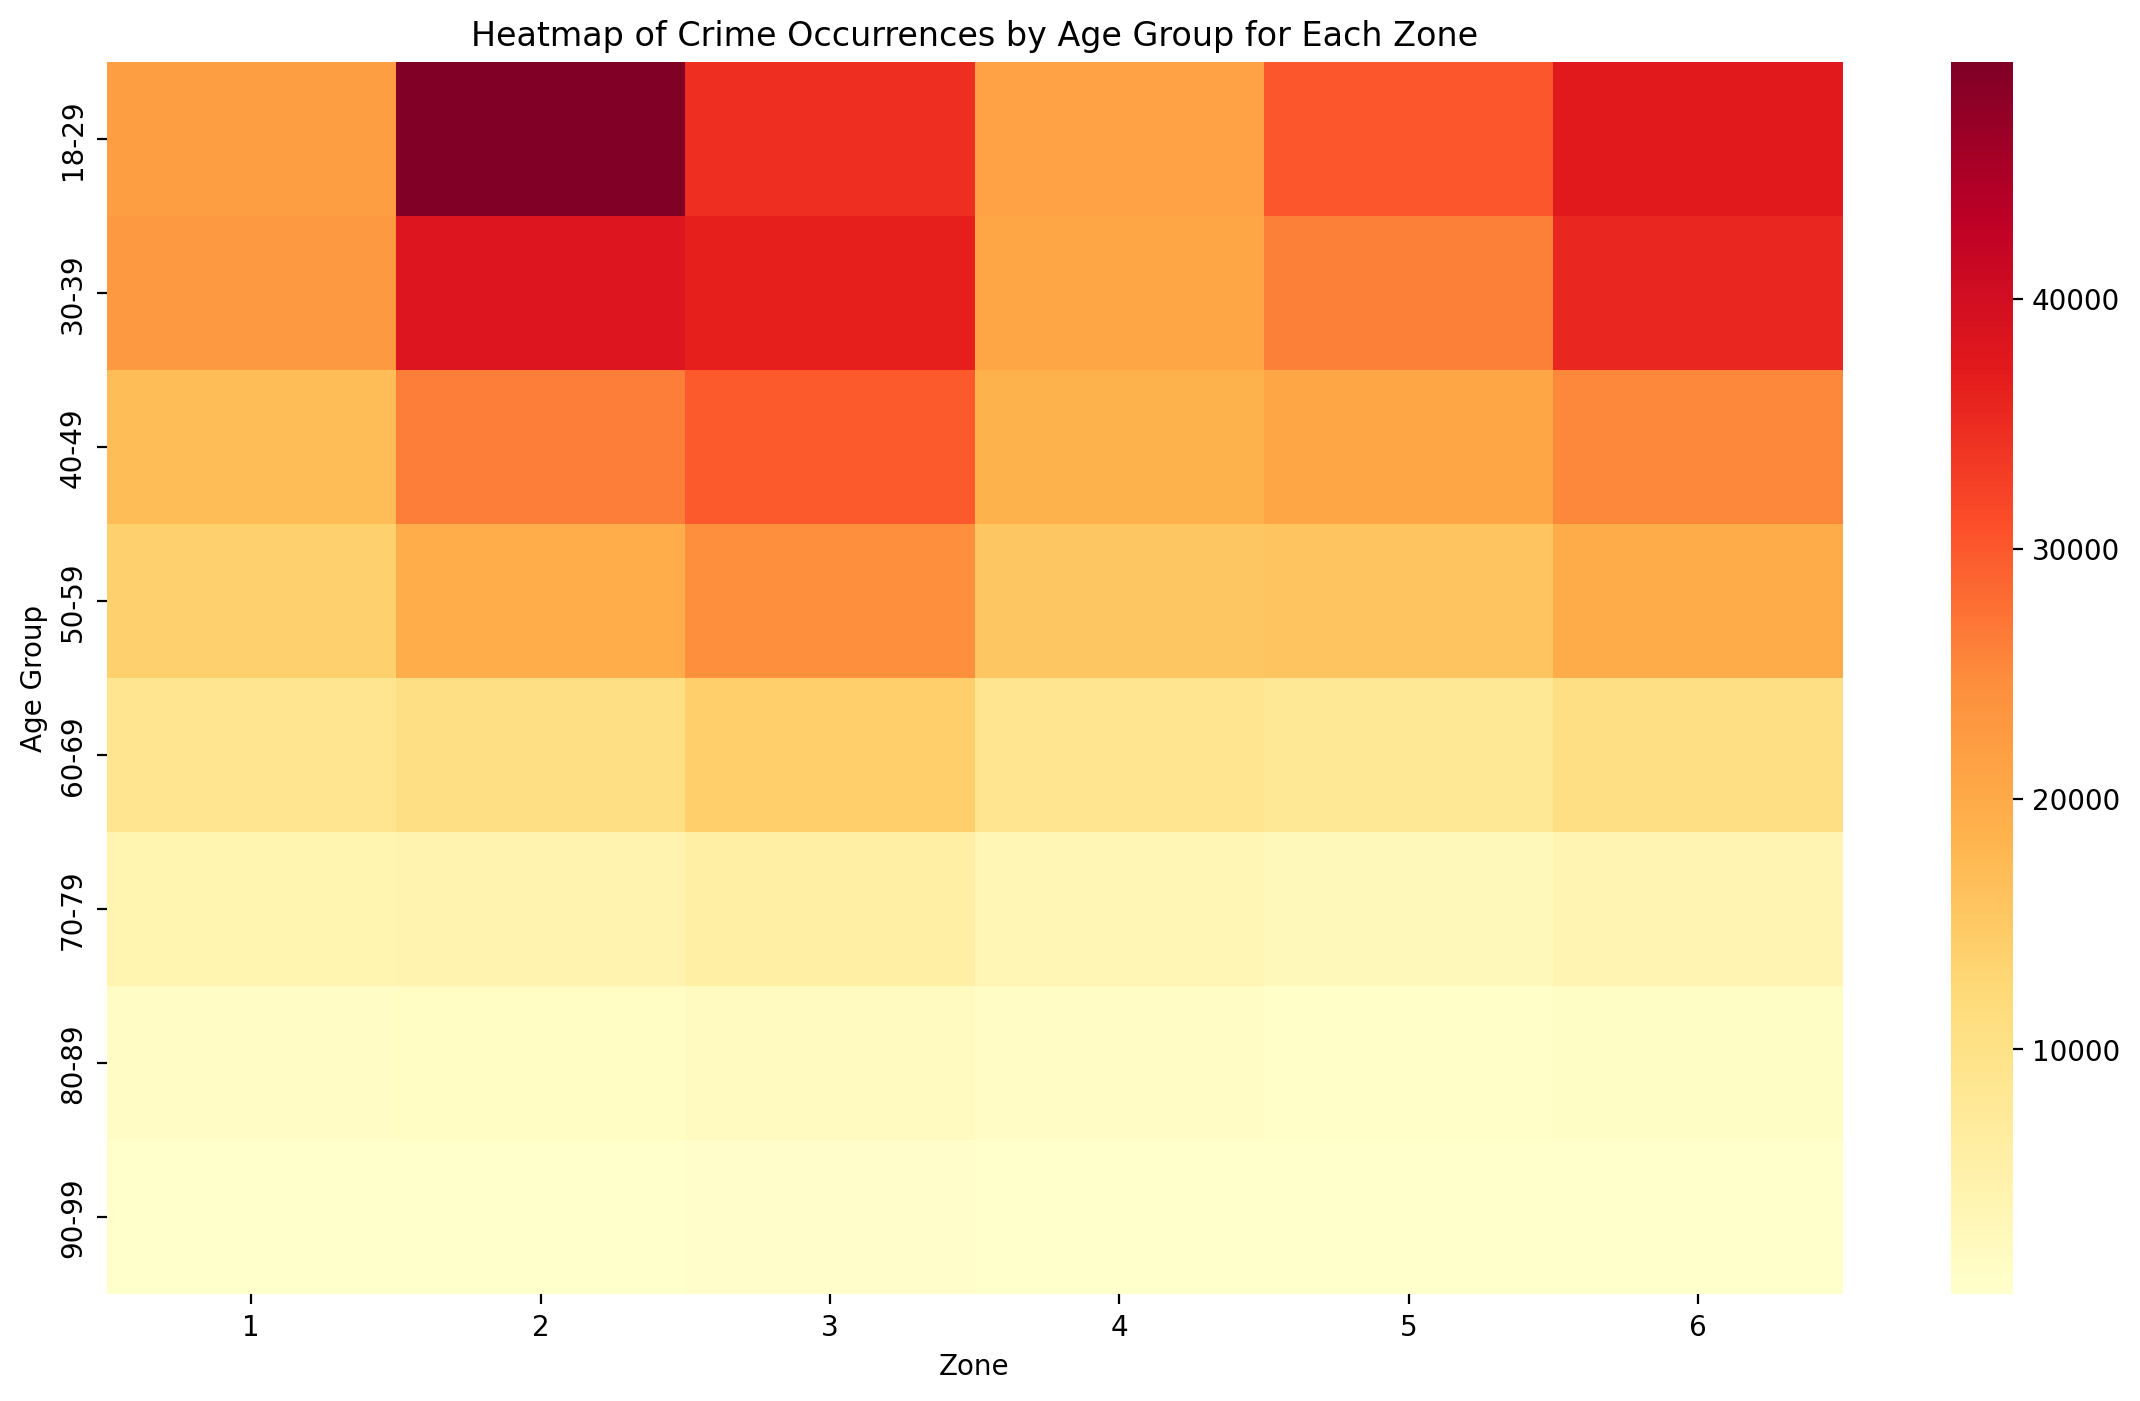

In [82]:
#1.5 Taking a closer look at the age groups per zone 
#Since we have ages from 18-99 filtered I will make age groups to analyze
bins =[18,30,40,50,60,70,80,90,100]
labels=['18-29', '30-39', '40-49','50-59','60-69','70-79','80-89','90-99']

crime['Age Group']= pd.cut(crime['Vict Age'],bins=bins, labels=labels, right=False)
age_counts = crime.groupby(['Zone', 'Age Group']).size().reset_index(name='count')

crime_pivot = age_counts.pivot(index='Age Group', columns = 'Zone', values='count').fillna(0)
plt.figure(figsize=(14, 8))
sns.heatmap(crime_pivot, cmap='YlOrRd', cbar=True)
plt.title('Heatmap of Crime Occurrences by Age Group for Each Zone')
plt.xlabel('Zone')
plt.ylabel('Age Group')
plt.show()

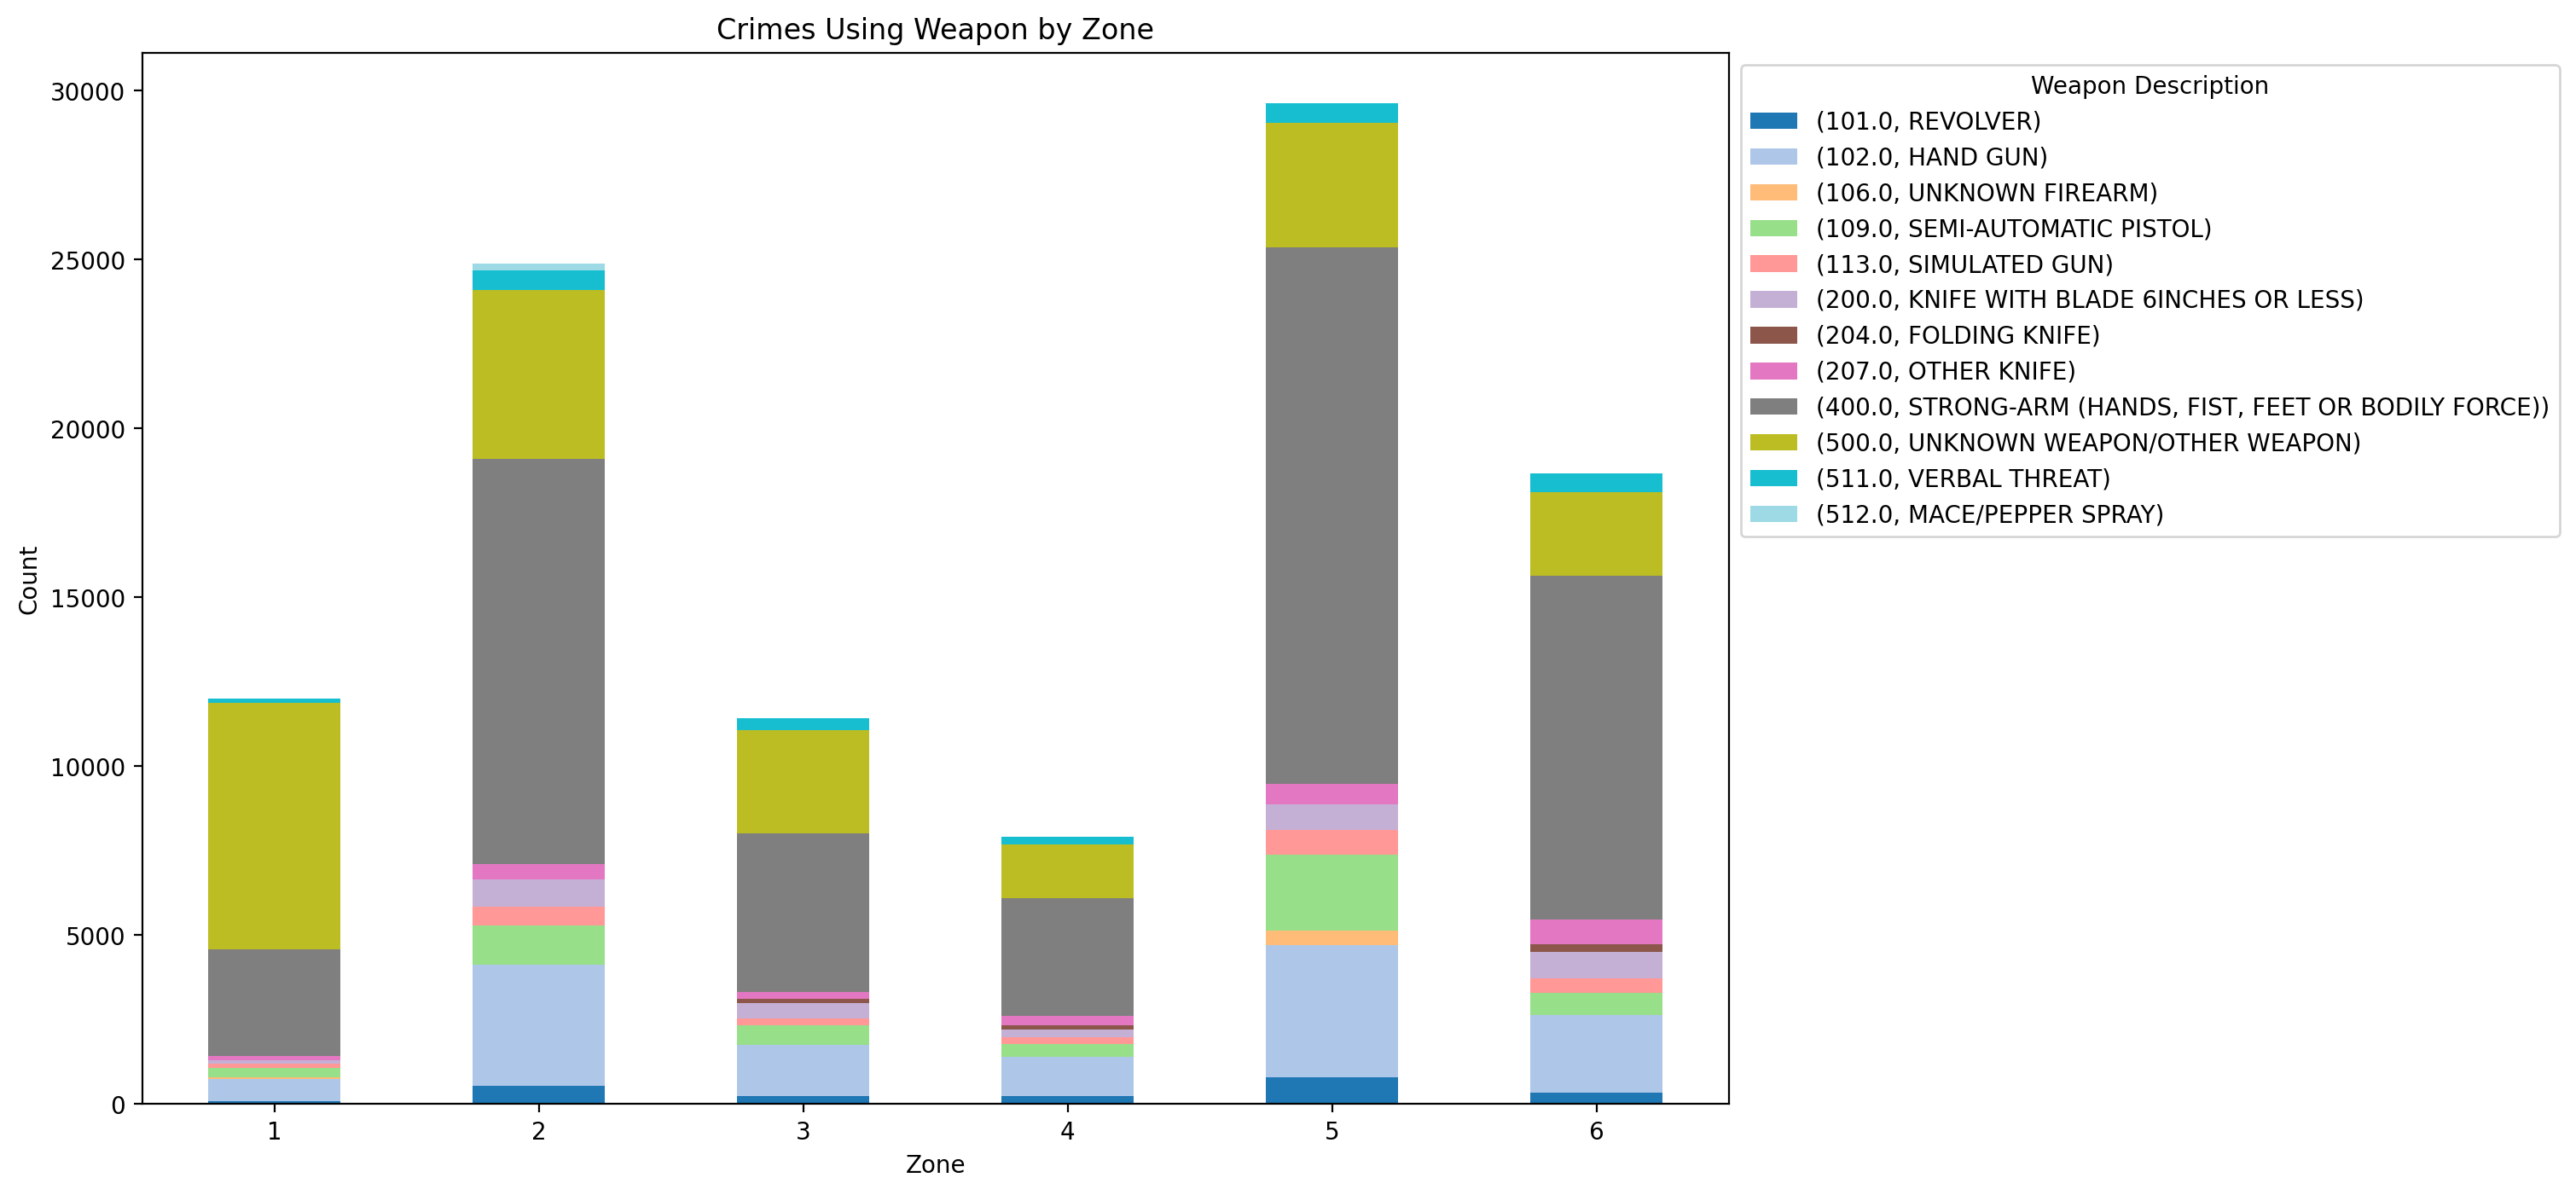

In [83]:
weapon_counts = crime.groupby(['Zone', 'Weapon Used Cd','Weapon Desc']).size().reset_index(name='count')

#There are plenty of weapon descriptions and we are running into
# an issue that it might clutter our chart. Let's specify the top 10

def top_n_items(df, n=10, column='count'):
    return df.sort_values(by=column, ascending=False).head(n)


top_weapons = weapon_counts.groupby('Zone').apply(top_n_items).reset_index(drop=True)

top_weapons_pivot = weapon_counts.pivot_table(index=['Zone'], columns = ['Weapon Used Cd',"Weapon Desc"], values = 'count', aggfunc='sum', fill_value=0)
top_weapons_pivot = top_weapons_pivot.apply(lambda x: x.nlargest(10), axis=1)

plt.figure(figsize=(12,8))
top_weapons_pivot.plot(kind='bar', stacked = True, cmap='tab20', ax=plt.gca())

plt.title('Crimes Using Weapon by Zone')
plt.xlabel('Zone')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Weapon Description', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

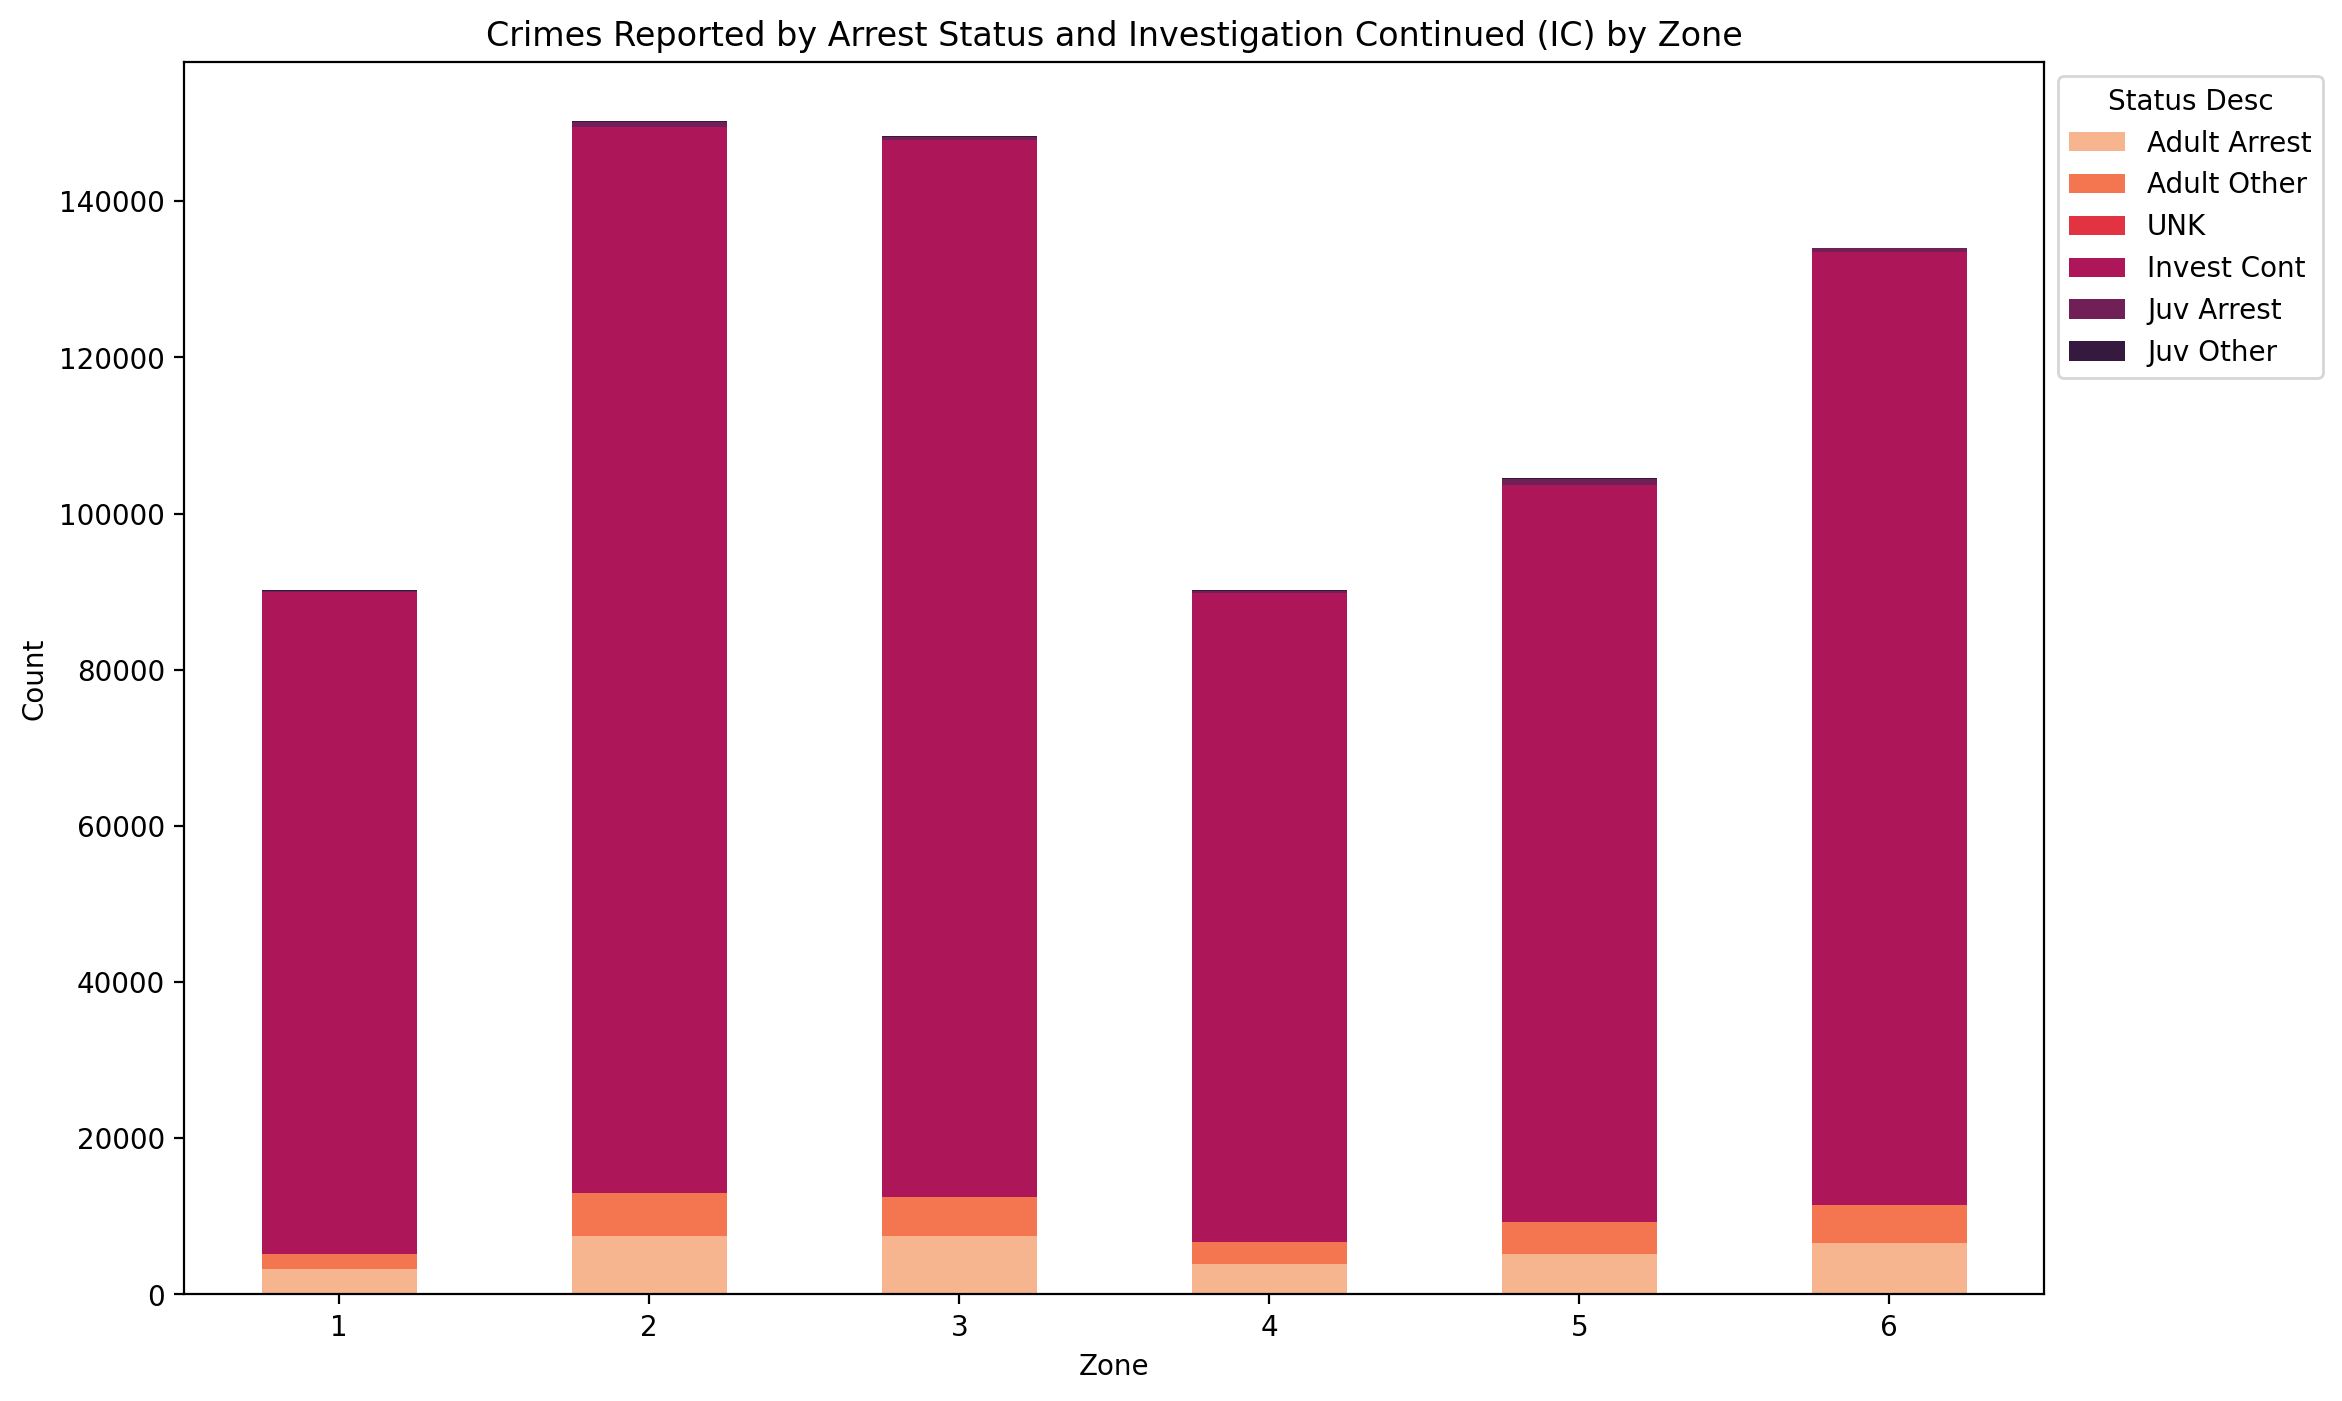

In [84]:
#1.6 How many Arrests are made, how many Investigations are continued
# Count incidents per zone and status
crime_counts = crime.groupby(['Zone', 'Status']).size().unstack(fill_value=0)

# Plotting stacked bar chart
plt.figure(figsize=(12, 8))
crime_counts.plot(kind='bar', stacked=True,  ax=plt.gca())
plt.title('Crimes Reported by Arrest Status and Investigation Continued (IC) by Zone')
plt.xlabel('Zone')
plt.ylabel('Count')

handles, labels = plt.gca().get_legend_handles_labels()
status_desc_mapping = crime[['Status', 'Status Desc']].drop_duplicates().set_index('Status')['Status Desc'].to_dict()
labels = [status_desc_mapping.get(status, status) for status in labels]
plt.legend(handles, labels, title='Status Desc', bbox_to_anchor=(1, 1), loc='upper left')

plt.xticks(rotation=0)
plt.show()

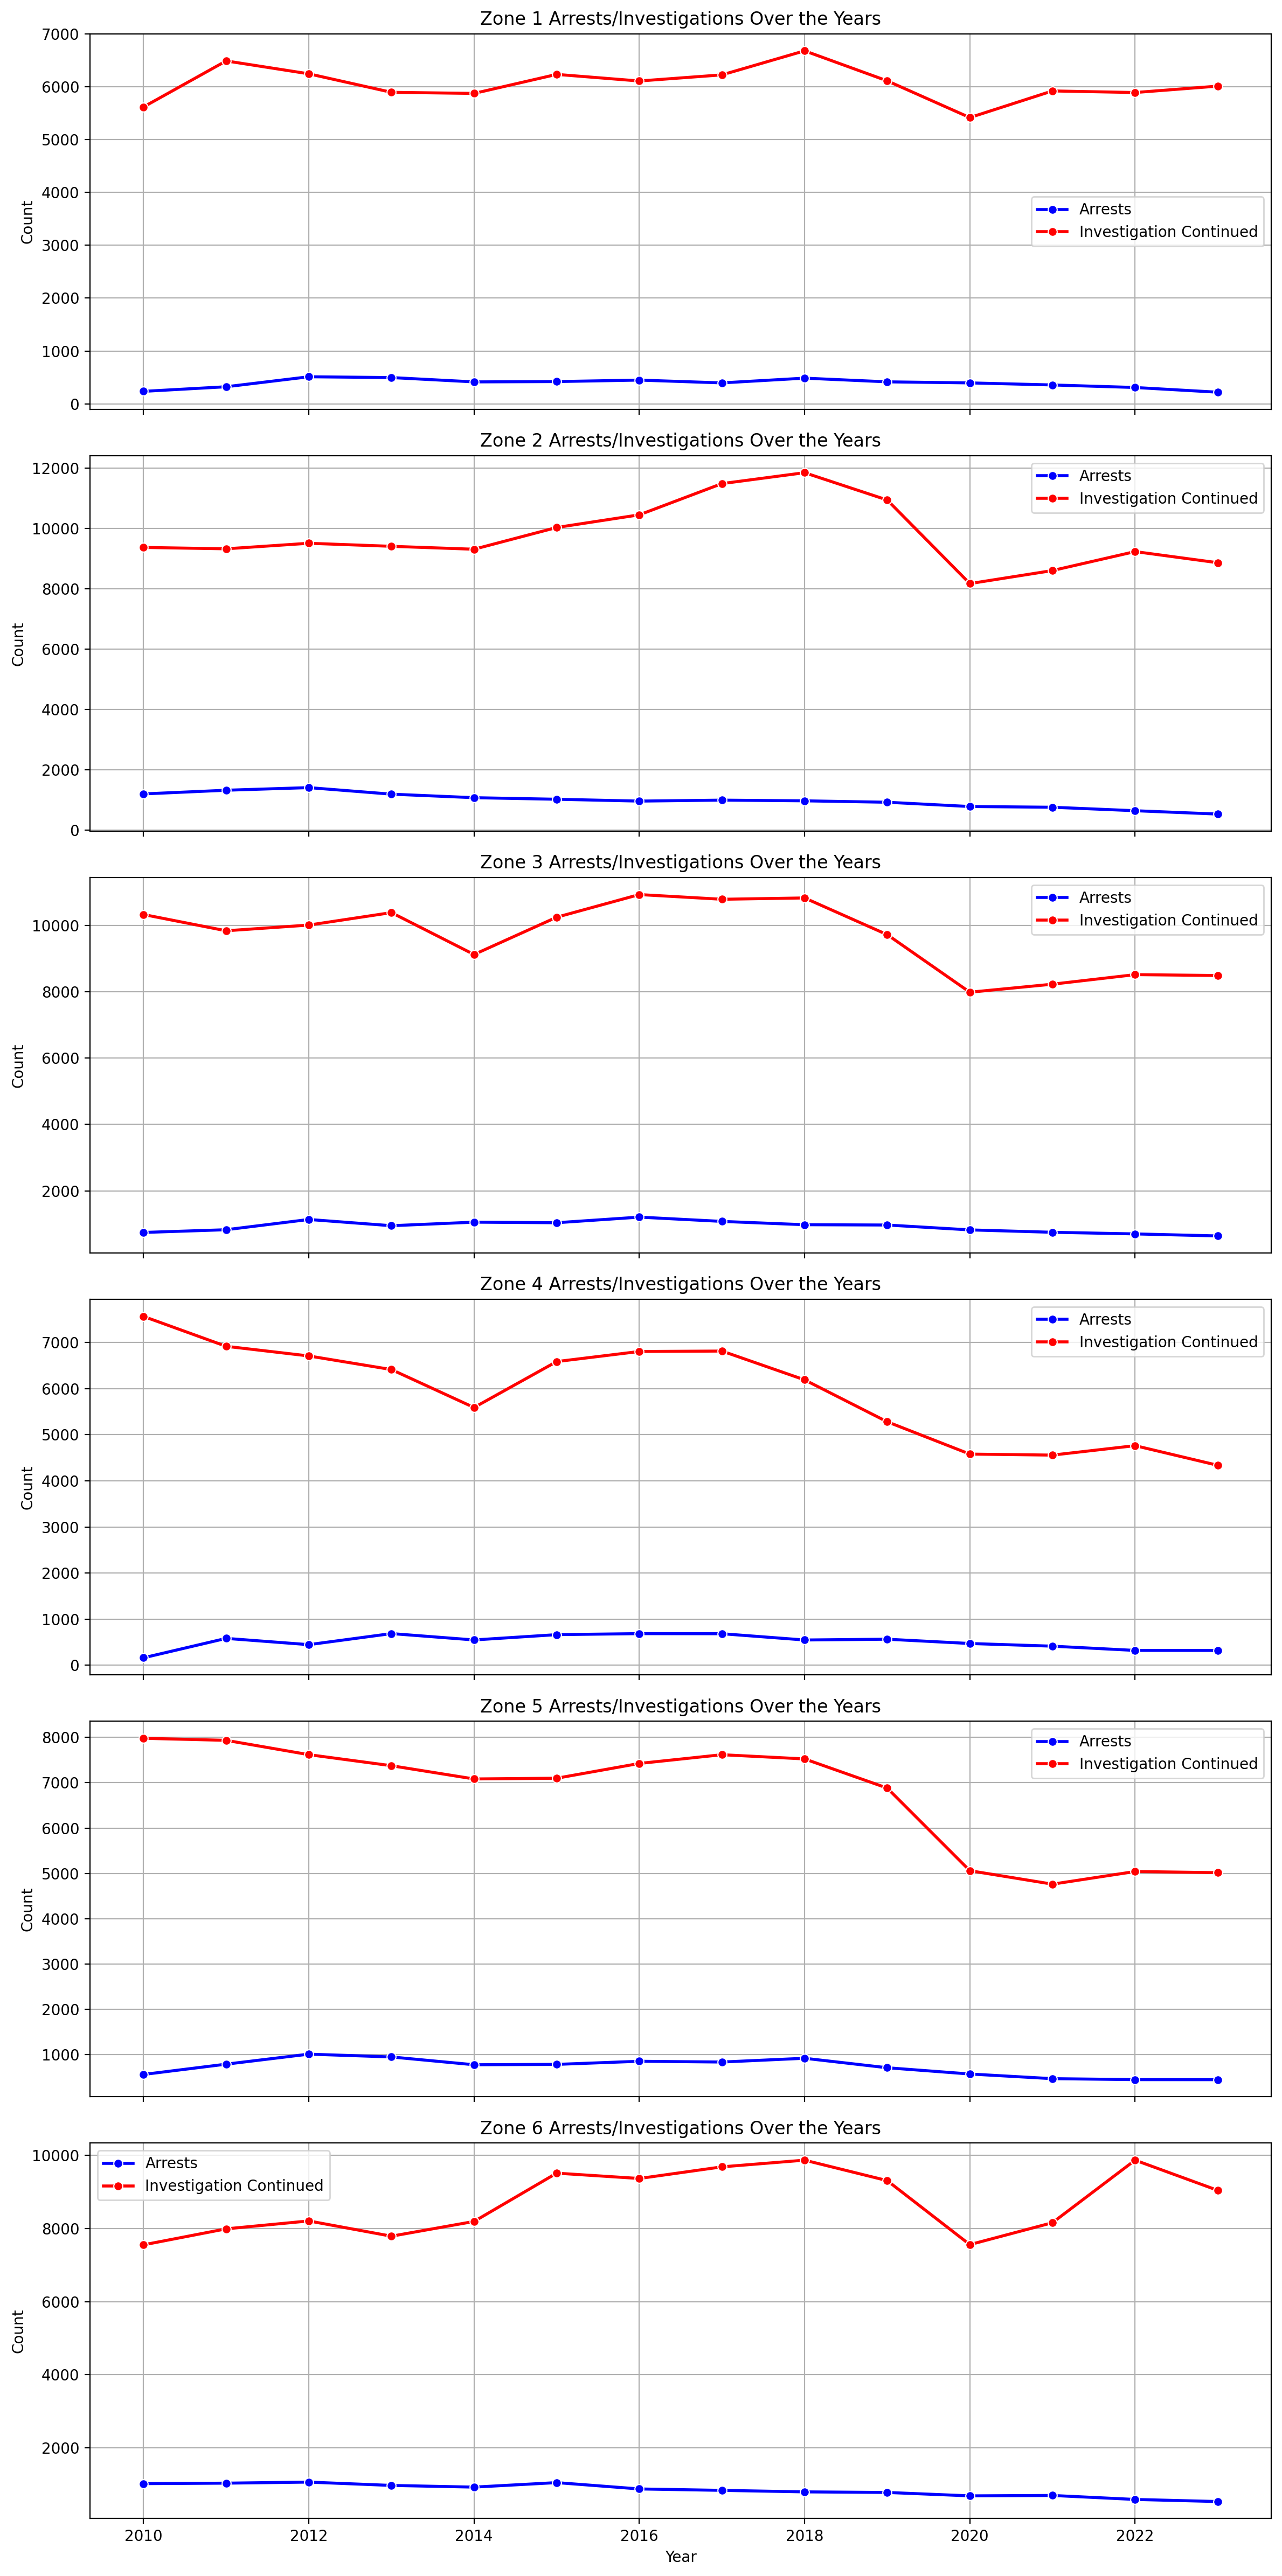

In [85]:
# How has LAPD performed over the years with their arrests, by zone
# compared to investigations continued

def zones_arrest_rate(crime):

    arrest_data = crime[crime['Status'].isin((['AA', 'AO', 'JA', 'JO']))]
    arrest_counts = arrest_data.groupby(['Zone','year']).size().reset_index(name='Arrests')
    
    investigation_data = crime[crime['Status'] == 'IC']
    investigation_counts = investigation_data.groupby(['Zone','year']).size().reset_index(name='Investigations')

    merged_data = pd.merge(arrest_counts, investigation_counts, on=['Zone','year'], how='outer').fillna(0)

    #create grid of plots for each zone
    zones= merged_data['Zone'].unique()
    n_zones= len(zones)

    fig, axes =plt.subplots(n_zones,1,figsize=(12,n_zones *4),sharex=True)

    for i, zone in enumerate(zones):
        zone_data = merged_data[merged_data['Zone']== zone]
        sns.lineplot(data=zone_data, x='year', y='Arrests', marker='o', color='b', linewidth =2, label = 'Arrests', ax=axes[i])
        sns.lineplot(data = zone_data, x='year', y='Investigations', marker = 'o', color='r', linewidth=2, label='Investigation Continued', ax=axes[i])
    
        
        axes[i].set_title(f'Zone {zone} Arrests/Investigations Over the Years')
        axes[i].set_xlabel('Year')
        axes[i].set_ylabel('Count')
        axes[i].legend()
        axes[i].grid(True)   

    plt.tight_layout()
    plt.show()
    
zones_arrest_rate(crime)

Zone 1 Arrest Rate by Victim Descent:
 - Victim Descent: A, Arrest Rate: 5.67%
 - Victim Descent: B, Arrest Rate: 6.63%
 - Victim Descent: H, Arrest Rate: 7.11%
 - Victim Descent: O, Arrest Rate: 5.86%
 - Victim Descent: W, Arrest Rate: 5.76%
Total Arrest Rate for Zone 1: 6.03%



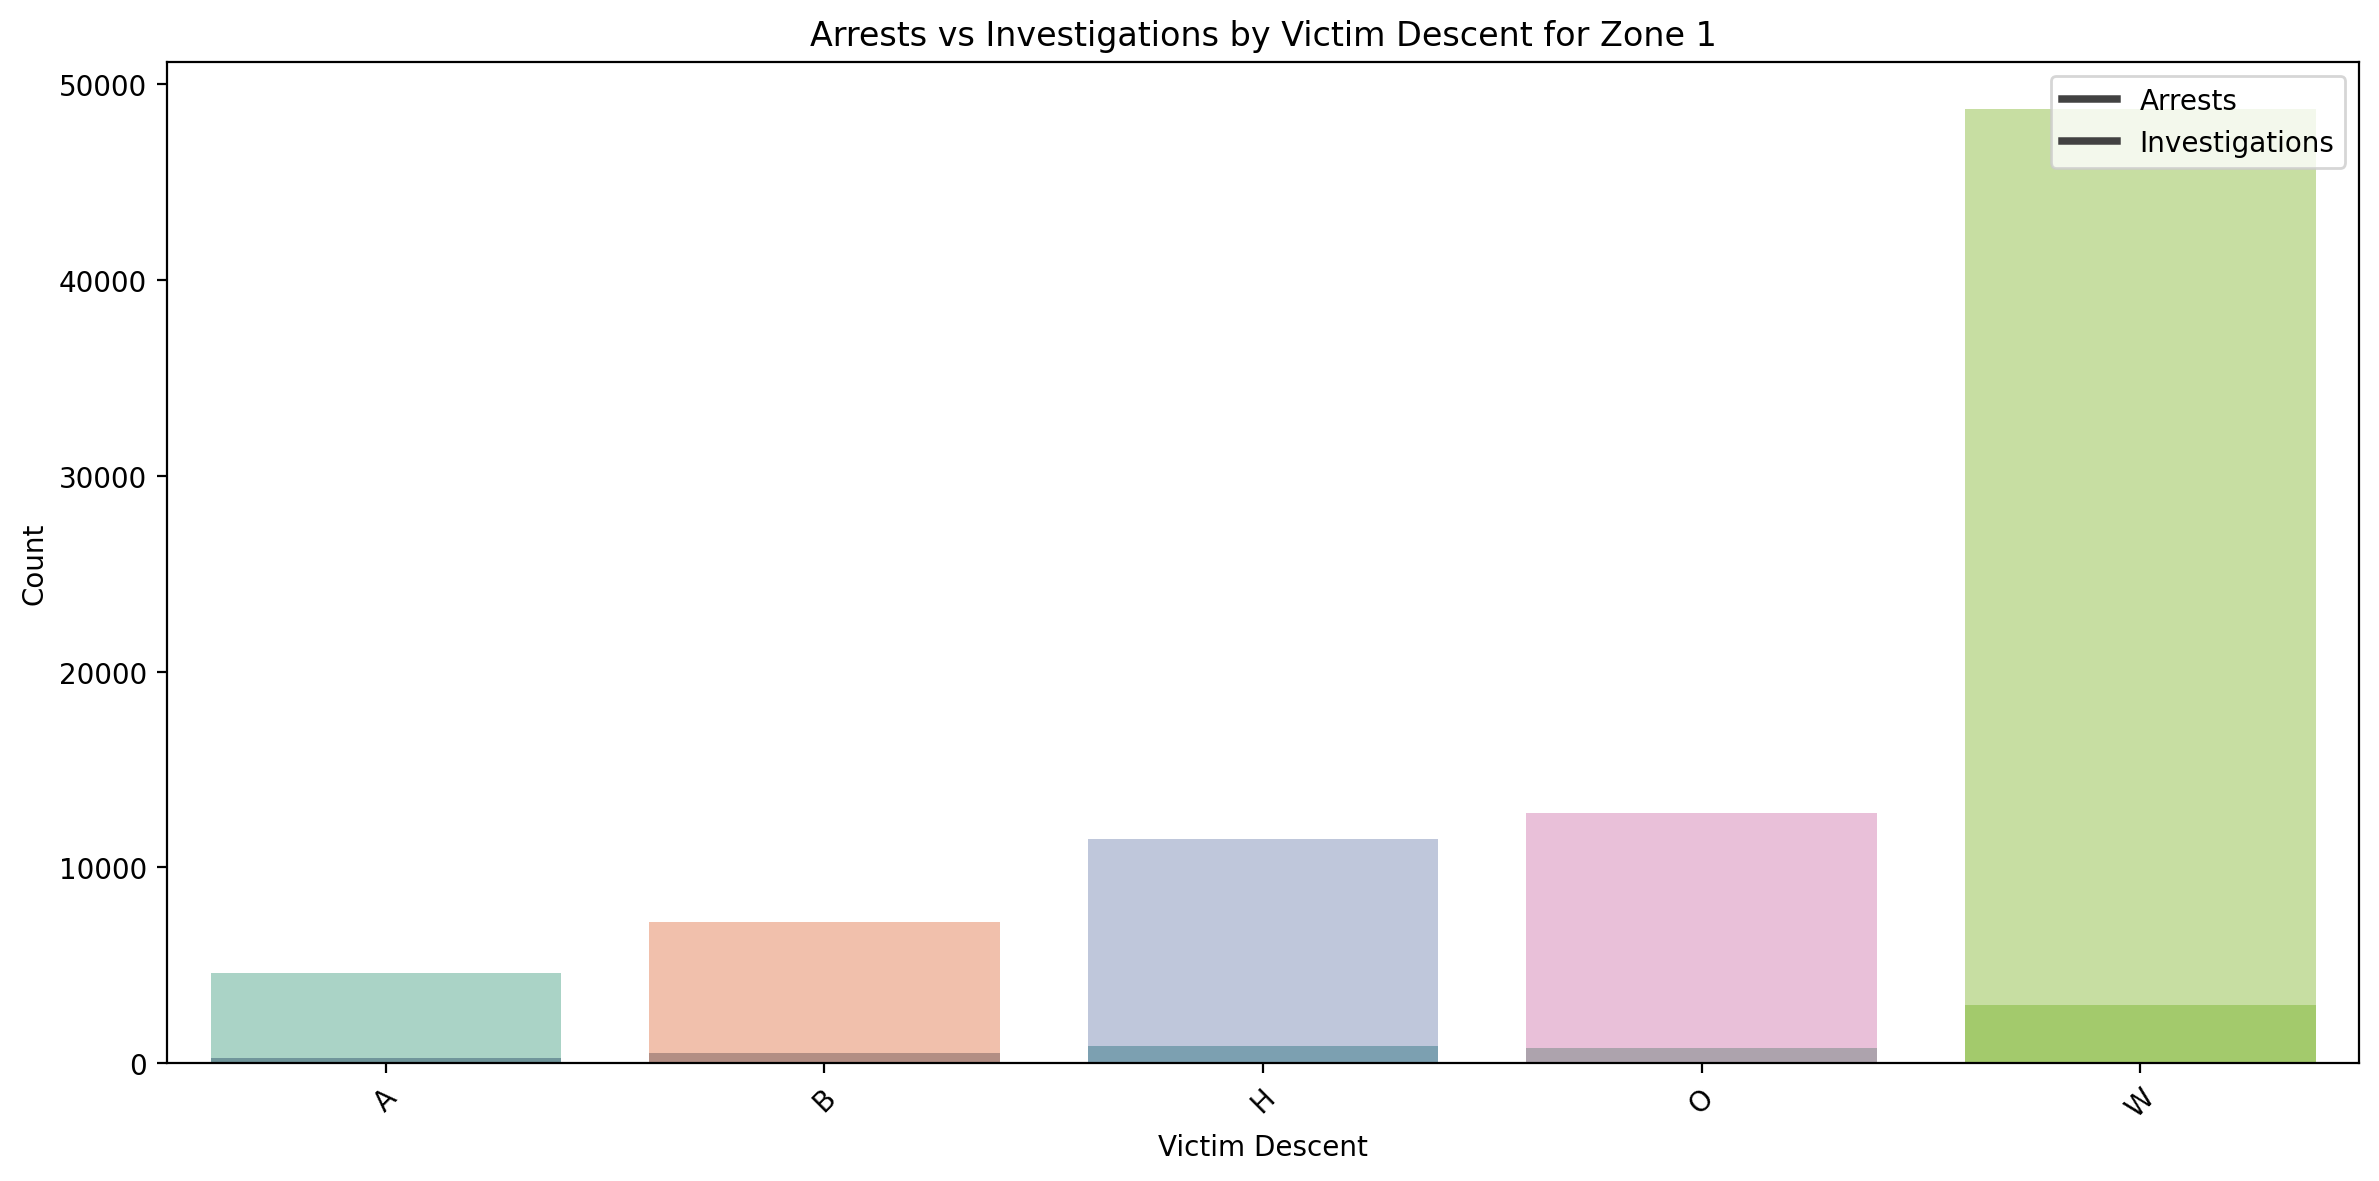

Zone 2 Arrest Rate by Victim Descent:
 - Victim Descent: A, Arrest Rate: 8.43%
 - Victim Descent: B, Arrest Rate: 10.28%
 - Victim Descent: H, Arrest Rate: 10.62%
 - Victim Descent: O, Arrest Rate: 8.24%
 - Victim Descent: W, Arrest Rate: 7.53%
Total Arrest Rate for Zone 2: 9.14%



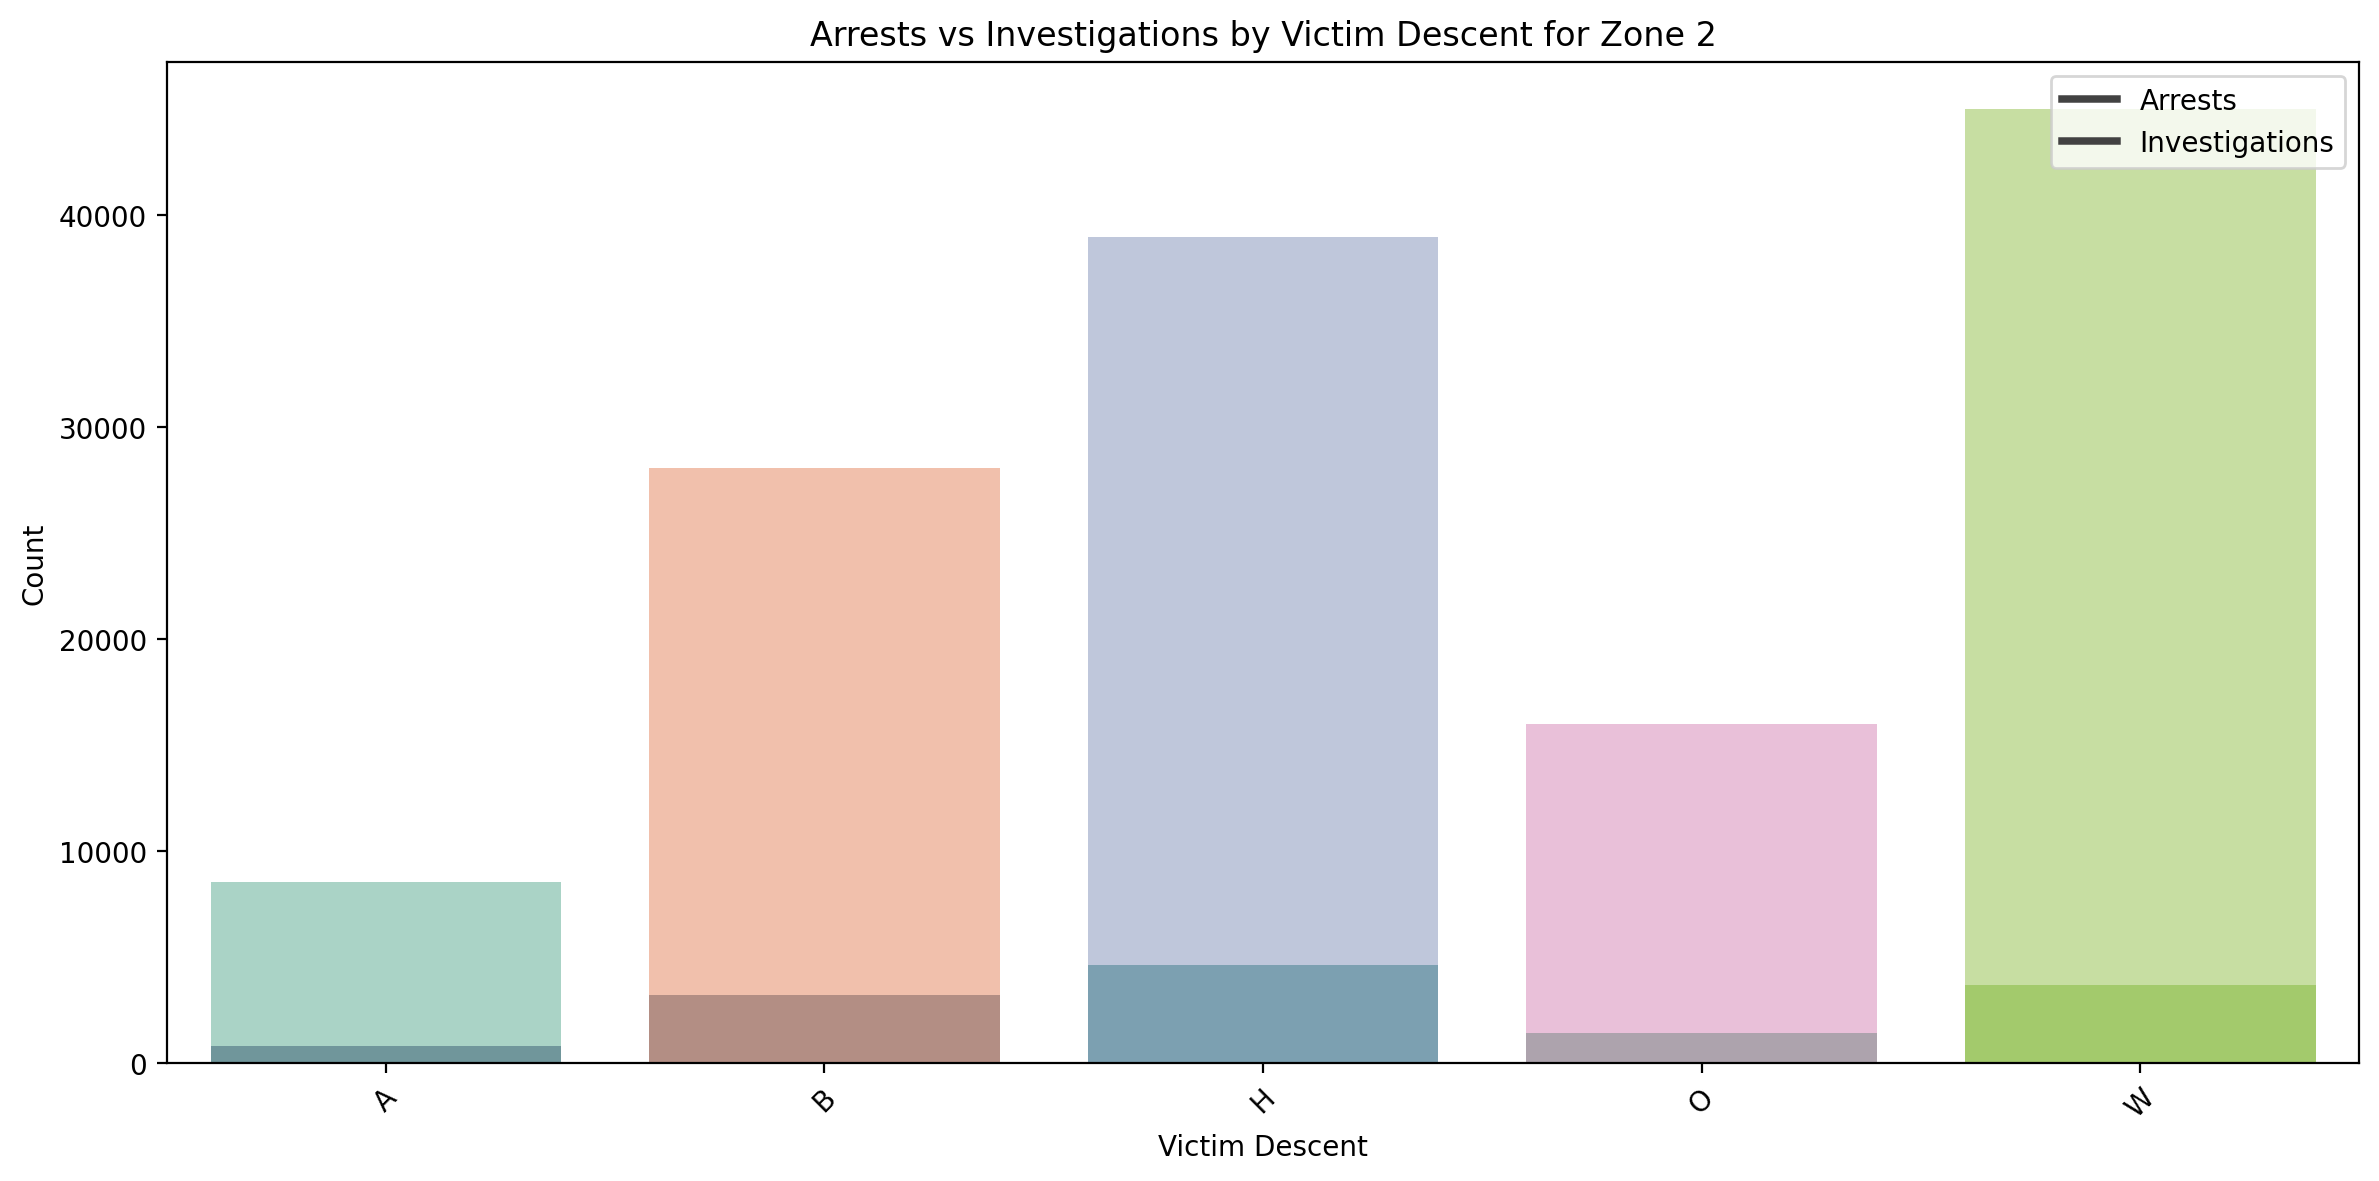

Zone 3 Arrest Rate by Victim Descent:
 - Victim Descent: A, Arrest Rate: 7.39%
 - Victim Descent: B, Arrest Rate: 9.18%
 - Victim Descent: H, Arrest Rate: 10.91%
 - Victim Descent: O, Arrest Rate: 8.12%
 - Victim Descent: W, Arrest Rate: 7.62%
Total Arrest Rate for Zone 3: 8.69%



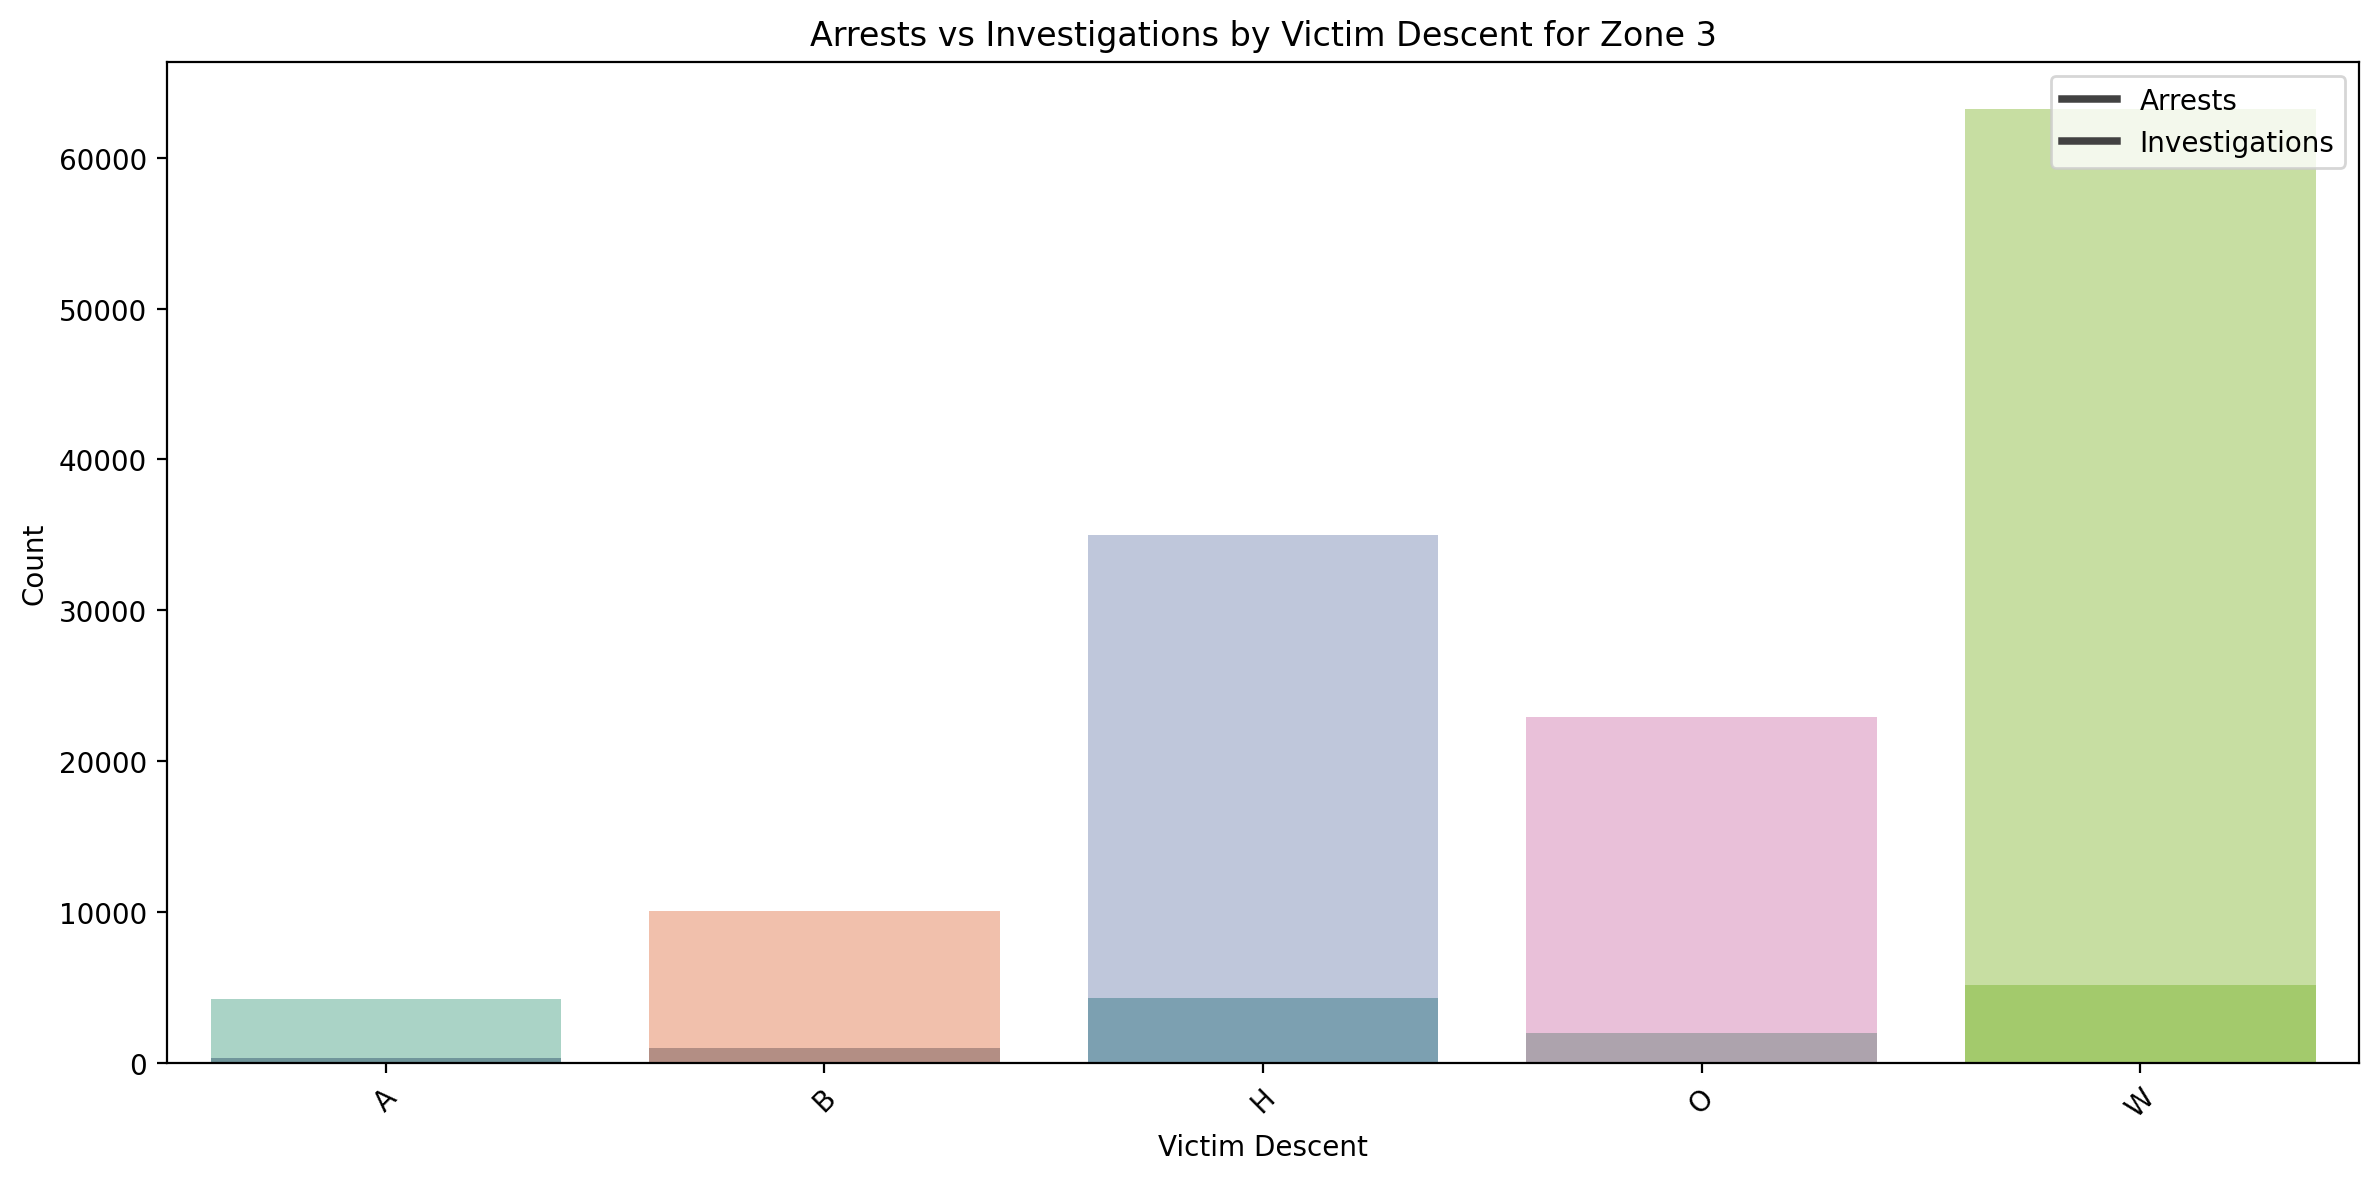

Zone 4 Arrest Rate by Victim Descent:
 - Victim Descent: A, Arrest Rate: 6.92%
 - Victim Descent: B, Arrest Rate: 8.81%
 - Victim Descent: H, Arrest Rate: 8.44%
 - Victim Descent: O, Arrest Rate: 7.44%
 - Victim Descent: W, Arrest Rate: 7.11%
Total Arrest Rate for Zone 4: 7.88%



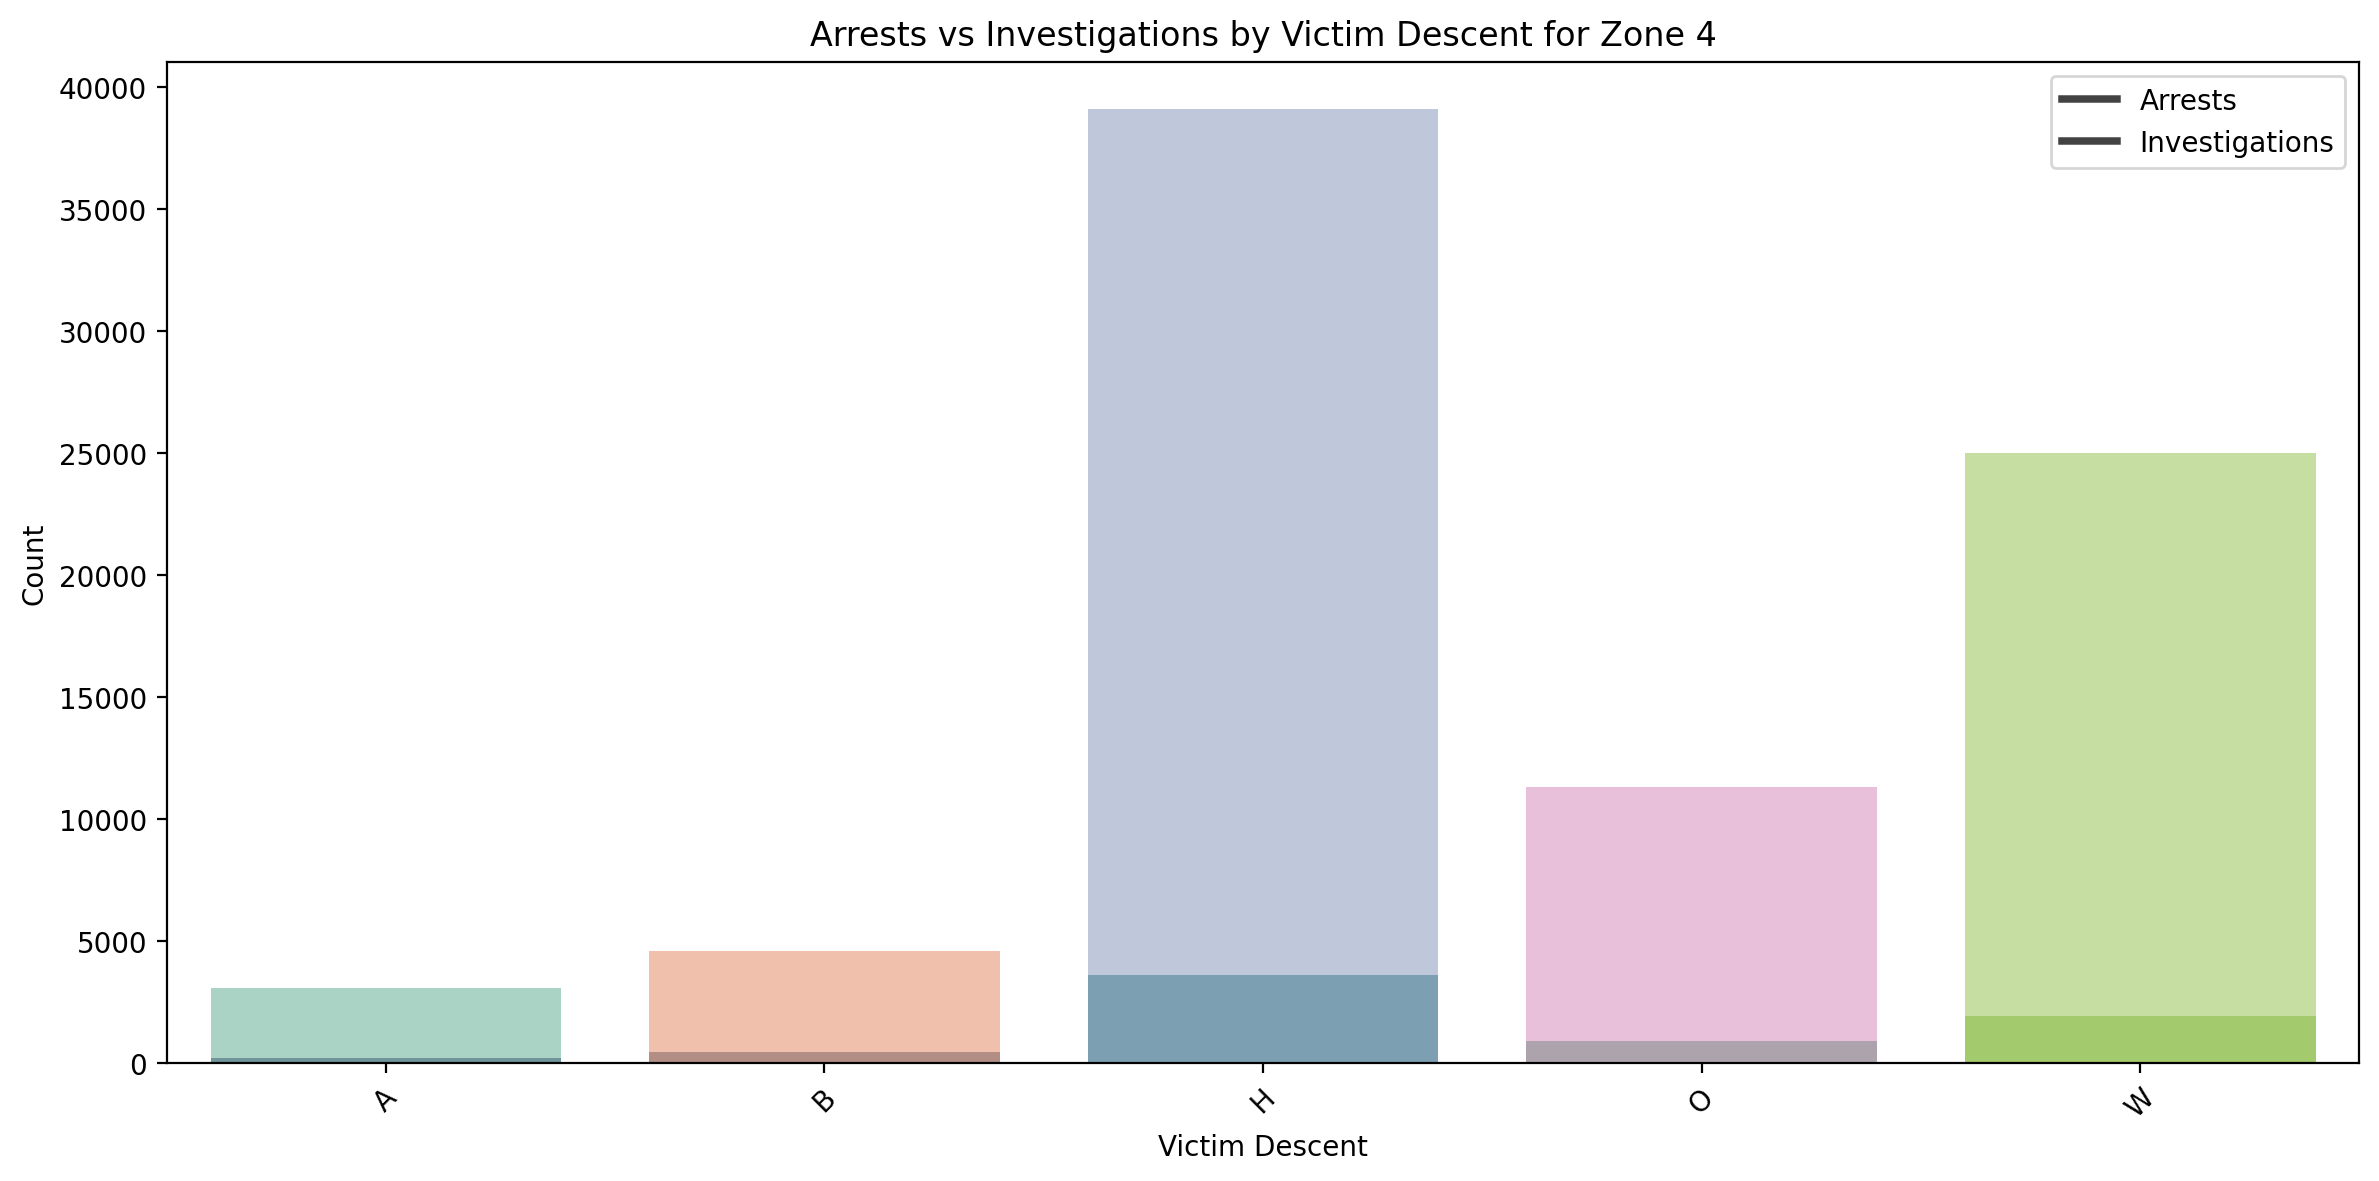

Zone 5 Arrest Rate by Victim Descent:
 - Victim Descent: A, Arrest Rate: 8.71%
 - Victim Descent: B, Arrest Rate: 10.12%
 - Victim Descent: H, Arrest Rate: 9.68%
 - Victim Descent: O, Arrest Rate: 10.18%
 - Victim Descent: W, Arrest Rate: 6.98%
Total Arrest Rate for Zone 5: 9.72%



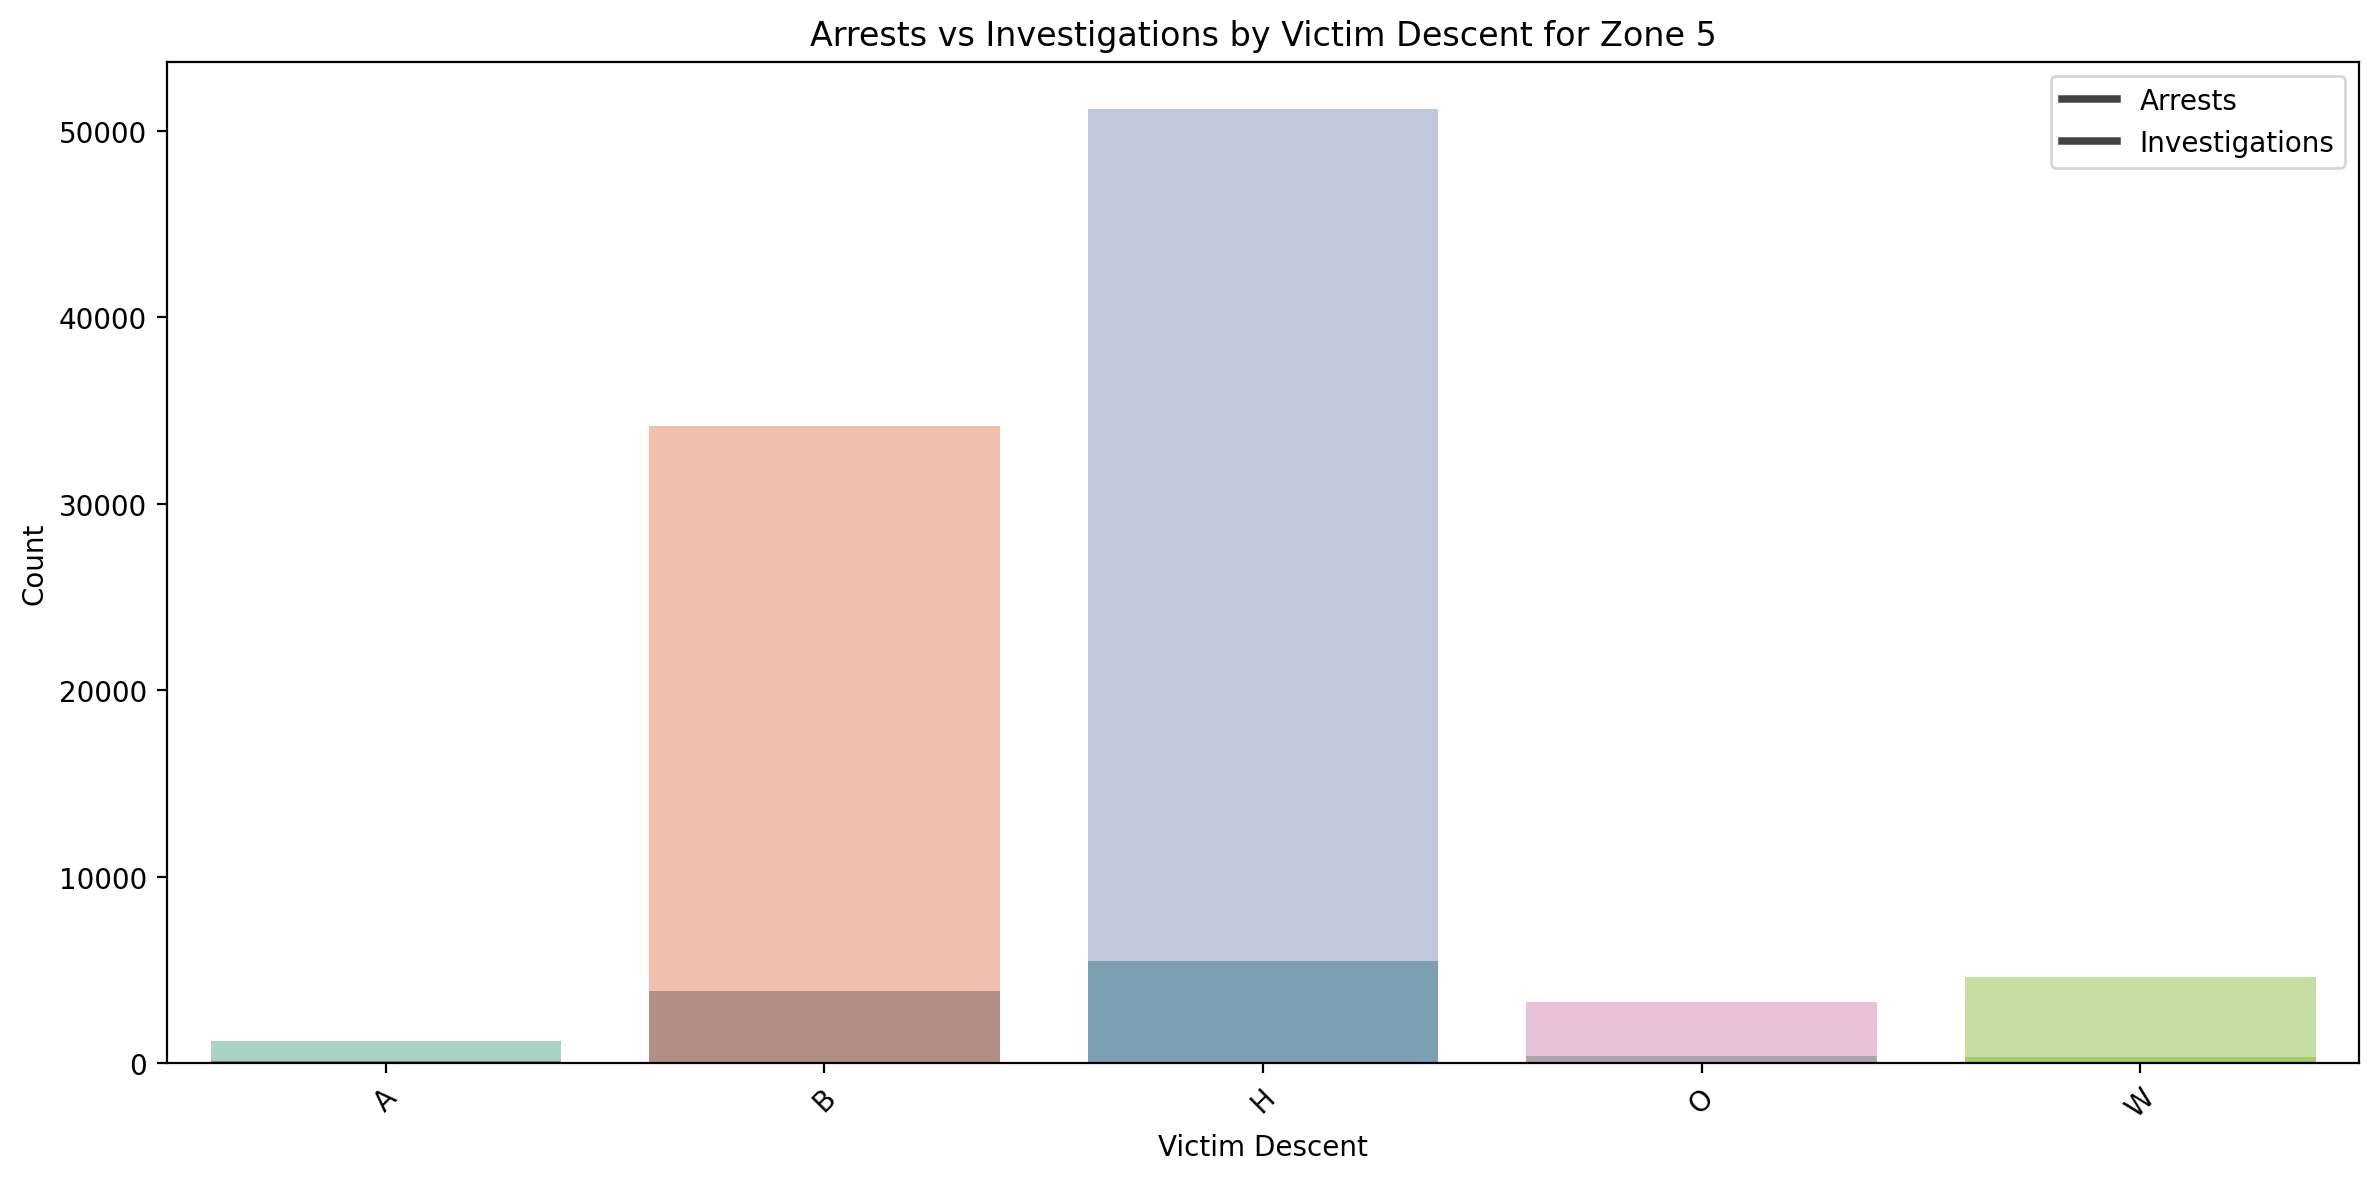

Zone 6 Arrest Rate by Victim Descent:
 - Victim Descent: A, Arrest Rate: 7.39%
 - Victim Descent: B, Arrest Rate: 9.04%
 - Victim Descent: H, Arrest Rate: 10.69%
 - Victim Descent: O, Arrest Rate: 7.47%
 - Victim Descent: W, Arrest Rate: 7.39%
Total Arrest Rate for Zone 6: 8.89%



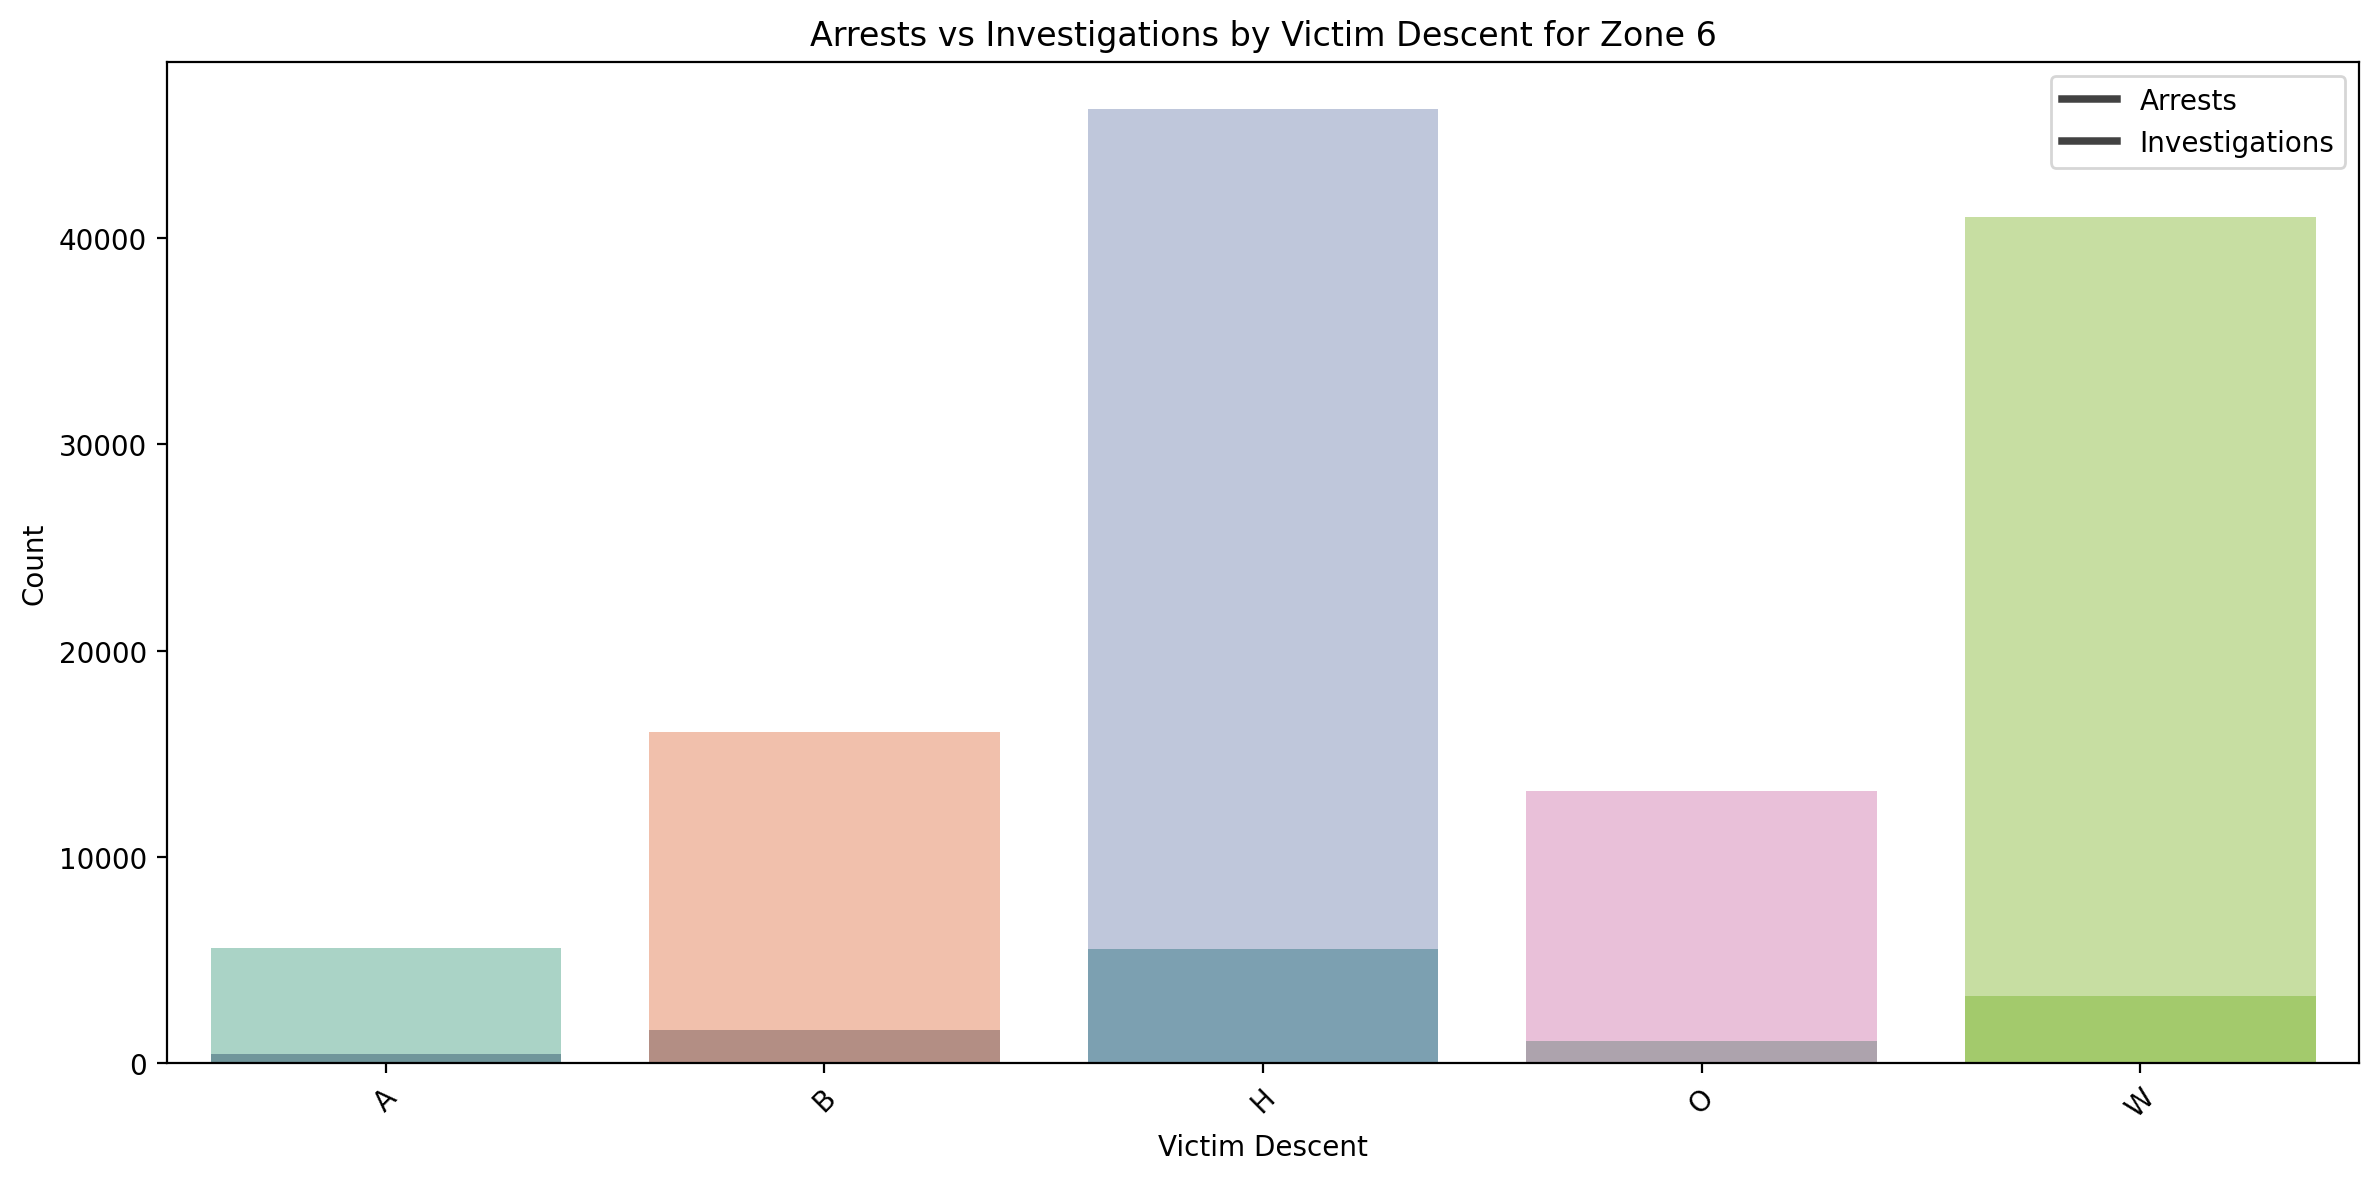

In [94]:
def zones_arrest_rate_by_race(crime):
    # Filter data for arrests and investigations
    arrest_data = crime[crime['Status'].isin(['AA', 'AO', 'JA', 'JO'])]
    arrest_counts = arrest_data.groupby(['Zone', 'Vict Descent']).size().reset_index(name='Arrests')
    
    investigation_data = crime[crime['Status'] == 'IC']
    investigation_counts = investigation_data.groupby(['Zone', 'Vict Descent']).size().reset_index(name='Investigations')

    # Merge data to get counts for each zone and victim descent
    merged_data = pd.merge(arrest_counts, investigation_counts, on=['Zone', 'Vict Descent'], how='outer').fillna(0)

    # Calculate arrest rate and plot bar charts for each zone
    zones = merged_data['Zone'].unique()
    n_zones = len(zones)
    
    for i, zone in enumerate(zones):
        zone_data = merged_data[merged_data['Zone'] == zone]
        
        # Plot bar chart for counts by victim descent and zone
        fig, ax = plt.subplots(figsize=(12, 6))
        
        sns.barplot(data=zone_data, x='Vict Descent', y='Arrests', palette='viridis', alpha=0.8, ax=ax)
        sns.barplot(data=zone_data, x='Vict Descent', y='Investigations', palette='Set2', alpha=0.6, estimator=sum, errcolor=None, ax=ax)
        
        ax.set_title(f'Arrests vs Investigations by Victim Descent for Zone {zone}')
        ax.set_xlabel('Victim Descent')
        ax.set_ylabel('Count')
        ax.legend(['Arrests', 'Investigations'], loc='upper right')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels
        
        # Calculate and print arrest rates
        total_arrests = zone_data['Arrests'].sum()
        total_investigations = zone_data['Investigations'].sum()
        total_crimes = total_arrests + total_investigations
        arrest_rate = total_arrests / total_crimes if total_crimes > 0 else 0
        
        print(f"Zone {zone} Arrest Rate by Victim Descent:")
        for idx, row in zone_data.iterrows():
            victim_descent = row['Vict Descent']
            arrests = row['Arrests']
            investigations = row['Investigations']
            arrest_rate_victim = arrests / (arrests + investigations) if (arrests + investigations) > 0 else 0
            print(f" - Victim Descent: {victim_descent}, Arrest Rate: {arrest_rate_victim:.2%}")

        print(f"Total Arrest Rate for Zone {zone}: {arrest_rate:.2%}")
        print()
        
        plt.tight_layout()
        plt.show()


zones_arrest_rate_by_race(crime)

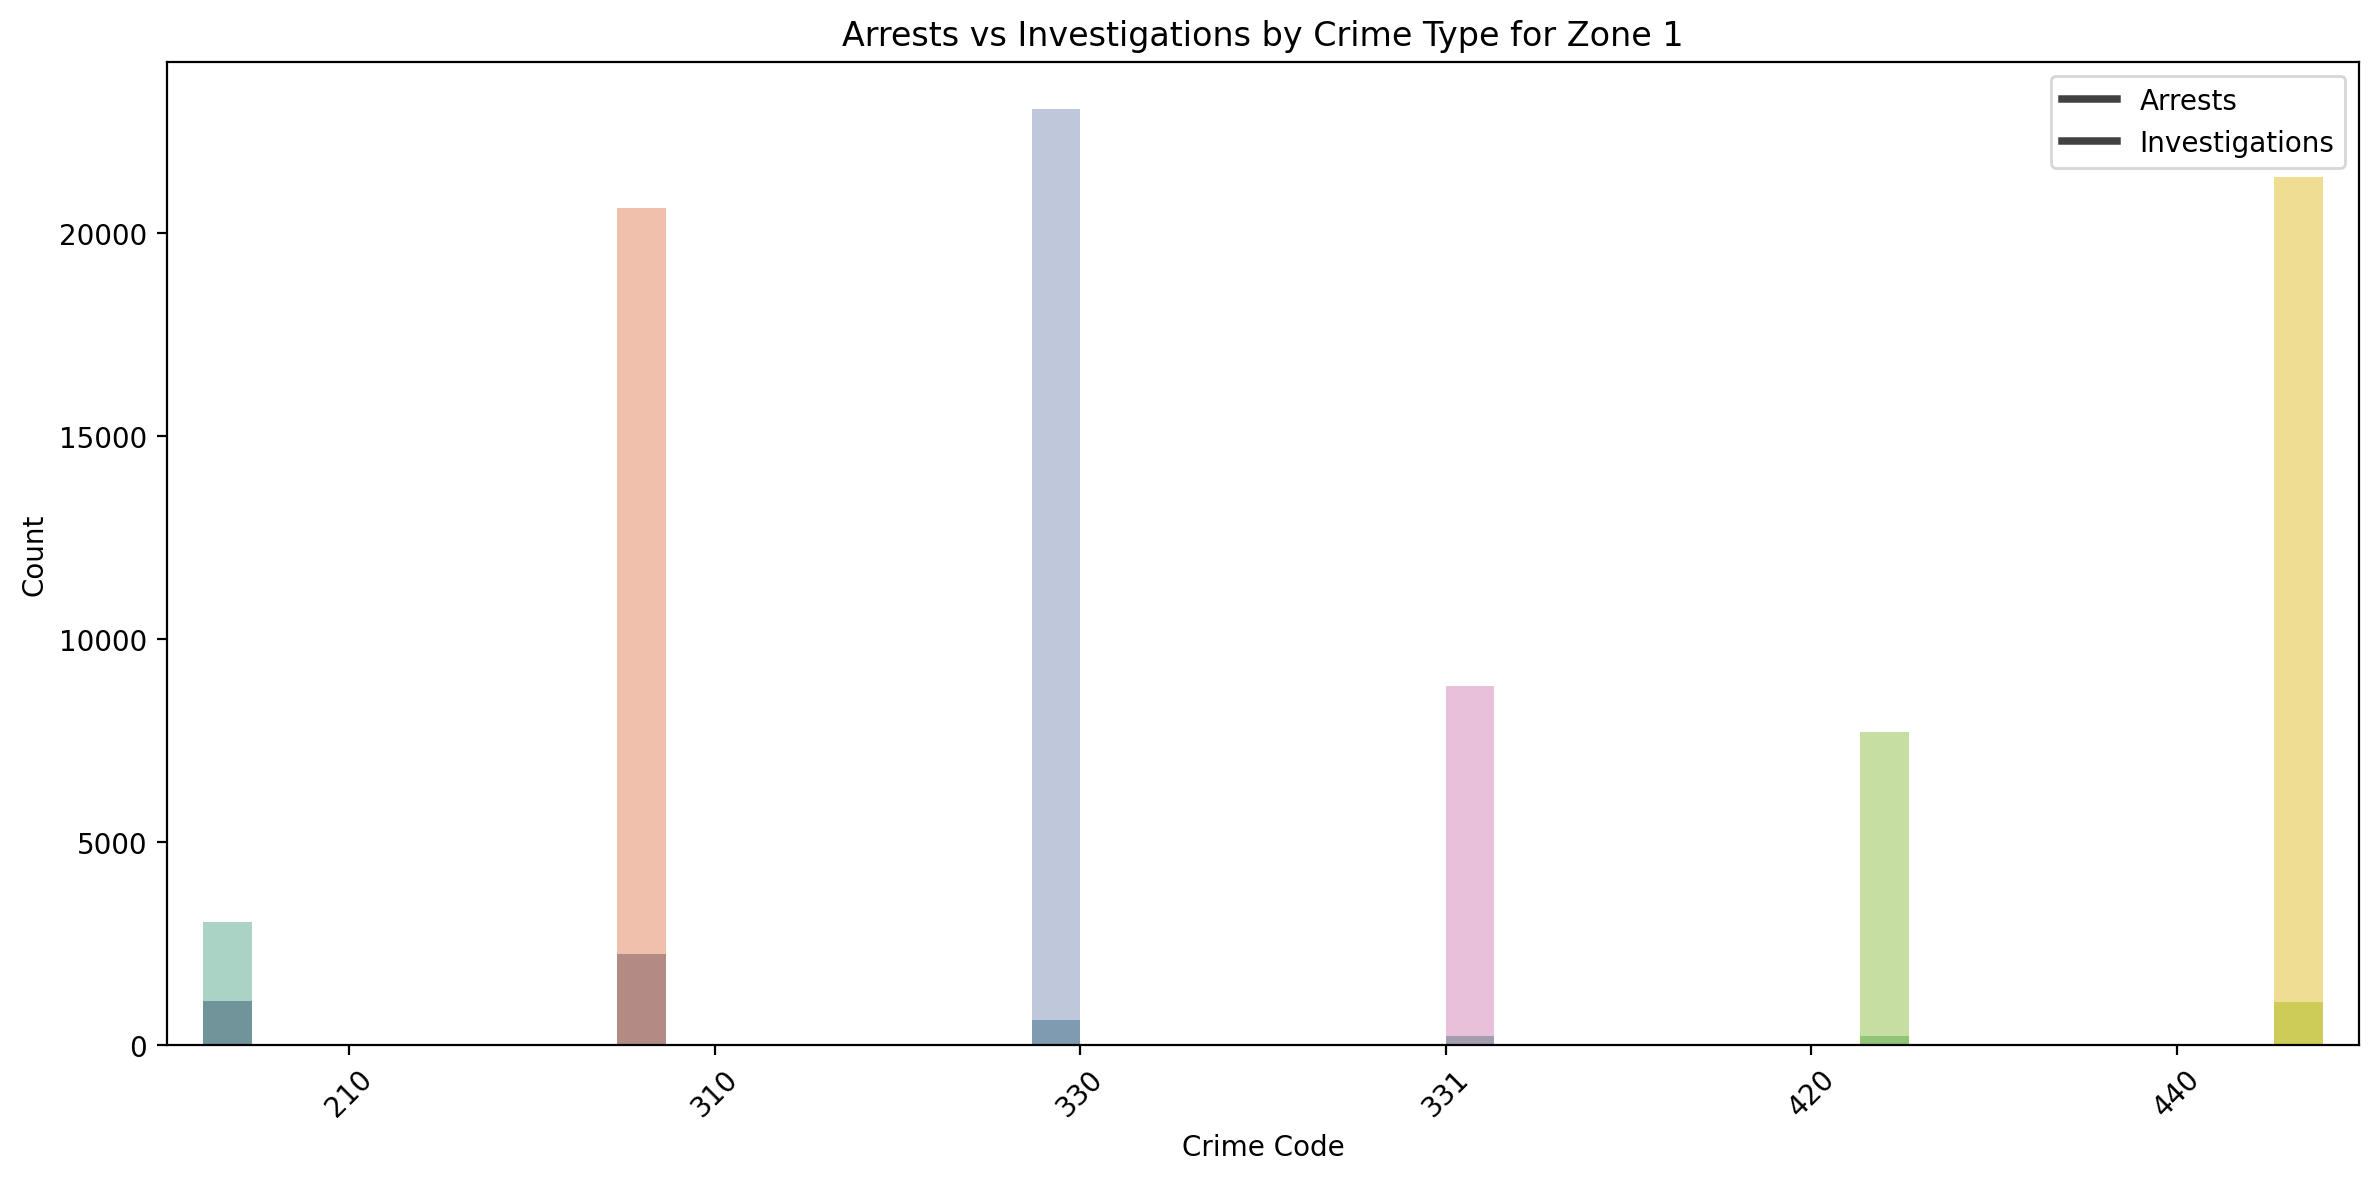

Zone 1 Arrest Rate by Crime Type:
 - Crime Code: 210, Crime Description: ROBBERY, Arrest Rate: 26.25%
 - Crime Code: 310, Crime Description: BURGLARY, Arrest Rate: 9.79%
 - Crime Code: 330, Crime Description: BURGLARY FROM VEHICLE, Arrest Rate: 2.60%
 - Crime Code: 331, Crime Description: THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER), Arrest Rate: 2.39%
 - Crime Code: 420, Crime Description: THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER), Arrest Rate: 2.75%
 - Crime Code: 440, Crime Description: THEFT PLAIN - PETTY ($950 & UNDER), Arrest Rate: 4.73%



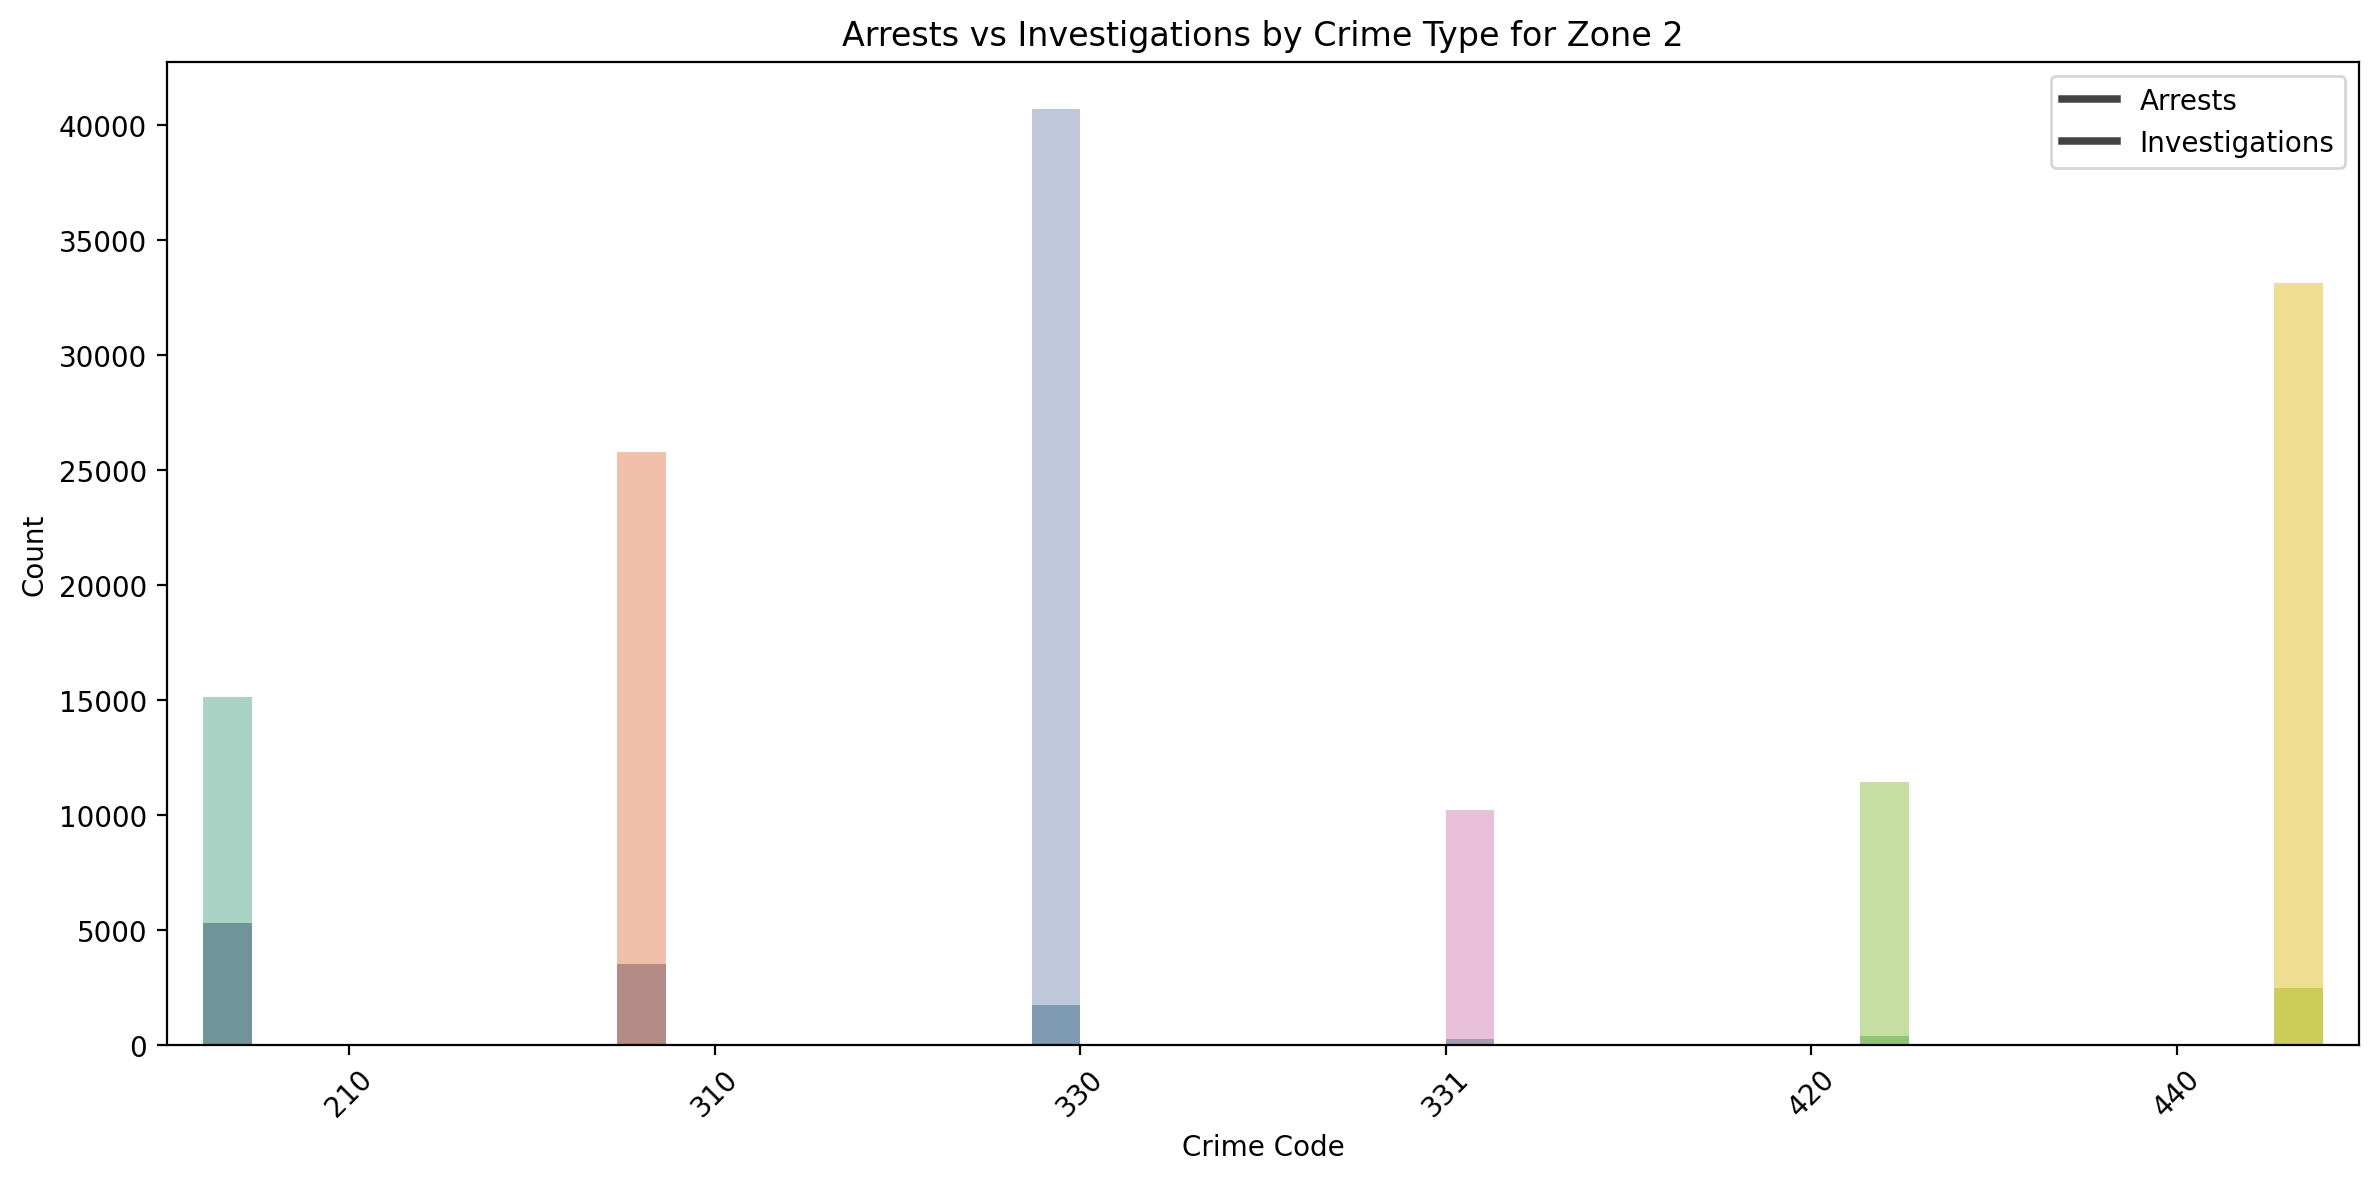

Zone 2 Arrest Rate by Crime Type:
 - Crime Code: 210, Crime Description: ROBBERY, Arrest Rate: 25.99%
 - Crime Code: 310, Crime Description: BURGLARY, Arrest Rate: 12.05%
 - Crime Code: 330, Crime Description: BURGLARY FROM VEHICLE, Arrest Rate: 4.14%
 - Crime Code: 331, Crime Description: THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER), Arrest Rate: 2.43%
 - Crime Code: 420, Crime Description: THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER), Arrest Rate: 3.24%
 - Crime Code: 440, Crime Description: THEFT PLAIN - PETTY ($950 & UNDER), Arrest Rate: 6.96%



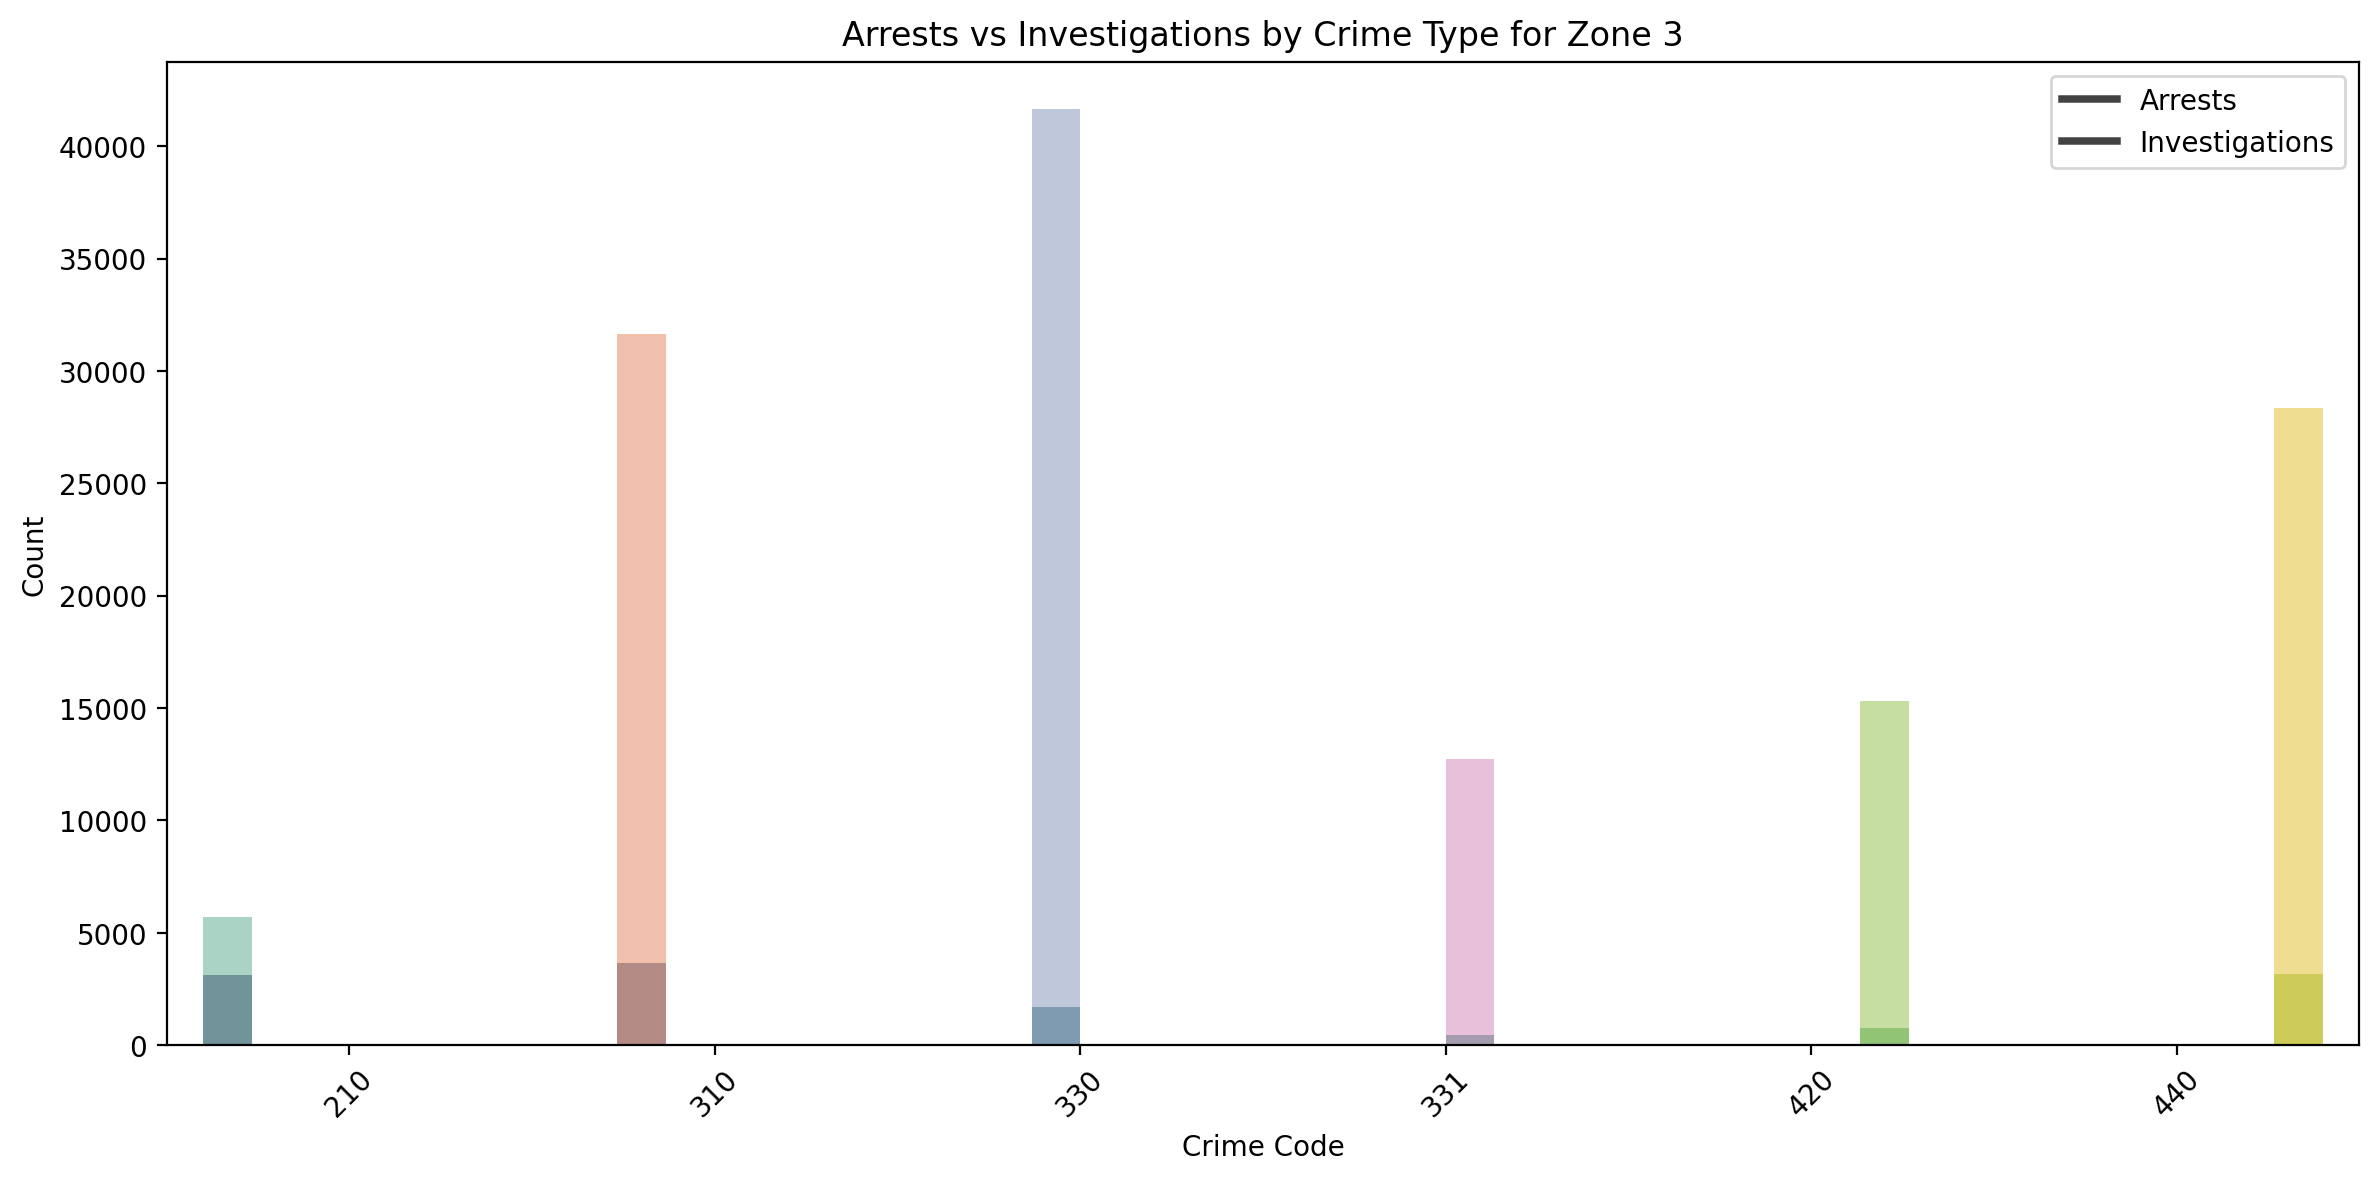

Zone 3 Arrest Rate by Crime Type:
 - Crime Code: 210, Crime Description: ROBBERY, Arrest Rate: 35.42%
 - Crime Code: 310, Crime Description: BURGLARY, Arrest Rate: 10.38%
 - Crime Code: 330, Crime Description: BURGLARY FROM VEHICLE, Arrest Rate: 3.91%
 - Crime Code: 331, Crime Description: THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER), Arrest Rate: 3.36%
 - Crime Code: 420, Crime Description: THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER), Arrest Rate: 4.83%
 - Crime Code: 440, Crime Description: THEFT PLAIN - PETTY ($950 & UNDER), Arrest Rate: 10.06%



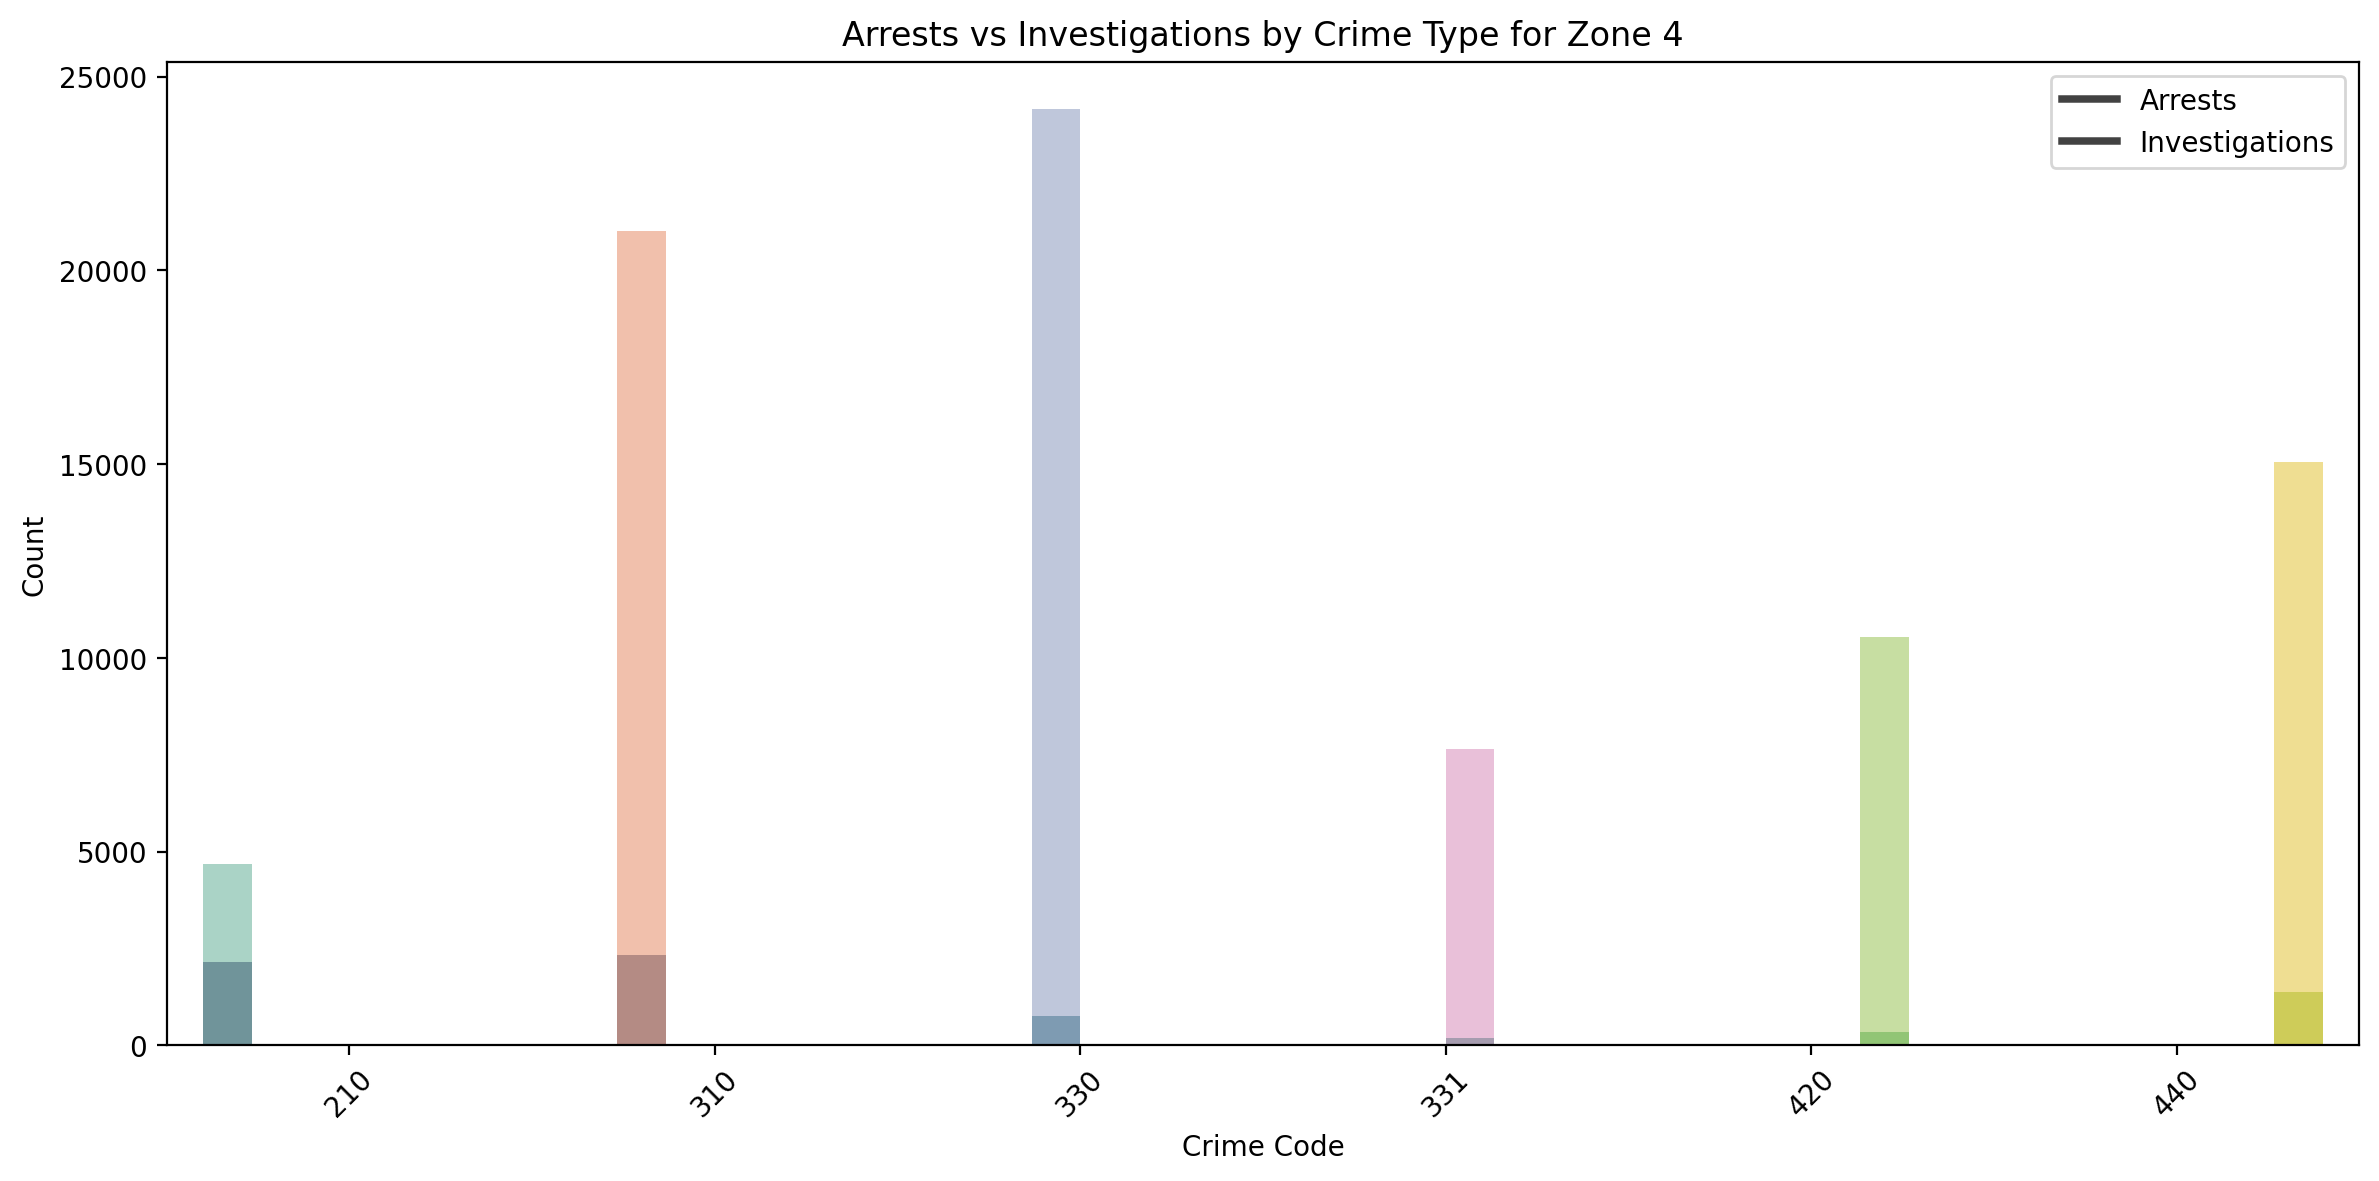

Zone 4 Arrest Rate by Crime Type:
 - Crime Code: 210, Crime Description: ROBBERY, Arrest Rate: 31.45%
 - Crime Code: 310, Crime Description: BURGLARY, Arrest Rate: 9.97%
 - Crime Code: 330, Crime Description: BURGLARY FROM VEHICLE, Arrest Rate: 3.04%
 - Crime Code: 331, Crime Description: THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER), Arrest Rate: 2.27%
 - Crime Code: 420, Crime Description: THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER), Arrest Rate: 3.07%
 - Crime Code: 440, Crime Description: THEFT PLAIN - PETTY ($950 & UNDER), Arrest Rate: 8.30%



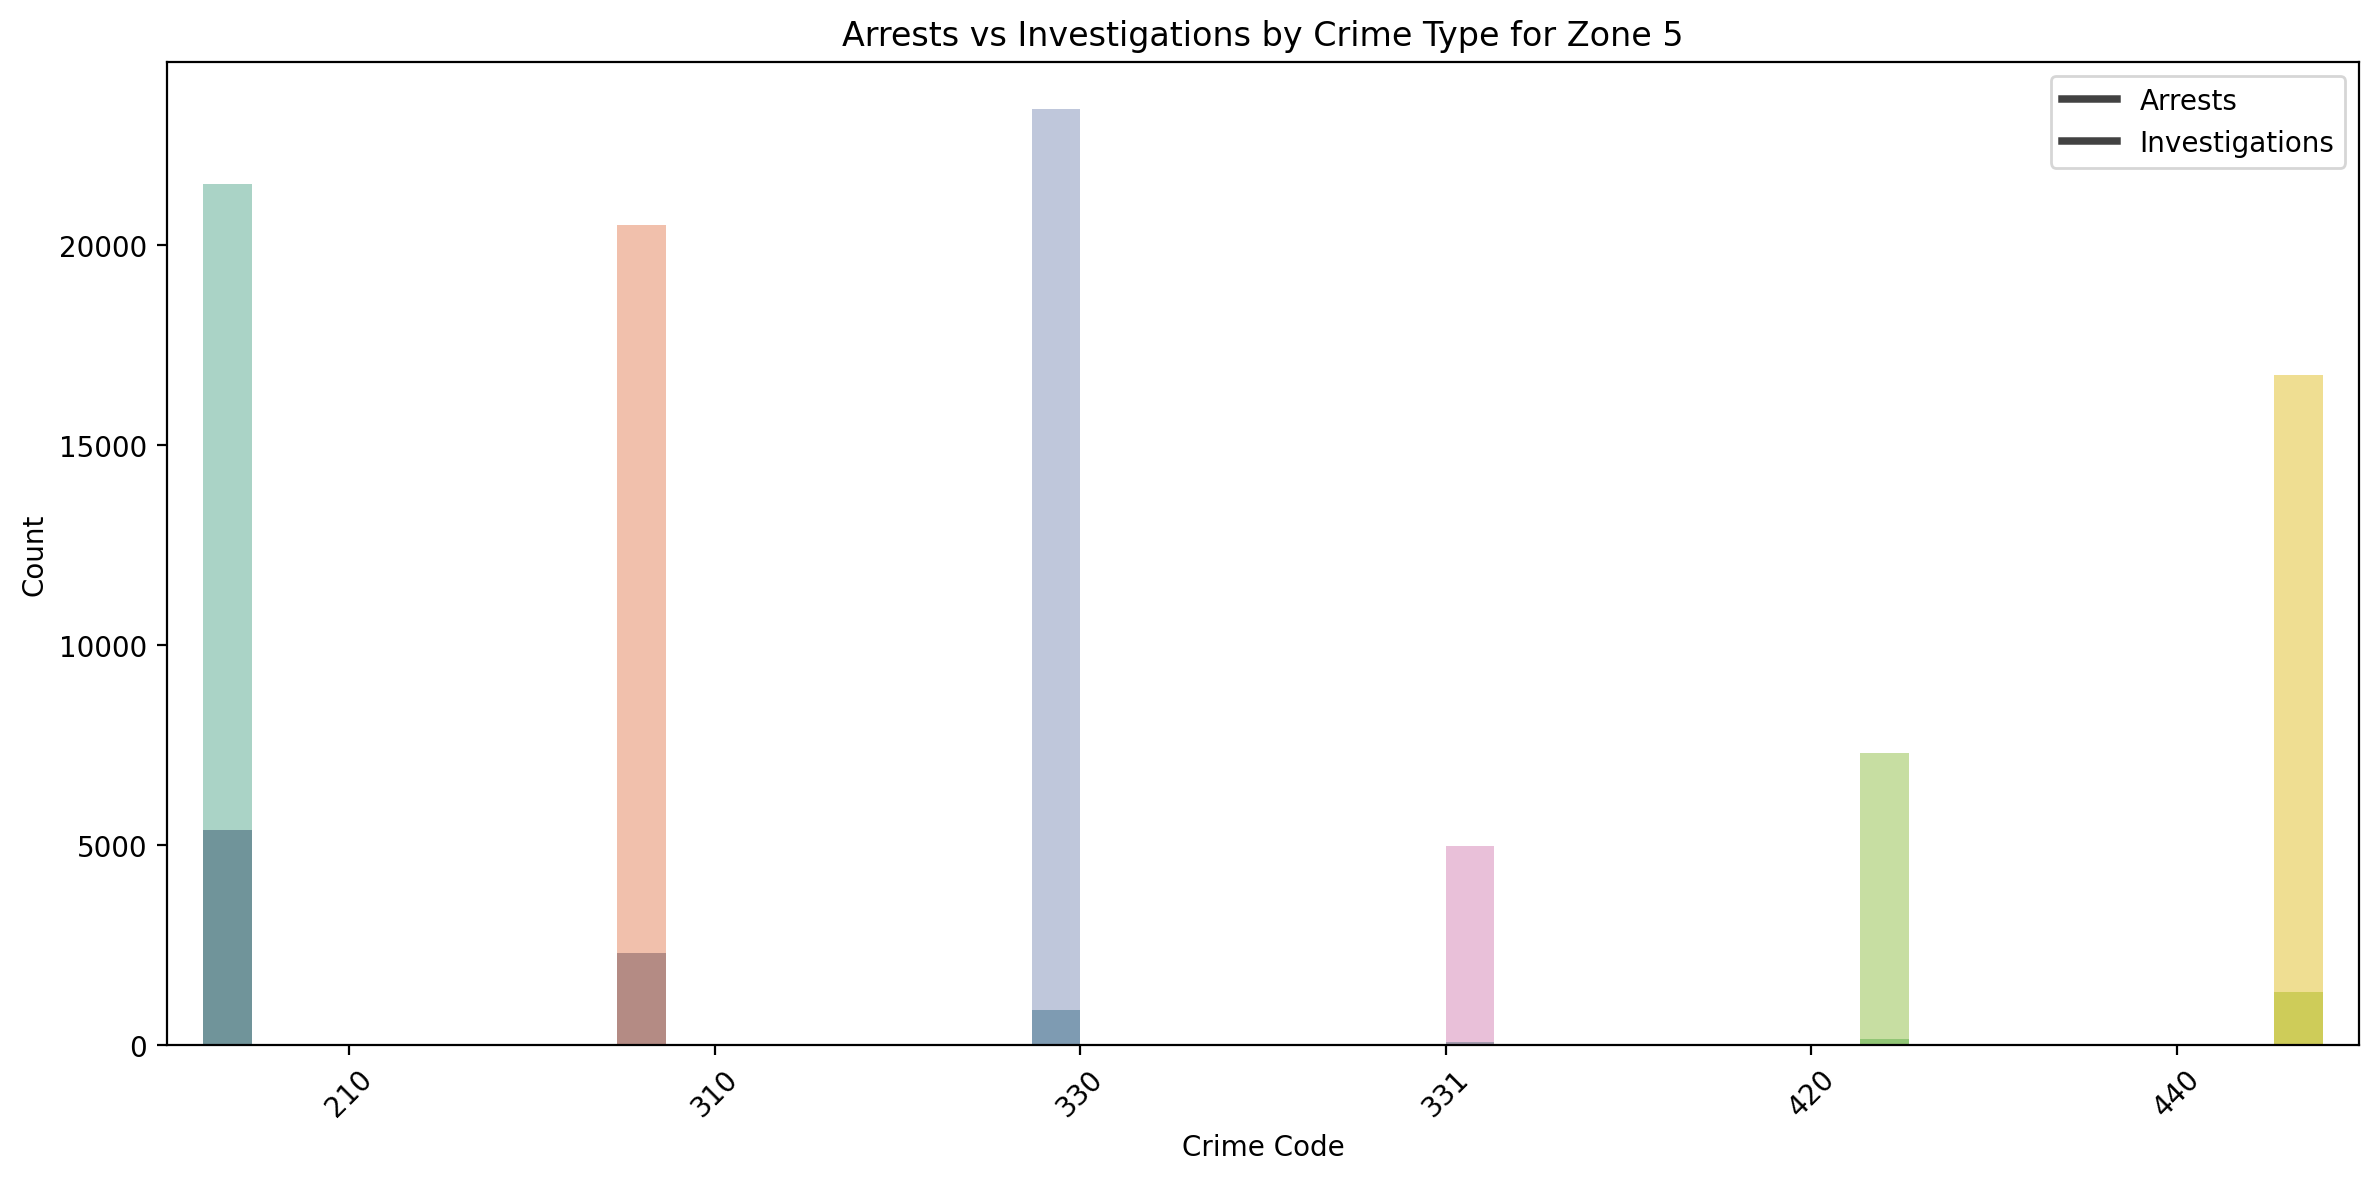

Zone 5 Arrest Rate by Crime Type:
 - Crime Code: 210, Crime Description: ROBBERY, Arrest Rate: 20.02%
 - Crime Code: 310, Crime Description: BURGLARY, Arrest Rate: 10.14%
 - Crime Code: 330, Crime Description: BURGLARY FROM VEHICLE, Arrest Rate: 3.58%
 - Crime Code: 331, Crime Description: THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER), Arrest Rate: 1.72%
 - Crime Code: 420, Crime Description: THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER), Arrest Rate: 2.25%
 - Crime Code: 440, Crime Description: THEFT PLAIN - PETTY ($950 & UNDER), Arrest Rate: 7.41%



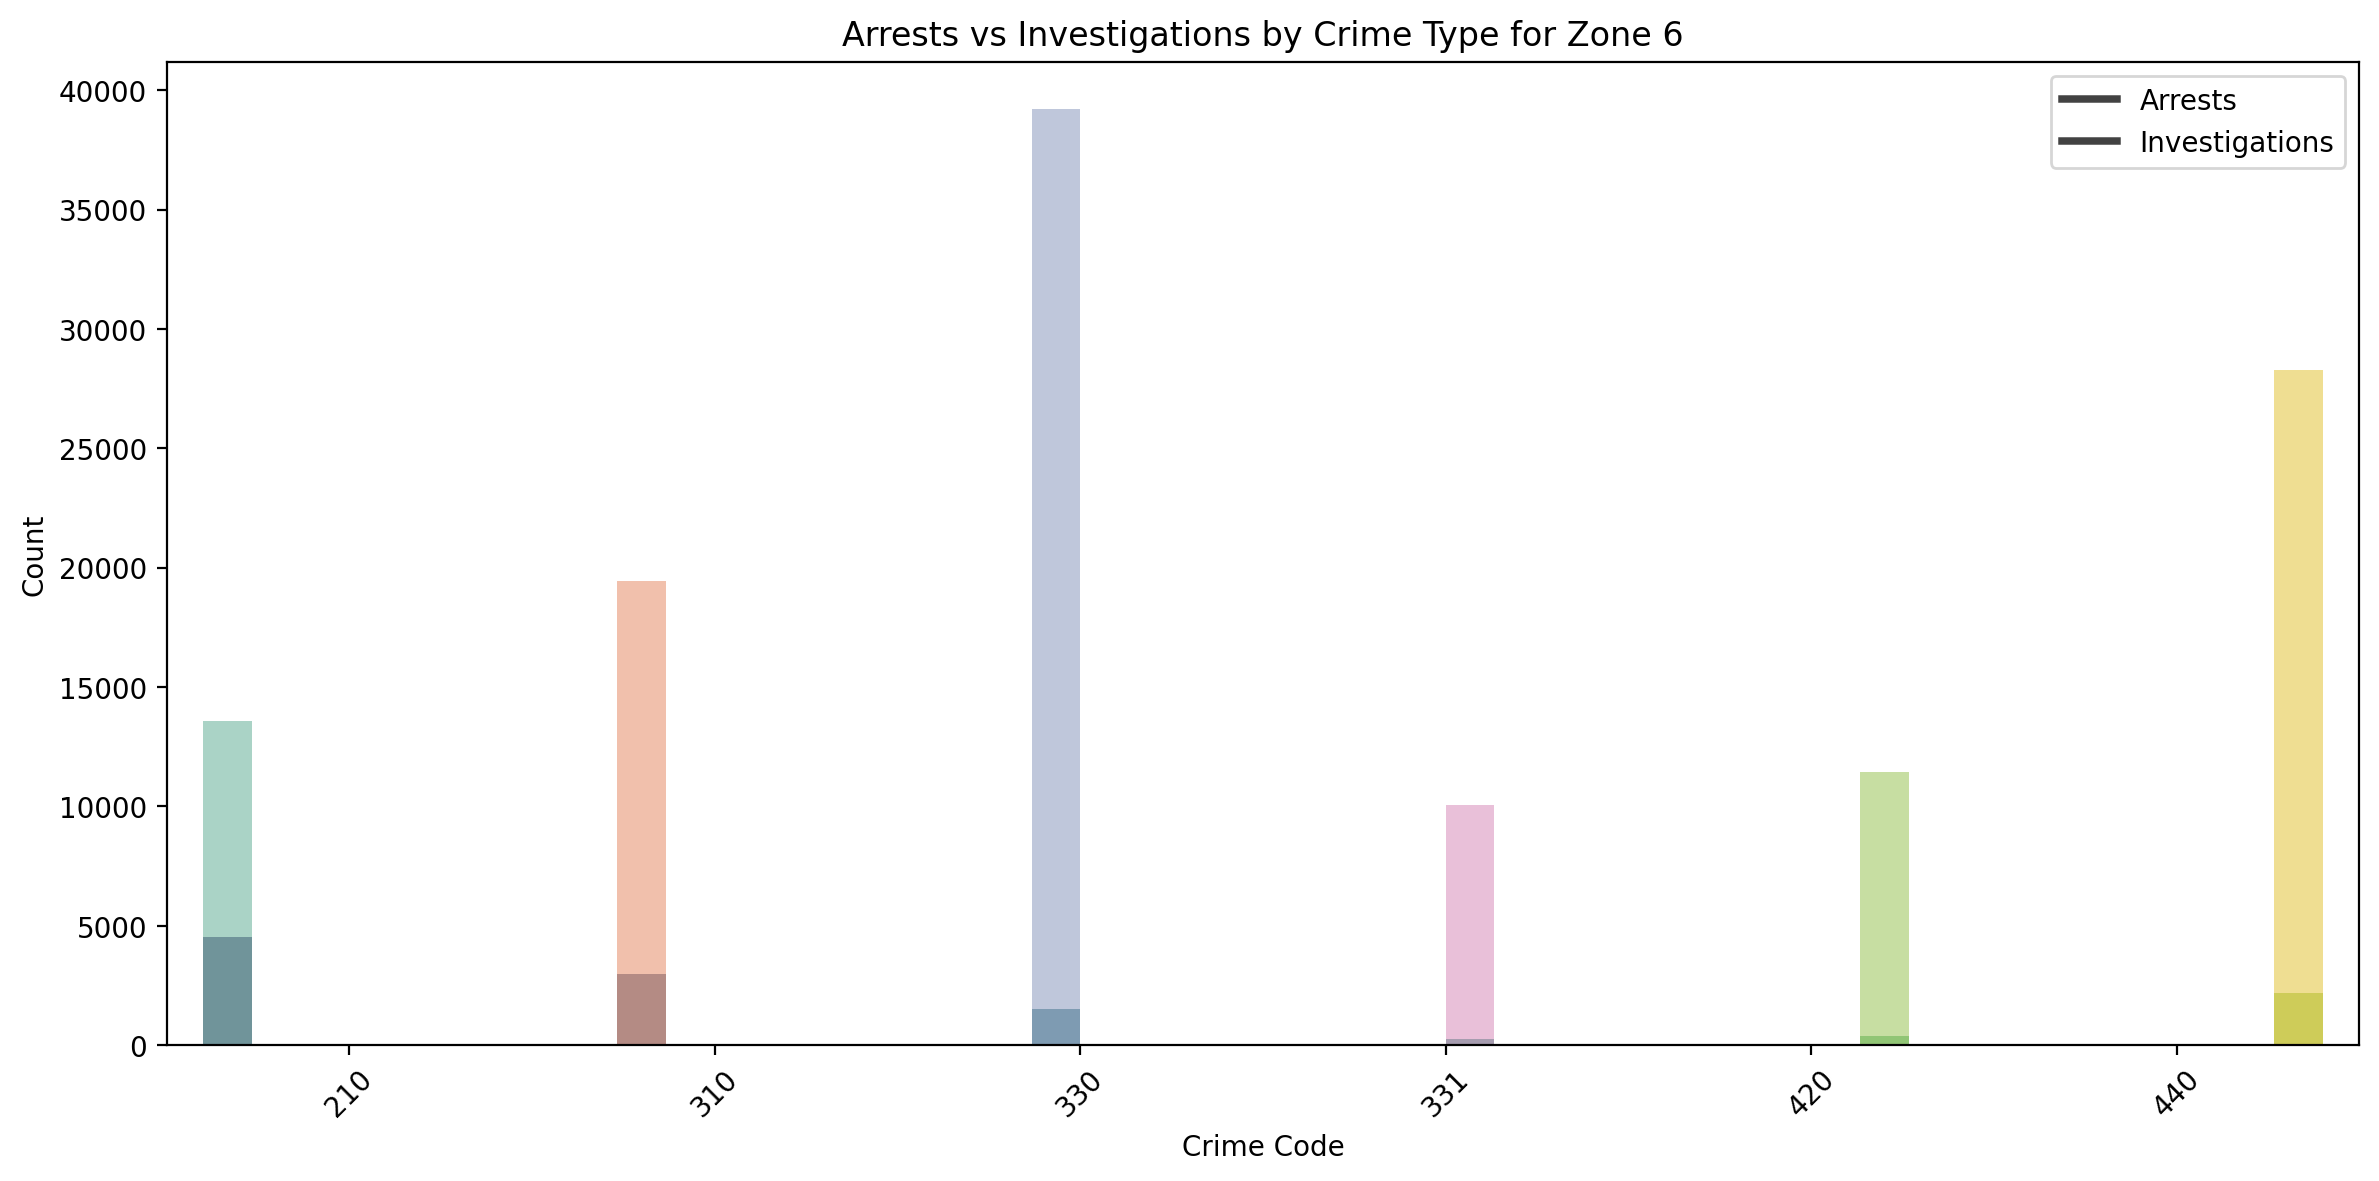

Zone 6 Arrest Rate by Crime Type:
 - Crime Code: 210, Crime Description: ROBBERY, Arrest Rate: 25.06%
 - Crime Code: 310, Crime Description: BURGLARY, Arrest Rate: 13.35%
 - Crime Code: 330, Crime Description: BURGLARY FROM VEHICLE, Arrest Rate: 3.76%
 - Crime Code: 331, Crime Description: THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER), Arrest Rate: 2.48%
 - Crime Code: 420, Crime Description: THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER), Arrest Rate: 3.44%
 - Crime Code: 440, Crime Description: THEFT PLAIN - PETTY ($950 & UNDER), Arrest Rate: 7.16%



In [95]:
def zones_arrest_rate_by_code(crime):
    # Filter data for arrests and investigations
    arrest_data = crime[crime['Status'].isin(['AA', 'AO', 'JA', 'JO'])]
    arrest_counts = arrest_data.groupby(['Zone', 'Crime Code', 'Crime Description']).size().reset_index(name='Arrests')
    
    investigation_data = crime[crime['Status'] == 'IC']
    investigation_counts = investigation_data.groupby(['Zone', 'Crime Code', 'Crime Description']).size().reset_index(name='Investigations')

    # Merge data to get counts for each zone and crime
    merged_data = pd.merge(arrest_counts, investigation_counts, on=['Zone', 'Crime Code', 'Crime Description'], how='outer').fillna(0)

    # Calculate arrest rate
    merged_data['Arrest Rate'] = merged_data['Arrests'] / (merged_data['Arrests'] + merged_data['Investigations'])

    # Print arrest rates by zone and crime
    zones = merged_data['Zone'].unique()
    n_zones = len(zones)
    
    for i, zone in enumerate(zones):
        zone_data = merged_data[merged_data['Zone'] == zone]
        
        # Plot bar chart for counts by crime code and zone
        fig, ax = plt.subplots(figsize=(12, 6))
        
        sns.barplot(data=zone_data, x='Crime Code', y='Arrests', hue='Crime Description', palette='viridis', alpha=0.8, ax=ax)
        sns.barplot(data=zone_data, x='Crime Code', y='Investigations', hue='Crime Description', palette='Set2', alpha=0.6, estimator=sum, errcolor=None, ax=ax)
        
        ax.set_title(f'Arrests vs Investigations by Crime Type for Zone {zone}')
        ax.set_xlabel('Crime Code')
        ax.set_ylabel('Count')
        ax.legend(['Arrests', 'Investigations'], loc='upper right')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels
        
        plt.tight_layout()
        plt.show()

        # Calculate and print arrest rates by crime type
        print(f"Zone {zone} Arrest Rate by Crime Type:")
        for idx, row in zone_data.iterrows():
            crime_code = row['Crime Code']
            crime_desc = row['Crime Description']
            arrests = row['Arrests']
            investigations = row['Investigations']
            arrest_rate_crime = arrests / (arrests + investigations) if (arrests + investigations) > 0 else 0
            print(f" - Crime Code: {crime_code}, Crime Description: {crime_desc}, Arrest Rate: {arrest_rate_crime:.2%}")

        print()

# Example usage with crime DataFrame
zones_arrest_rate_by_code(crime)